# PVT Bubblepoint Pressure Prediction

#### (Supervised Regression - Statistical Methods)
#### Date: April, 2022
#### Authors: Anuola Osinaike

## Contents

__1. Data Loading__
> 1.1 Data Inspection

__2. Data Exploration__
> 2.1 Data Vizualization<br>
> 2.2 Data Distribution

__3. Data Preprocessing__
> 3.1 Split Data

__4. Feature Engineering__
> 4.1 Non-linear Transformation
>> 4.1.1 Best-matching Distribution<br>
>> 4.1.2 Gaussian Mapping
>>> 4.1.2.1 Power Transform<br>
>>> 4.1.2.2 Quantile Transform<br>
>>> 4.1.2.3 Standard Scaling<br>
>>> 4.1.2.4 Robust Scaling<br>
>>> 4.1.2.5 Gaussian Mapping Inspection

> 4.2 Covariance Estimation<br>
> 4.3 Statistical Features
>> 4.3.1 Rolling Statistics<br>
>> 4.3.2 Expanding Statistics

> 4.4 Principal Component Analysis

__5. Dimensionality Reduction__
> 5.1 Feature Selection

__6. Supervised Regression__
> 6.1 Model Selection and Evaluation
>> 6.1.1 Cross-Validation and Hyper-Parameterization
>>> 6.1.1.1 Model Training<br>
>>> 6.1.1.2 Model Prediction

>> 6.1.2 Metrics and Scoring
>>> 6.1.2.1 Machine Learning Models<br>
>>> 6.1.2.2 Empirical Correlation Models

>> 6.1.3 Validation Curves
>>> 6.1.3.1 Learning Curve

>> 6.1.4 Voting Ensemble<br>
>> 6.1.5 Stacking Ensemble

> 6.2 Model Inspection and Visualization
>> 6.2.1 Inspection Plots<br>
>> 6.2.2 Feature Importance
>>> 6.2.2.1 Permutation Feature Importance (PFI)

#### Algorithms:
- Linear Regression
- Support Vector Machine
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- Extra Trees 
- Adaptive Boosting
- Gradient Boosting
- Histogram Gradient Boosting
- Extreme Gradient Boosting
- Ligth Gradient Boosting
- Multi-Layer Perceptron*

*Neural Network

## 1. Data Loading

```python
# install dependencies
pip install scikit-learn==1.0.1
pip install scikit-optimize==0.9.0
pip install xgboost==1.5.0
pip install lightgbm==3.3.1
pip install distfit==1.4.1
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor as HGBRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
# import the data to a dataframe
data = pd.read_excel('PVT_data.xlsx', header=0)
data.head()

Y   X1   X2     X3    X4
0  3285  377  154  0.930  0.65
1  3415  401  159  0.928  0.65
2  3515  407  161  0.925  0.59
3  3491  474  161  0.927  0.65
4  3516  540  163  0.926  0.65

In [4]:
# rename the columns
data.columns = ['Pb', 'Rs', 'T', 'rho_o', 'rho_g']
data.head()

Pb   Rs    T  rho_o  rho_g
0  3285  377  154  0.930   0.65
1  3415  401  159  0.928   0.65
2  3515  407  161  0.925   0.59
3  3491  474  161  0.927   0.65
4  3516  540  163  0.926   0.65

### 1.1 Data Inspection

In [5]:
# view descriptive statistics
data.describe()

Pb           Rs            T        rho_o       rho_g
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000
mean   3561.695000   819.964000   169.265000     0.870107     0.64874
std     938.663338   533.059194    26.245258     0.043330     0.03348
min     543.000000   113.000000   111.000000     0.750000     0.56000
25%    3088.250000   406.000000   150.000000     0.833750     0.65000
50%    3498.500000   648.500000   164.000000     0.860000     0.65000
75%    4079.250000  1159.000000   185.000000     0.910250     0.65000
max    8299.000000  4000.000000   264.000000     0.959000     0.85000

## 2. Data Exploration

### 2.1 Data Visualization

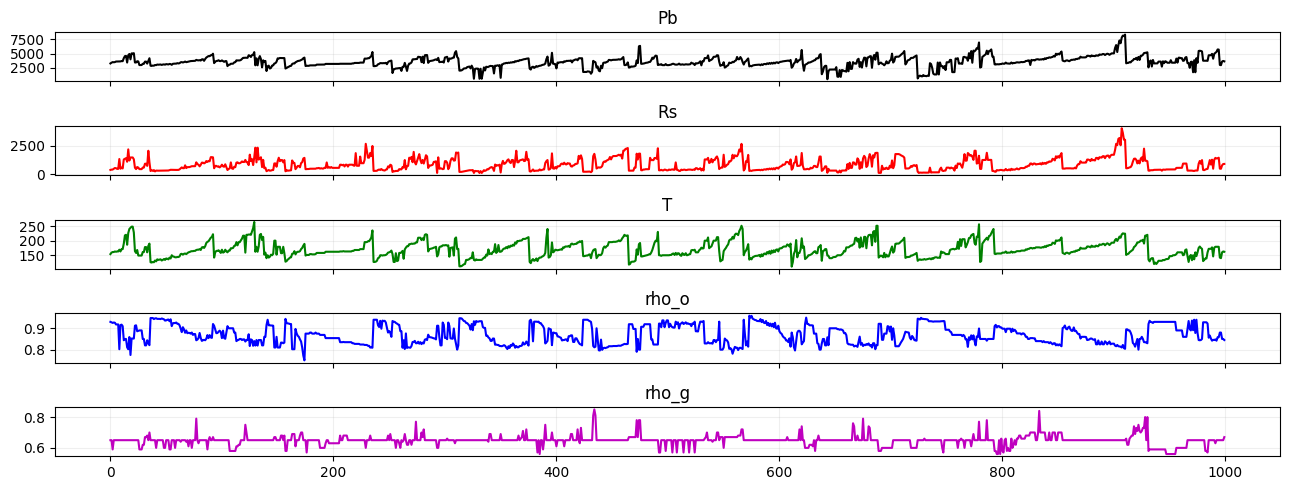

In [6]:
# plot the data
fig, axs = plt.subplots(figsize=(13, data.shape[1]), nrows=data.shape[1], sharex=True)

colors = ['k', 'r', 'g', 'b', 'm']
for i in range(data.shape[1]):
    axs[i].plot(data.iloc[:, i], color=colors[i])
    axs[i].set_title(data.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

### 2.2 Data Distribution

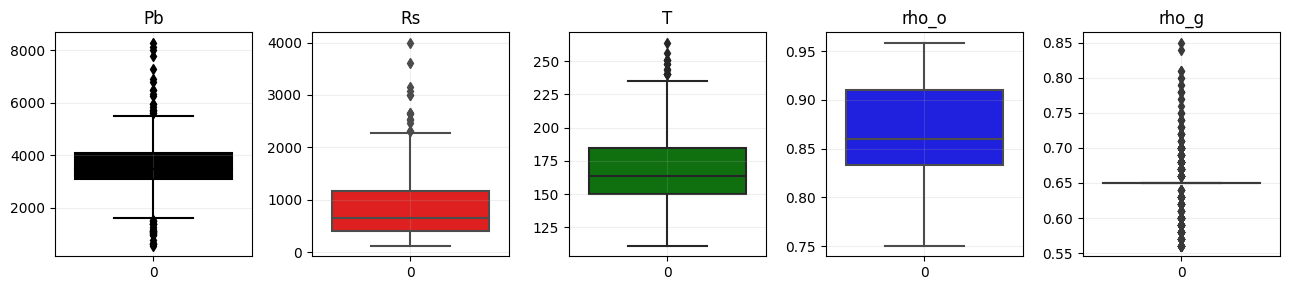

In [7]:
# plot the boxplot to inspect the data spread and centers
fig, axs = plt.subplots(figsize=(13, 3), ncols=data.shape[1])

colors = ['k', 'r', 'g', 'b', 'm']
for i in range(data.shape[1]):
    sns.boxplot(data=data.iloc[:, i], ax=axs[i], color=colors[i])
    axs[i].set_title(data.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

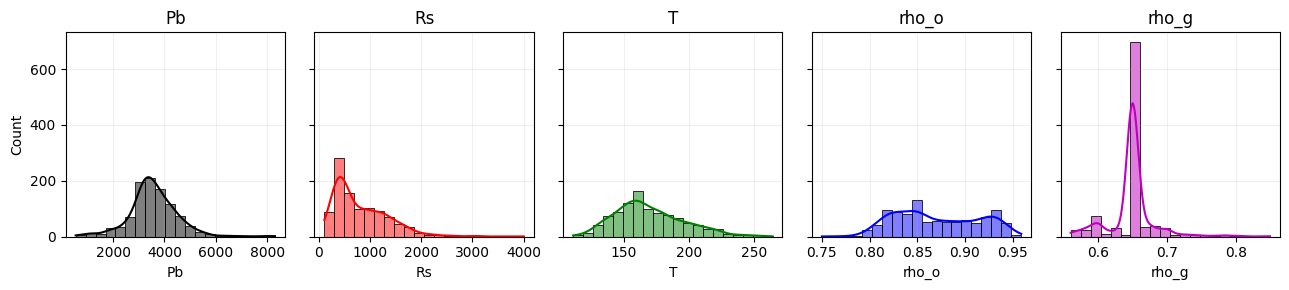

In [8]:
# plot the histplot to inspect the frequency distribution and trend
fig, axs = plt.subplots(figsize=(13, 3), ncols=data.shape[1], sharey=True)

colors = ['k', 'r', 'g', 'b', 'm']
for i in range(data.shape[1]):
    sns.histplot(data=data.iloc[:, i], bins=20, kde=True, ax=axs[i], color=colors[i])    
    axs[i].set_title(data.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

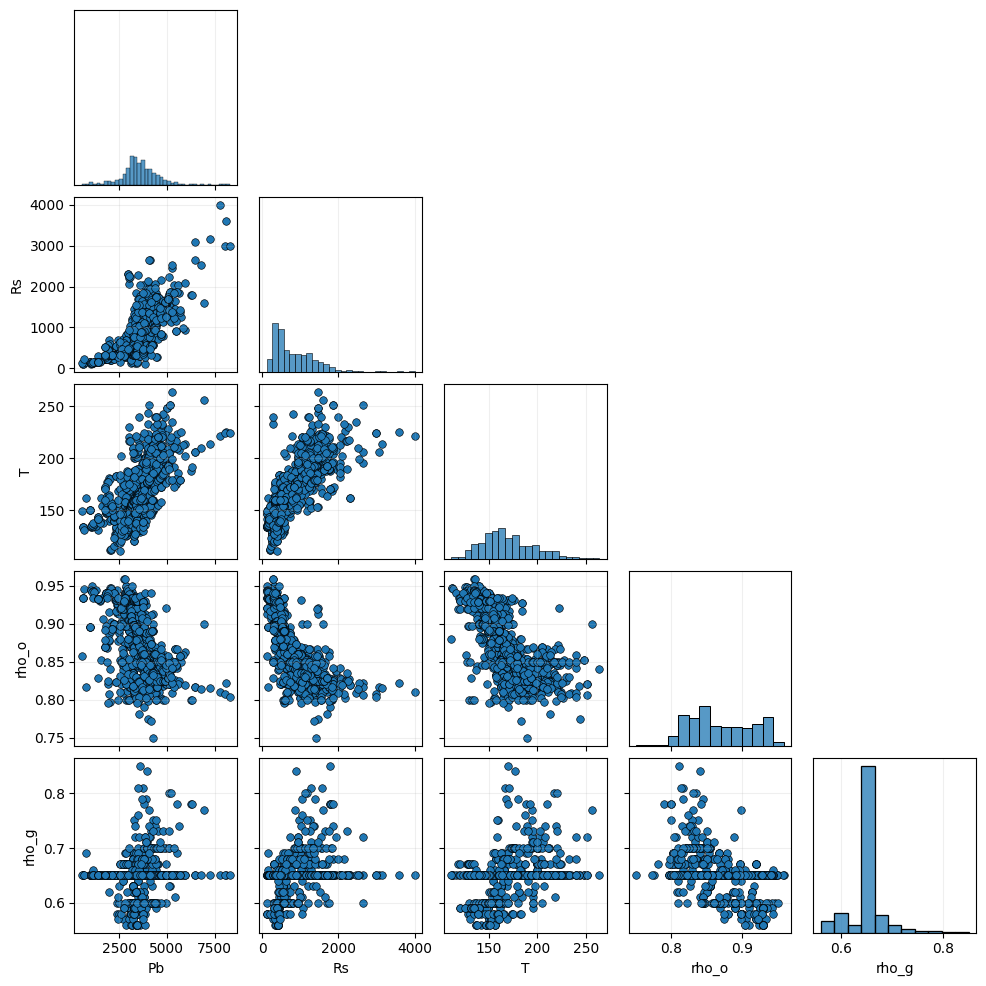

In [9]:
# plot the scatterplot to inspect the variables relationship and correlation
markers = ['o', 's', 'v', 'p', '^', 'P', '<', 'X', '>']

pg = sns.pairplot(data=data, plot_kws={'s': 30, 'edgecolor': 'k'}, 
                  corner=True, height=2, aspect=1)

for i, ax in enumerate(pg.fig.axes):
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.grid(alpha=0.2)
#pg.fig.text(0.5, 1, 'Scatterplots', ha='center', va='center', size=18)
pg.tight_layout()

## 3. Data Preprocessing

### 3.1 Split Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, -4:], data.iloc[:, [0]], 
                                                    test_size=0.25, random_state=1234, shuffle=True)

In [12]:
X_train.head()

Rs    T  rho_o  rho_g
652   160  150  0.896   0.65
352  1162  170  0.818   0.65
618   736  158  0.888   0.72
953   420  150  0.930   0.56
126  1147  220  0.848   0.65

In [13]:
X_test.head()

Rs    T  rho_o  rho_g
681  1752  220  0.819   0.73
990  1268  176  0.845   0.65
155  1034  179  0.830   0.65
768  1189  185  0.848   0.65
438   602  152  0.797   0.65

## 4. Feature Engineering

### 4.1 Non-linear Transformation

In [14]:
from distfit import distfit
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#### 4.1.1 Best-matching Distribution

In [15]:
# create a function for performing automated goodness-of-fit (GOF) test
def gof_test(data):
    # data: dataframe for the goodness-of-fit test
    
    dist = [distfit() for i in range(len(data.columns))]
    bm_dist = [i for i in range(len(data.columns))]

    start_time = time.time()

    for i, feat in enumerate(data.columns):
        bm_dist[i] = dist[i].fit_transform(data[feat].dropna())

    end_time = time.time()
    print(f'Training time: {end_time - start_time} seconds')
    
    return dist, bm_dist

In [16]:
# perform automated goodness-of-fit (GOF) test on the original data
dist, bm_dist = gof_test(data=data)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0000002] [loc=3561.695 scale=938.194]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000018] [loc=543.000 scale=3018.695]
[distfit] >[pareto    ] [0.00 sec] [RSS: 0.0000018] [loc=-1099511627233.000 scale=1099511627776.000]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 0.0000001] [loc=3529.561 scale=699.458]
[distfit] >[t         ] [0.34 sec] [RSS: 0.0000002] [loc=3451.730 scale=861.716]
[distfit] >[genextreme] [0.33 sec] [RSS: 0.0000026] [loc=543.305 scale=1.730]
[distfit] >[gamma     ] [0.12 sec] [RSS: 0.0000002] [loc=-9378.313 scale=67.789]
[distfit] >[lognorm   ] [0.23 sec] [RSS: 0.0000027] [loc=543.000 scale=2.515]
[distfit] >[beta      ] [0.18 sec] [RSS: 0.0000002] [loc=-9469.015 scale=57940.793]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0000016] [loc=543.000 scale=7756.000]
[distfit] >[loggamma  ] [0.11 sec] [RSS: 0.0000002] [loc=-302750.134 scale=40725.324]
[distfit] >Compute confidence interval [paramet

In [17]:
# check the best matching distribution
for i, feat in enumerate(data.columns):
    print(f'{feat}: ', bm_dist[i]['model']['distr'])

Pb:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>
Rs:  <scipy.stats._continuous_distns.lognorm_gen object at 0x000001B419DE8D60>
T:  <scipy.stats._continuous_distns.genextreme_gen object at 0x000001B419DB9840>
rho_o:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>
rho_g:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>



******* Pb Best Matching Distribution *******
[distfit] >plot..

******* Rs Best Matching Distribution *******
[distfit] >plot..

******* T Best Matching Distribution *******
[distfit] >plot..

******* rho_o Best Matching Distribution *******
[distfit] >plot..

******* rho_g Best Matching Distribution *******
[distfit] >plot..


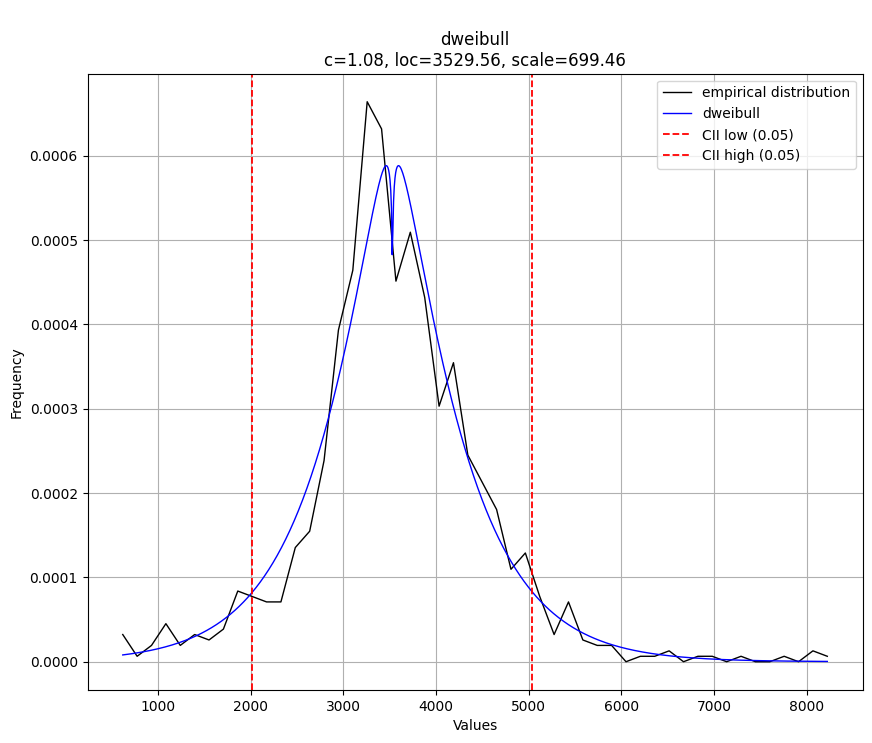

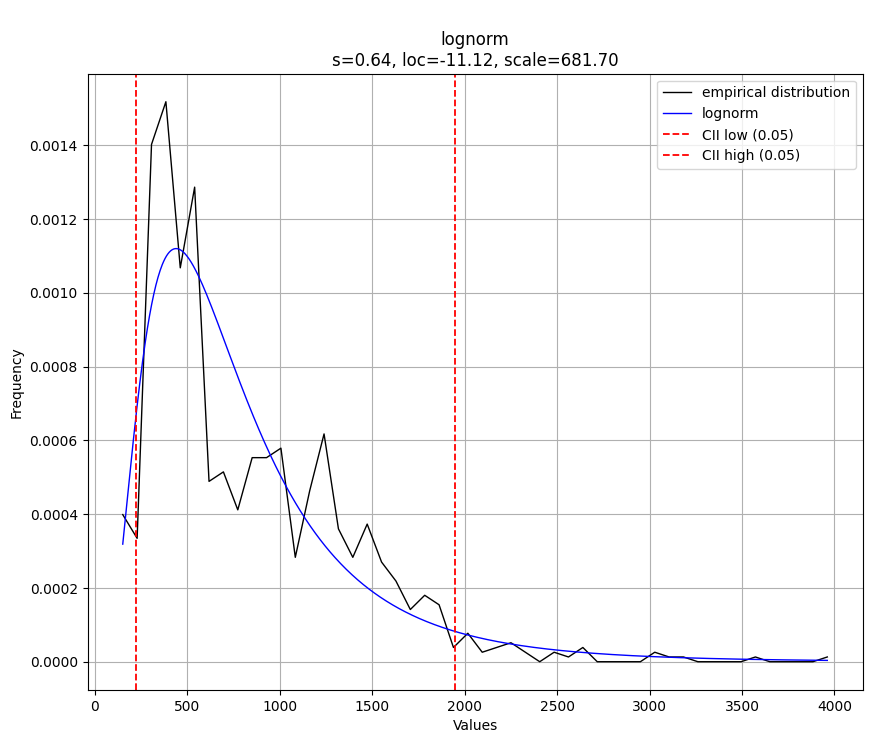

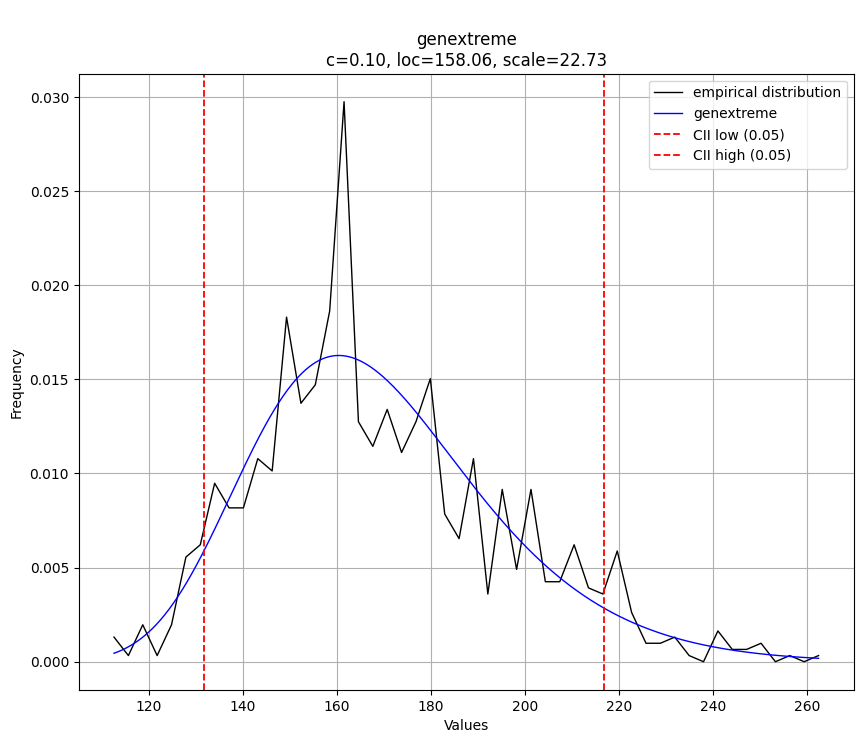

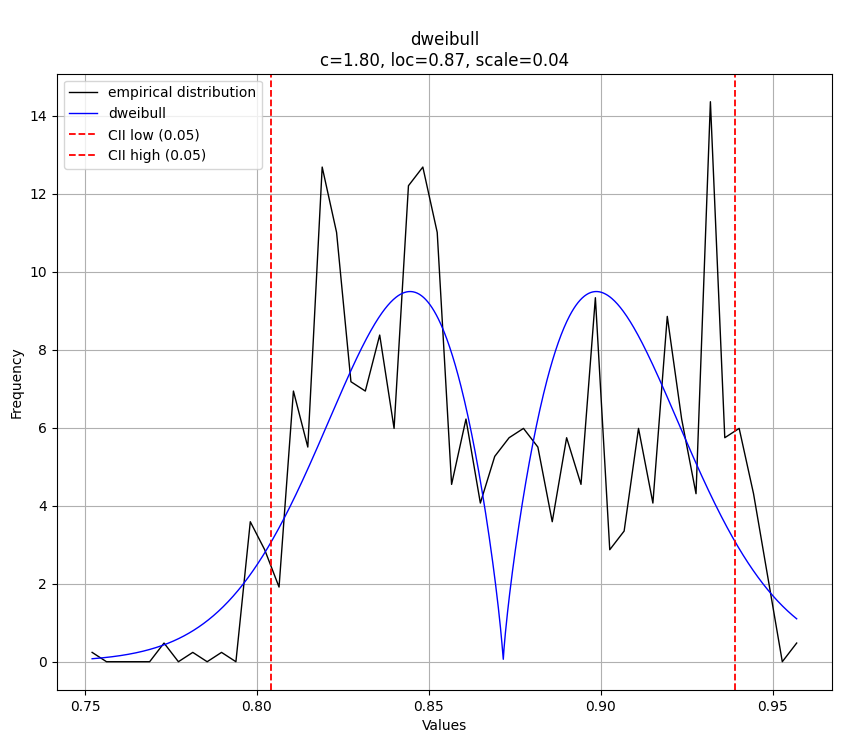

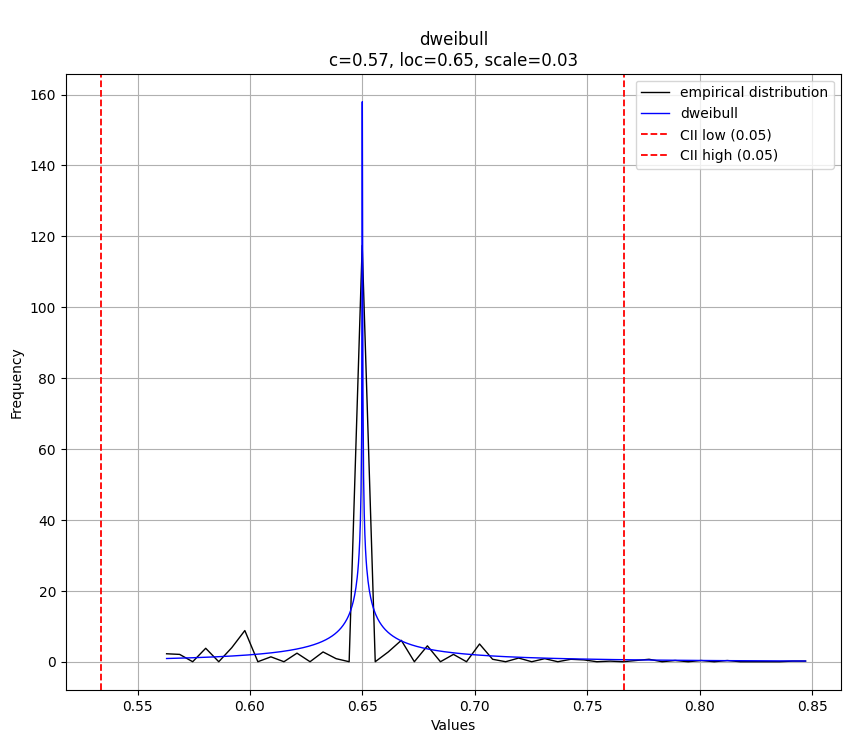

In [18]:
# plot the probability distribution fit
for i, feat in enumerate(data.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist[i].plot()

#### 4.1.2 Gaussian Mapping

In [19]:
# create a function for performing transformation of the test set to normal distribution
def transform(data, dist_fit):
    # data: dataframe to be transformed
    # dist_fit: model from the training set
    
    dist = dist_fit.transform(data)
    dist = pd.DataFrame(dist, index=data.index, columns=data.columns)
    
    return dist

##### 4.1.2.1 Power Transform

In [20]:
# perform power transform of the train set to normal distribution
power_dist_fit = PowerTransformer(method='yeo-johnson').fit(X_train)
power_dist_train = power_dist_fit.transform(X_train)
power_dist_train = pd.DataFrame(power_dist_train, index=X_train.index, columns=X_train.columns)

In [21]:
# perform power transform of the test set to normal distribution
power_dist_test = transform(data=X_test, dist_fit=power_dist_fit)

In [22]:
# merge the train and test sets
power_dist = pd.concat([power_dist_train, power_dist_test], axis=0)
power_dist = power_dist.sort_index()

In [23]:
# perform automated goodness-of-fit (GOF) test on the power transformed data
dist_p, bm_dist_p = gof_test(data=power_dist)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.4332199] [loc=0.034 scale=1.004]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.7299795] [loc=-2.485 scale=2.520]
[distfit] >[pareto    ] [0.00 sec] [RSS: 1.7299795] [loc=-268435458.485 scale=268435456.000]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.3089094] [loc=0.008 scale=0.946]
[distfit] >[t         ] [0.30 sec] [RSS: 0.4332370] [loc=0.034 scale=1.004]
[distfit] >[genextreme] [0.13 sec] [RSS: 0.3994724] [loc=-0.327 scale=0.994]
[distfit] >[gamma     ] [0.14 sec] [RSS: 0.4321344] [loc=-126.734 scale=0.008]
[distfit] >[lognorm   ] [0.22 sec] [RSS: 0.4298238] [loc=-62.384 scale=62.412]
[distfit] >[beta      ] [0.06 sec] [RSS: 0.3857922] [loc=-3.387 scale=6.914]
[distfit] >[uniform   ] [0.00 sec] [RSS: 1.1692462] [loc=-2.485 scale=5.502]
[distfit] >[loggamma  ] [0.13 sec] [RSS: 0.4347207] [loc=-155.307 scale=24.372]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[

In [24]:
# check the best matching distribution
for i, feat in enumerate(power_dist.columns):
    print(f'{feat}: ', bm_dist_p[i]['model']['distr'])

Rs:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>
T:  <scipy.stats._continuous_distns.genextreme_gen object at 0x000001B419DB9840>
rho_o:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>
rho_g:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>



******* Rs Best Matching Distribution *******
[distfit] >plot..

******* T Best Matching Distribution *******
[distfit] >plot..

******* rho_o Best Matching Distribution *******
[distfit] >plot..

******* rho_g Best Matching Distribution *******
[distfit] >plot..


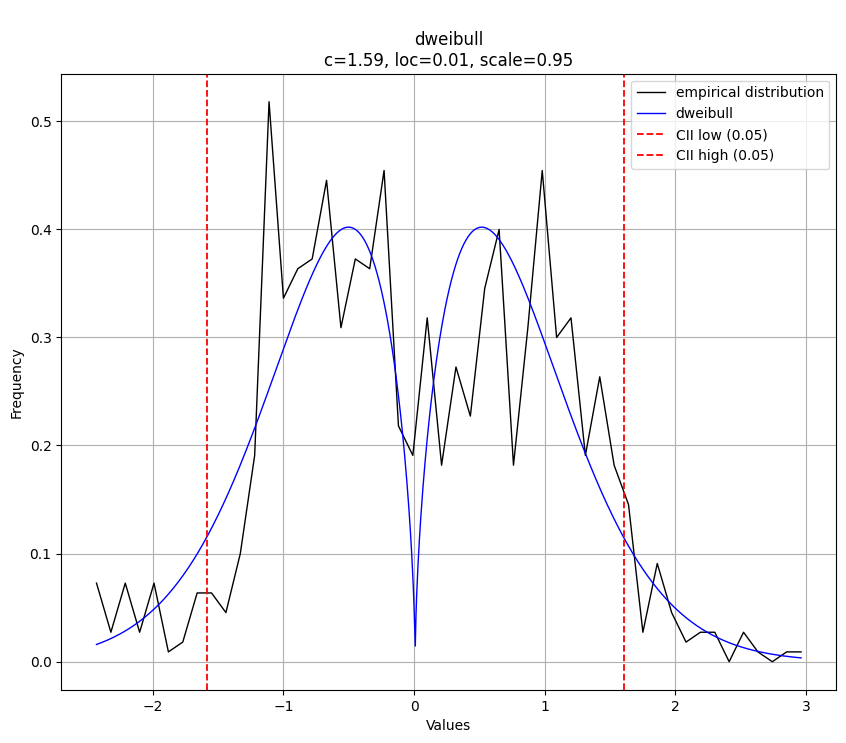

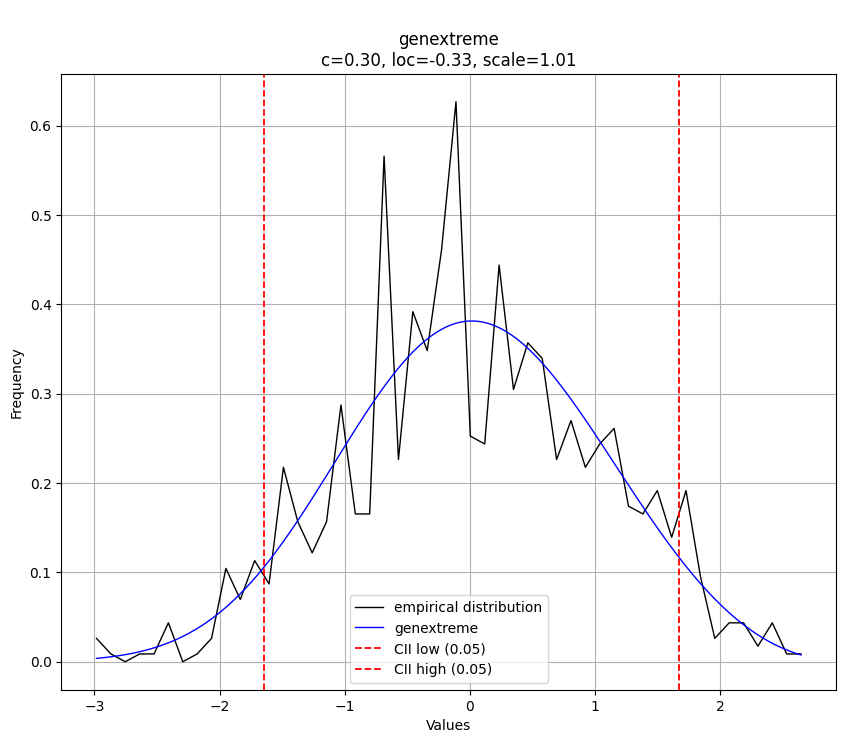

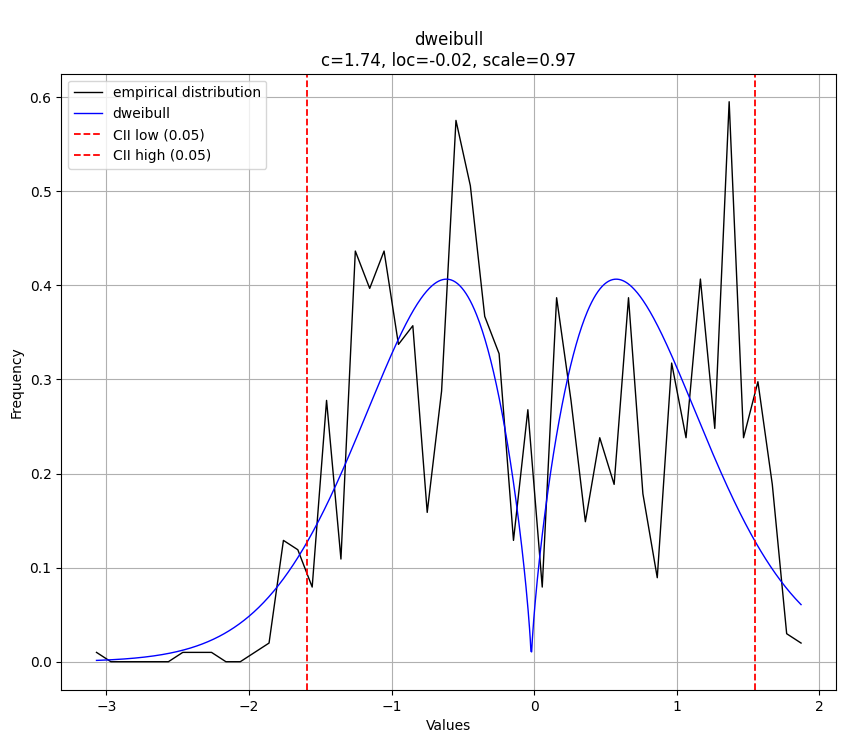

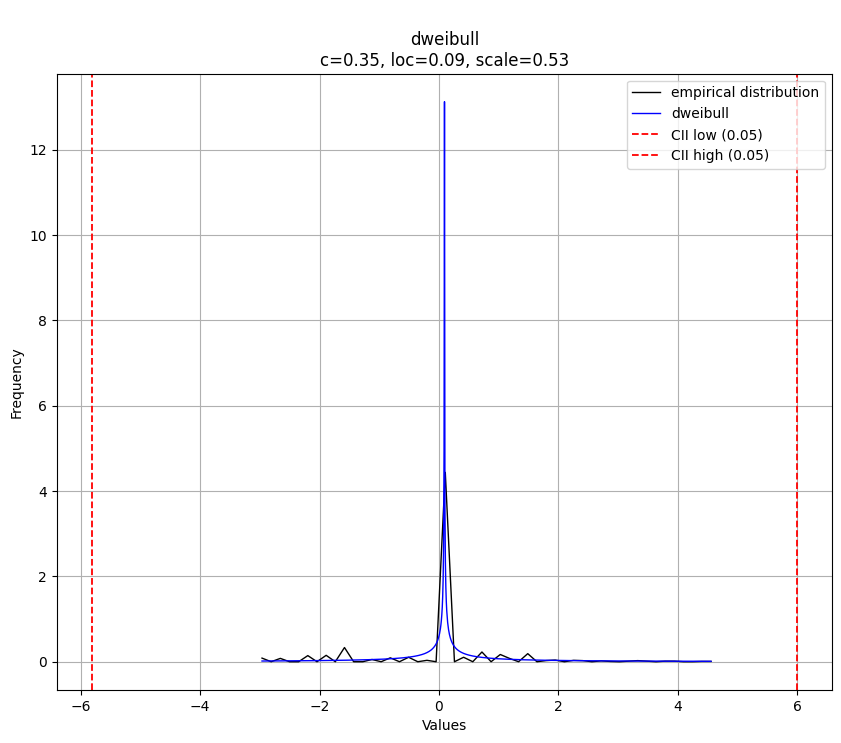

In [25]:
# plot the probability distribution fit
for i, feat in enumerate(power_dist.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist_p[i].plot()

##### 4.1.2.2 Quantile Transform

In [26]:
# perform quantile transform of the train set to normal distribution
quantile_dist_fit = QuantileTransformer(n_quantiles=len(X_train), 
                                        output_distribution='normal', 
                                        subsample=len(X_train), 
                                        random_state=1234).fit(X_train)
quantile_dist_train = quantile_dist_fit.transform(X_train)
quantile_dist_train = pd.DataFrame(quantile_dist_train, index=X_train.index, columns=X_train.columns)

In [27]:
# perform quantile transform of the test set to normal distribution
quantile_dist_test = transform(data=X_test, dist_fit=quantile_dist_fit)

In [28]:
# merge the train and test sets
quantile_dist = pd.concat([quantile_dist_train, quantile_dist_test], axis=0)
quantile_dist = quantile_dist.sort_index()

In [29]:
# perform automated goodness-of-fit (GOF) test on the quantile transformed data
dist_q, bm_dist_q = gof_test(data=quantile_dist)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0085421] [loc=0.030 scale=1.063]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.1046181] [loc=-5.199 scale=5.229]
[distfit] >[pareto    ] [0.00 sec] [RSS: 1.1046181] [loc=-1073741829.199 scale=1073741824.000]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0186443] [loc=0.024 scale=0.876]
[distfit] >[t         ] [0.13 sec] [RSS: 0.0110620] [loc=0.031 scale=0.931]
[distfit] >[genextreme] [0.15 sec] [RSS: 0.0397999] [loc=-0.396 scale=1.138]
[distfit] >[gamma     ] [0.11 sec] [RSS: 0.0092469] [loc=-25.355 scale=0.045]
[distfit] >[lognorm   ] [0.23 sec] [RSS: 0.0081765] [loc=-186.844 scale=186.872]
[distfit] >[beta      ] [0.18 sec] [RSS: 0.0092882] [loc=-863.893 scale=897.323]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.8819277] [loc=-5.199 scale=10.399]
[distfit] >[loggamma  ] [0.09 sec] [RSS: 0.0092994] [loc=-81.954 scale=15.348]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transfo

In [30]:
# check the best matching distribution
for i, feat in enumerate(quantile_dist.columns):
    print(f'{feat}: ', bm_dist_q[i]['model']['distr'])

Rs:  <scipy.stats._continuous_distns.lognorm_gen object at 0x000001B419DE8D60>
T:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>
rho_o:  <scipy.stats._continuous_distns.beta_gen object at 0x000001B419CDB550>
rho_g:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>



******* Rs Best Matching Distribution *******
[distfit] >plot..

******* T Best Matching Distribution *******
[distfit] >plot..

******* rho_o Best Matching Distribution *******
[distfit] >plot..

******* rho_g Best Matching Distribution *******
[distfit] >plot..


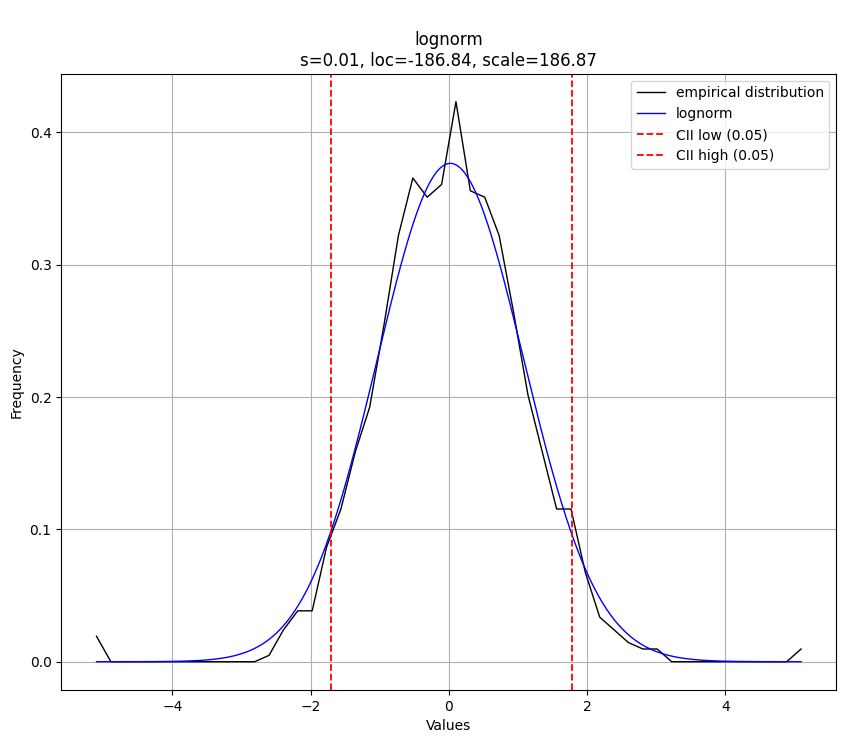

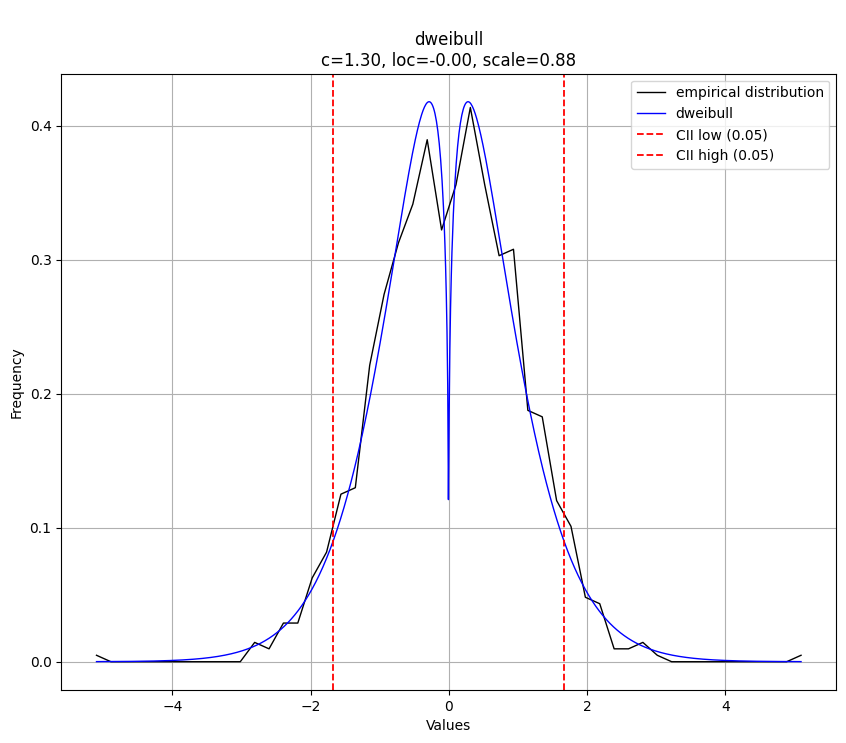

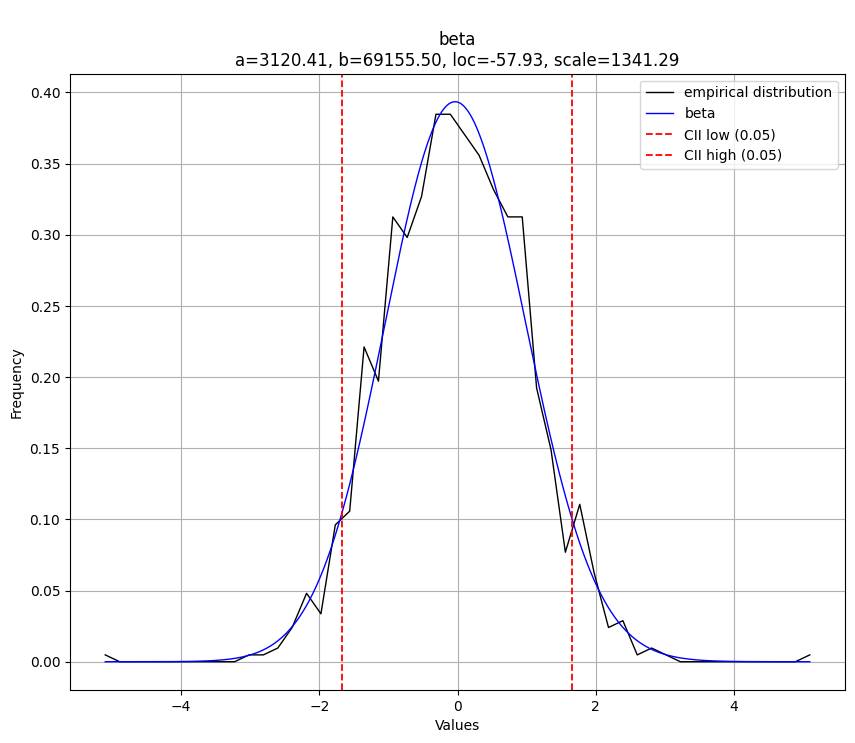

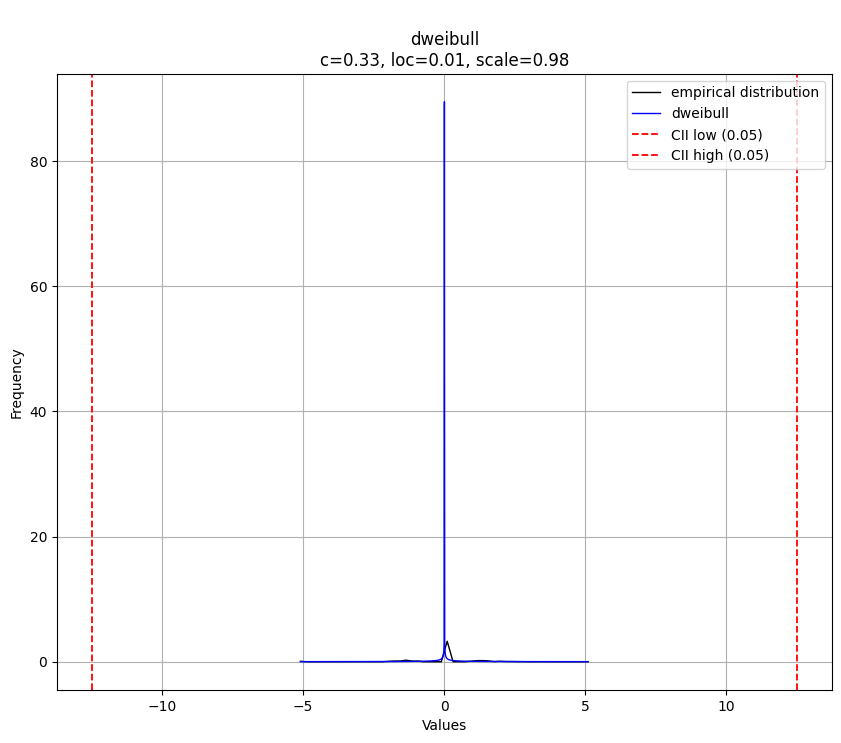

In [31]:
# plot the probability distribution fit
for i, feat in enumerate(quantile_dist.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist_q[i].plot()

##### 4.1.2.3 Standard Scaling

In [32]:
# perform standard scaling of the train set to normal distribution
standard_dist_fit = StandardScaler().fit(X_train)
standard_dist_train = standard_dist_fit.transform(X_train)
standard_dist_train = pd.DataFrame(standard_dist_train, index=X_train.index, columns=X_train.columns)

In [33]:
# perform standard scaling of the test set to normal distribution
standard_dist_test = transform(data=X_test, dist_fit=standard_dist_fit)

In [34]:
# merge the train and test sets
standard_dist = pd.concat([standard_dist_train, standard_dist_test], axis=0)
standard_dist = standard_dist.sort_index()

In [35]:
# perform automated goodness-of-fit (GOF) test on the standard scaled data
dist_s, bm_dist_s = gof_test(data=standard_dist)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.7871307] [loc=0.037 scale=1.034]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.7131842] [loc=-1.335 scale=1.372]
[distfit] >[pareto    ] [0.00 sec] [RSS: 0.7131842] [loc=-134217729.335 scale=134217728.000]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.6779855] [loc=0.011 scale=0.911]
[distfit] >[t         ] [0.11 sec] [RSS: 0.7744756] [loc=-0.075 scale=0.877]
[distfit] >[genextreme] [0.19 sec] [RSS: 0.3713227] [loc=-0.507 scale=0.637]
[distfit] >[gamma     ] [0.02 sec] [RSS: 0.3594120] [loc=-1.362 scale=0.774]
[distfit] >[lognorm   ] [0.09 sec] [RSS: 0.3367122] [loc=-1.575 scale=1.323]
[distfit] >[beta      ] [0.11 sec] [RSS: 0.3594106] [loc=-1.362 scale=10878524.005]
[distfit] >[uniform   ] [0.00 sec] [RSS: 1.8290369] [loc=-1.335 scale=7.541]
[distfit] >[loggamma  ] [0.14 sec] [RSS: 0.7862482] [loc=-371.825 scale=48.689]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform

In [36]:
# check the best matching distribution
for i, feat in enumerate(standard_dist.columns):
    print(f'{feat}: ', bm_dist_s[i]['model']['distr'])

Rs:  <scipy.stats._continuous_distns.lognorm_gen object at 0x000001B419DE8D60>
T:  <scipy.stats._continuous_distns.genextreme_gen object at 0x000001B419DB9840>
rho_o:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>
rho_g:  <scipy.stats._continuous_distns.norm_gen object at 0x000001B419CDB580>



******* Rs Best Matching Distribution *******
[distfit] >plot..

******* T Best Matching Distribution *******
[distfit] >plot..

******* rho_o Best Matching Distribution *******
[distfit] >plot..

******* rho_g Best Matching Distribution *******
[distfit] >plot..


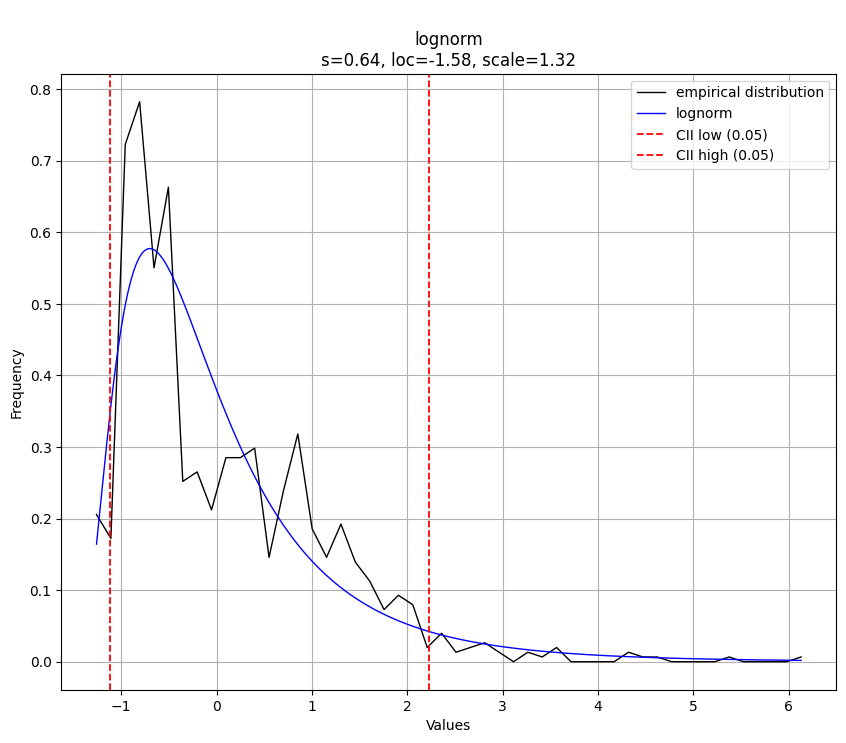

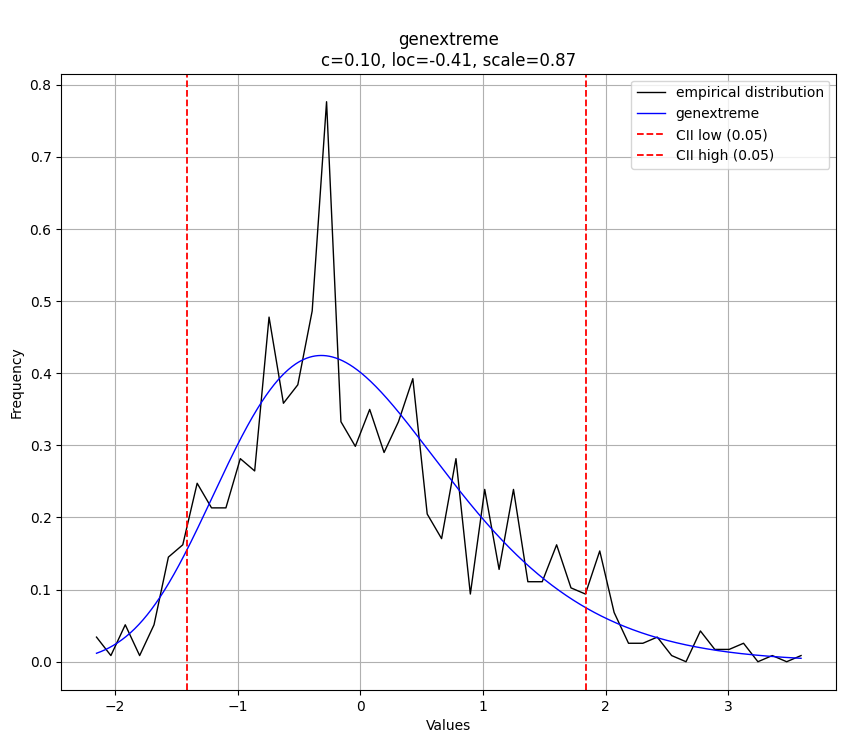

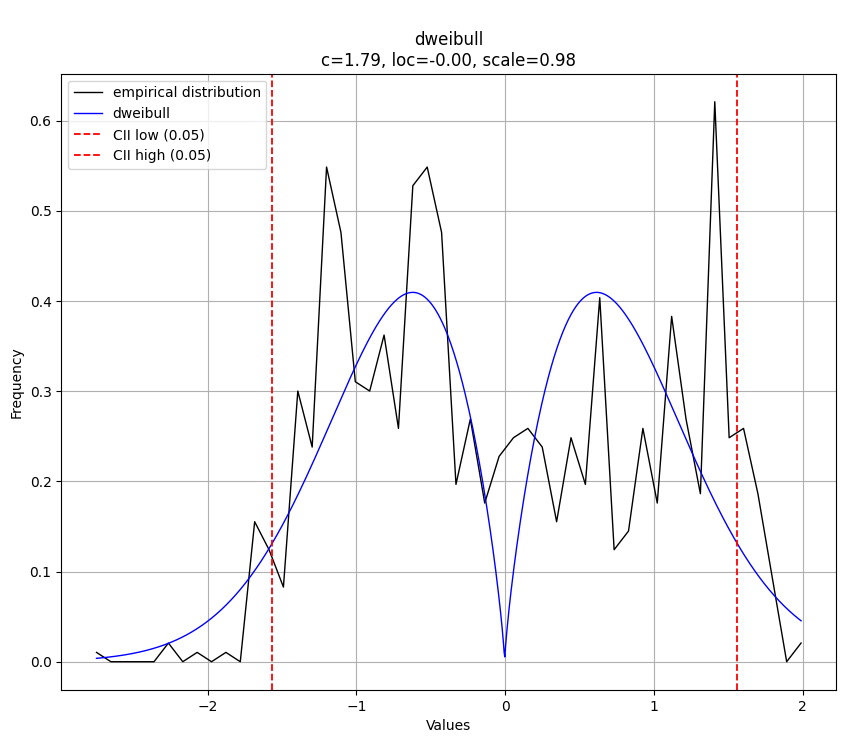

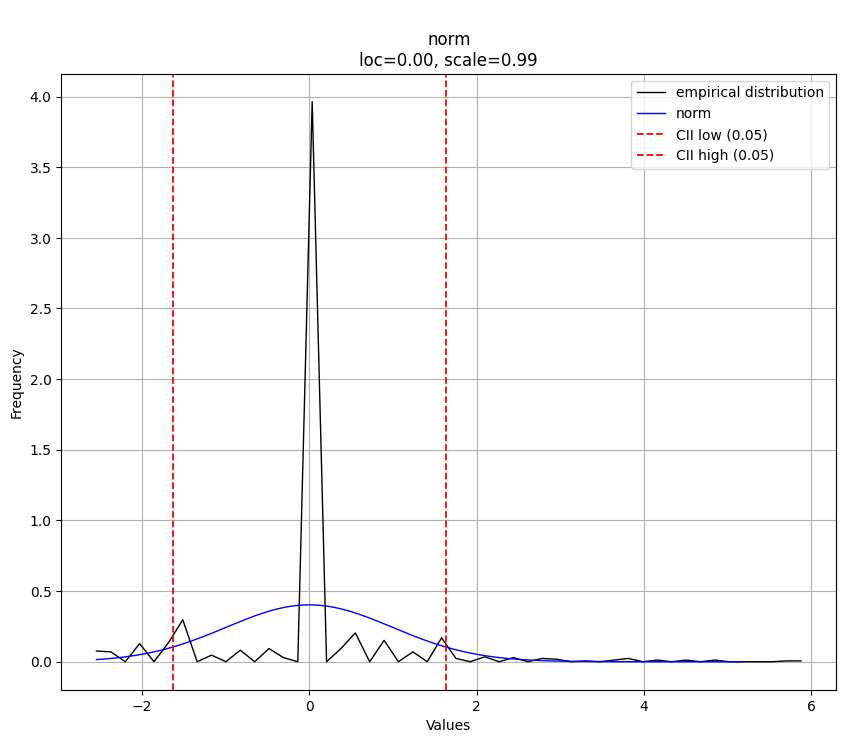

In [37]:
# plot the probability distribution fit
for i, feat in enumerate(standard_dist.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist_s[i].plot()

##### 4.1.2.4 Robust Scaling

In [38]:
# perform robust scaling of the train set to normal distribution
robust_dist_fit = RobustScaler(unit_variance=True).fit(X_train)
robust_dist_train = robust_dist_fit.transform(X_train)
robust_dist_train = pd.DataFrame(robust_dist_train, index=X_train.index, columns=X_train.columns)

In [39]:
# perform standard scaling of the test set to normal distribution
robust_dist_test = transform(data=X_test, dist_fit=robust_dist_fit)

In [40]:
# merge the train and test sets
robust_dist = pd.concat([robust_dist_train, robust_dist_test], axis=0)
robust_dist = robust_dist.sort_index()

In [41]:
# perform automated goodness-of-fit (GOF) test on the standard scaled data
dist_r, bm_dist_r = gof_test(data=robust_dist)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.8813352] [loc=0.359 scale=0.977]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.7985387] [loc=-0.937 scale=1.296]
[distfit] >[pareto    ] [0.00 sec] [RSS: 0.7985387] [loc=-134217728.937 scale=134217728.000]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.6982289] [loc=0.242 scale=0.841]
[distfit] >[t         ] [0.14 sec] [RSS: 0.8671632] [loc=0.254 scale=0.829]
[distfit] >[genextreme] [0.09 sec] [RSS: 0.4158179] [loc=-0.154 scale=0.602]
[distfit] >[gamma     ] [0.02 sec] [RSS: 0.4024269] [loc=-0.962 scale=0.732]
[distfit] >[lognorm   ] [0.04 sec] [RSS: 0.3769875] [loc=-1.164 scale=1.250]
[distfit] >[beta      ] [0.10 sec] [RSS: 0.4024252] [loc=-0.962 scale=10232080.885]
[distfit] >[uniform   ] [0.0 sec] [RSS: 2.0479377] [loc=-0.937 scale=7.127]
[distfit] >[loggamma  ] [0.12 sec] [RSS: 0.8848736] [loc=-283.713 scale=38.846]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..

In [42]:
# check the best matching distribution
for i, feat in enumerate(robust_dist.columns):
    print(f'{feat}: ', bm_dist_r[i]['model']['distr'])

Rs:  <scipy.stats._continuous_distns.lognorm_gen object at 0x000001B419DE8D60>
T:  <scipy.stats._continuous_distns.genextreme_gen object at 0x000001B419DB9840>
rho_o:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>
rho_g:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000001B419D933A0>



******* Rs Best Matching Distribution *******
[distfit] >plot..

******* T Best Matching Distribution *******
[distfit] >plot..

******* rho_o Best Matching Distribution *******
[distfit] >plot..

******* rho_g Best Matching Distribution *******
[distfit] >plot..


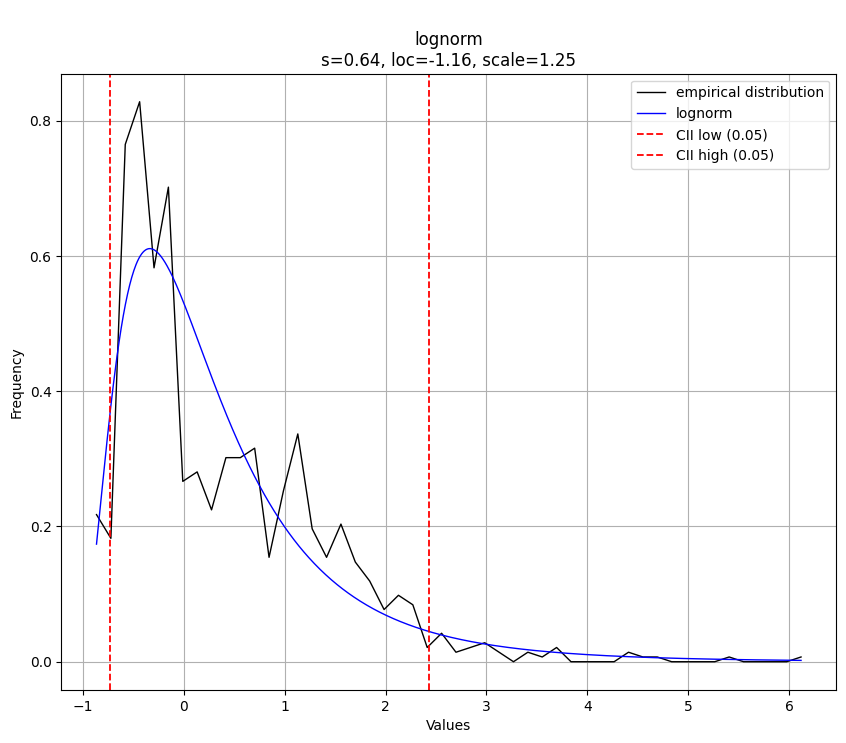

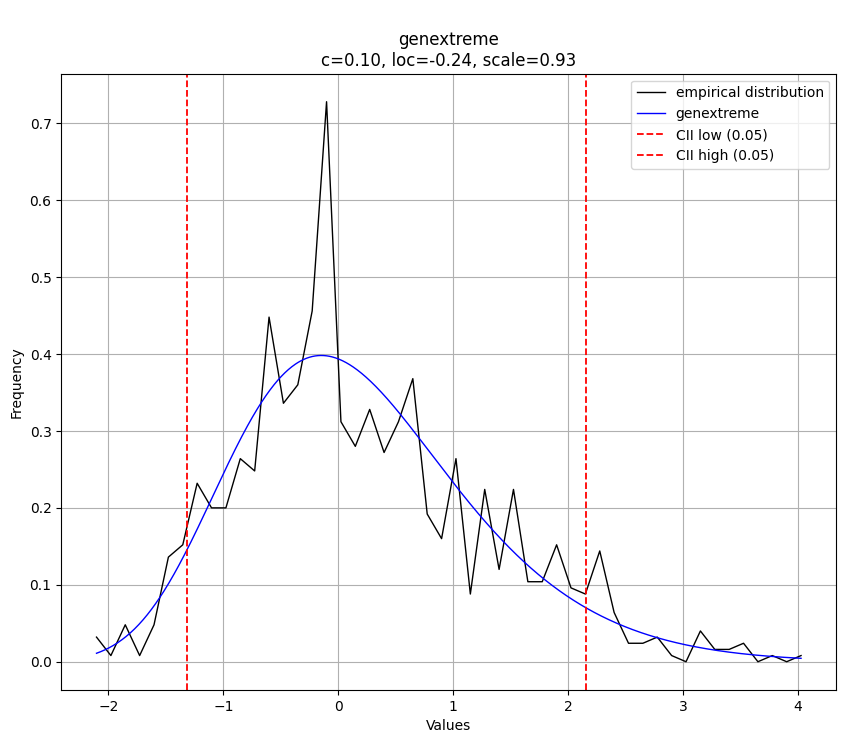

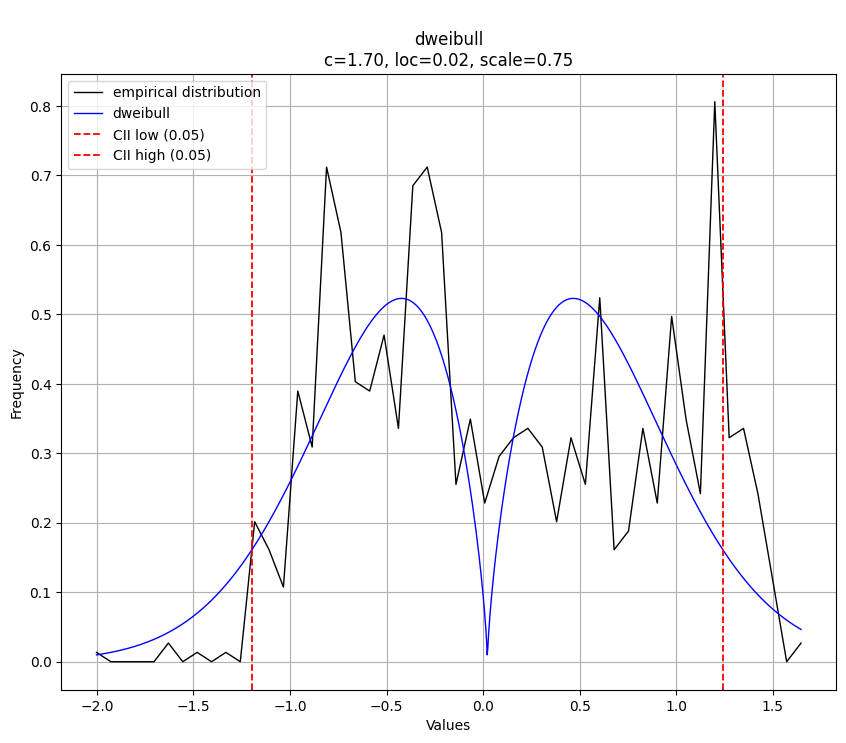

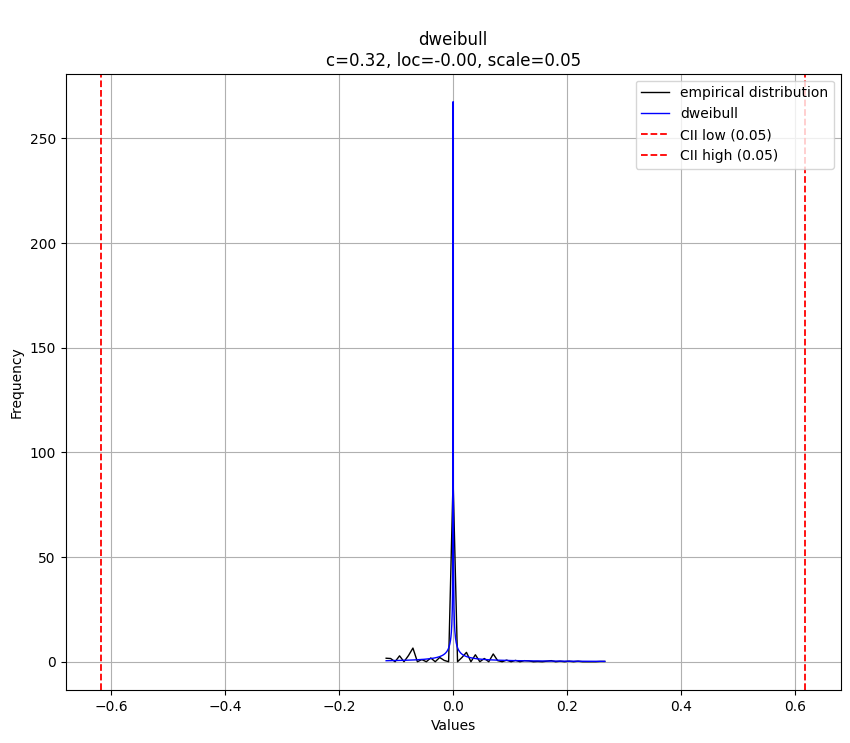

In [43]:
# plot the probability distribution fit
for i, feat in enumerate(robust_dist.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist_r[i].plot()

##### 4.1.2.5 Gaussian Mapping Inspection

In [44]:
# create a dataframe of the transformed features from the best method
feat_trans = quantile_dist.copy()
feat_trans.head()

Rs         T     rho_o     rho_g
0 -0.780244 -0.504155  1.119288  0.005020
1 -0.667155 -0.269276  1.038440  0.005020
2 -0.650524 -0.161336  0.971884 -1.588605
3 -0.414869 -0.161336  1.010164  0.005020
4 -0.197046 -0.040170  0.993580  0.005020

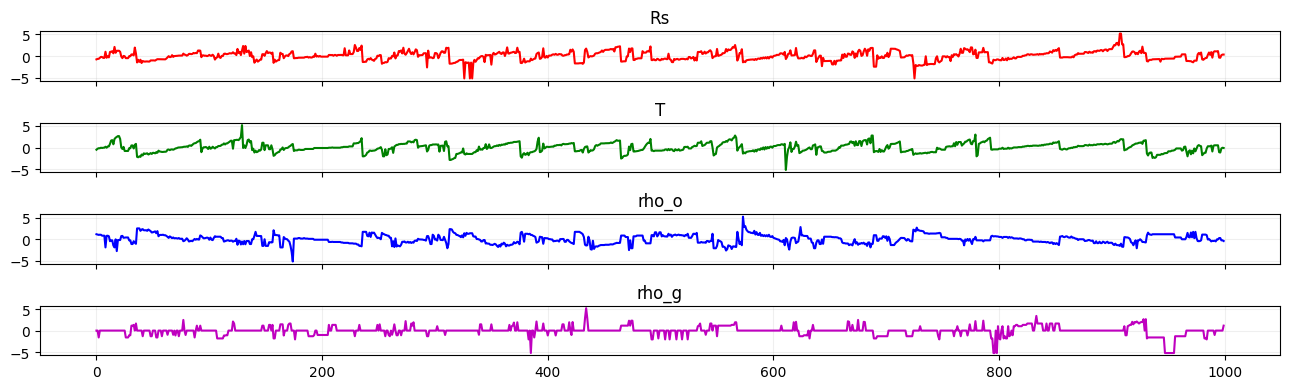

In [45]:
# plot the transformed logs
fig, axs = plt.subplots(figsize=(13, feat_trans.shape[1]), nrows=feat_trans.shape[1], sharex=True)

colors = ['r', 'g', 'b', 'm']
for i in range(feat_trans.shape[1]):
    axs[i].plot(feat_trans.iloc[:, i], color=colors[i])
    axs[i].set_title(feat_trans.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

### 4.2 Covariance Estimation

In [46]:
# merge the transformed features and the target
data_corr = pd.concat([data.iloc[:, 0], feat_trans], axis=1)
data_corr.head()

Pb        Rs         T     rho_o     rho_g
0  3285 -0.780244 -0.504155  1.119288  0.005020
1  3415 -0.667155 -0.269276  1.038440  0.005020
2  3515 -0.650524 -0.161336  0.971884 -1.588605
3  3491 -0.414869 -0.161336  1.010164  0.005020
4  3516 -0.197046 -0.040170  0.993580  0.005020

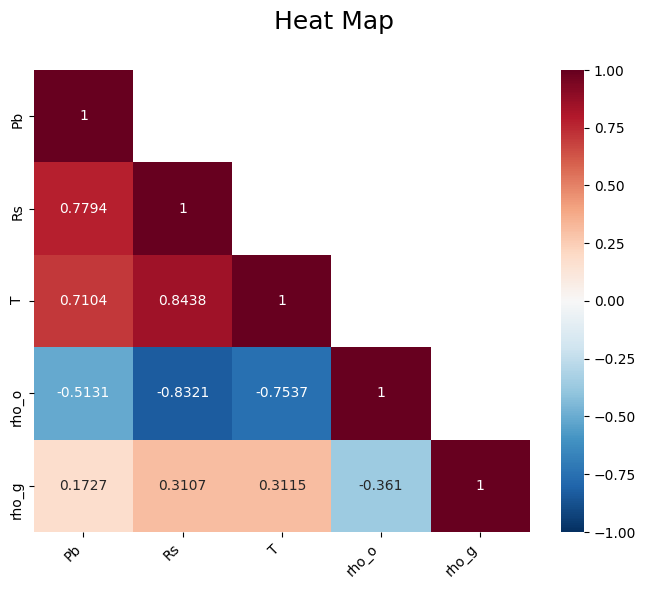

In [47]:
# plot the heat map of the correlation matrix of the transformed data 
corr_mat = np.round(data_corr.corr(method='spearman'), decimals=4)
corr_mask = np.triu(data_corr.corr(method='spearman'), k=1)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap='RdBu_r', center=0, annot=True, fmt='.4g', 
            square=False, mask=corr_mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right')
plt.suptitle('Heat Map', size=18)
plt.show()

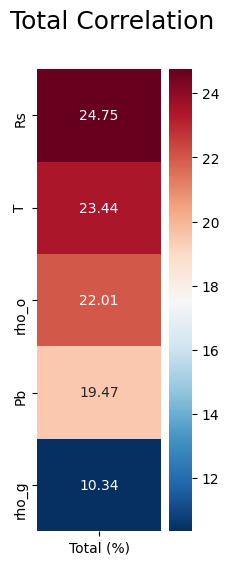

In [48]:
# plot a heat map of the normalized total correlation (ratio of the total absolute correlation of each variable 
# to the total absolute correlation of all variables)
corr_tt = ((corr_mat.abs().sum(axis=1)-1)/((corr_mat.abs().sum(axis=1)-1).sum()))*100
corr_total = pd.DataFrame(corr_tt, columns=['Total (%)']).sort_values(by='Total (%)', ascending=False)

fig, ax = plt.subplots(figsize=(2, 6))
sns.heatmap(corr_total, cmap='RdBu_r', annot=True, fmt='.4g')
plt.suptitle('Total Correlation', size=18)
plt.show()

Features with strong correlation to the target

- Rs

- T

Rs and T are the most important features describing the target

### 4.3 Statistical Features

In [49]:
from matplotlib import cm
from matplotlib import colors

#### 4.3.1 Rolling Statistics

In [50]:
# create a function for computing rolling statistics features on the train or test set
def roll_stats_func(data):
    # data: dataframe to compute rolling statistics features on
    
    mean = []
    median = []
    mini = []
    maxi = []
    diff = []
    
    for i, feat in enumerate(data.columns.unique()):

        mean.append(data[feat].rolling(window=3, center=True, min_periods=1).mean())
        median.append(data[feat].rolling(window=3, center=True, min_periods=1).median())
        mini.append(data[feat].rolling(window=3, center=True, min_periods=1).min())
        maxi.append(data[feat].rolling(window=3, center=True, min_periods=1).max())
        diff.append(data[feat].rolling(window=7).apply(lambda x: x.iloc[-1] - x.iloc[0]) / 
                    pd.DataFrame([data.index]).T[0].rolling(window=7).apply(lambda x: x.iloc[-1] - x.iloc[0]))
            
    mean = pd.DataFrame(np.asarray(mean).T, index=data.index, columns=['{}_mn_roll'.format(i) for i in data.columns])
    median = pd.DataFrame(np.asarray(median).T, index=data.index, columns=['{}_md_roll'.format(i) for i in data.columns])
    mini = pd.DataFrame(np.asarray(mini).T, index=data.index, columns=['{}_min_roll'.format(i) for i in data.columns])
    maxi = pd.DataFrame(np.asarray(maxi).T, index=data.index, columns=['{}_max_roll'.format(i) for i in data.columns])
    diff = pd.DataFrame(np.asarray(diff).T, index=data.index, columns=['{}_df_roll'.format(i) for i in data.columns])
    diff = diff.fillna(0)
            
    stats_feat = pd.concat([mean, median, mini, maxi, diff], axis=1)
        
    return stats_feat

In [51]:
# perform statistical features computation on the train and test sets
feat_roll = roll_stats_func(data=feat_trans)

In [52]:
feat_roll.head()

Rs_mn_roll  T_mn_roll  rho_o_mn_roll  rho_g_mn_roll  Rs_md_roll  T_md_roll  \
0   -0.723700  -0.386716       1.078864       0.005020   -0.723700  -0.386716   
1   -0.699308  -0.311589       1.043204      -0.526188   -0.667155  -0.269276   
2   -0.577516  -0.197316       1.006829      -0.526188   -0.650524  -0.161336   
3   -0.420813  -0.120947       0.991876      -0.526188   -0.414869  -0.161336   
4   -0.282788  -0.102935       0.930271       0.005020   -0.236449  -0.107298   

   rho_o_md_roll  rho_g_md_roll  Rs_min_roll  T_min_roll  rho_o_min_roll  \
0       1.078864        0.00502    -0.780244   -0.504155        1.038440   
1       1.038440        0.00502    -0.780244   -0.504155        0.971884   
2       1.010164        0.00502    -0.667155   -0.269276        0.971884   
3       0.993580        0.00502    -0.650524   -0.161336        0.971884   
4       0.993580        0.00502    -0.414869   -0.161336        0.787069   

   rho_g_min_roll  Rs_max_roll  T_max_roll  rho_o_max_roll  rho_g_max_roll  \
0        0.005020    -0.667155   -0.269276        1.119288         0.00502   
1       -1.588605    -0.650524   -0.161336        1.119288         0.00502   
2       -1.588605    -0.414869   -0.161336        1.038440         0.00502   
3       -1.588605    -0.197046   -0.040170        1.010164         0.00502   
4        0.005020    -0.197046   -0.040170        1.010164         0.00502   

   Rs_df_roll  T_df_roll  rho_o_df_roll  rho_g_df_roll  
0         0.0        0.0            0.0            0.0  
1         0.0        0.0            0.0            0.0  
2         0.0        0.0            0.0            0.0  
3         0.0        0.0            0.0            0.0  
4         0.0        0.0            0.0            0.0

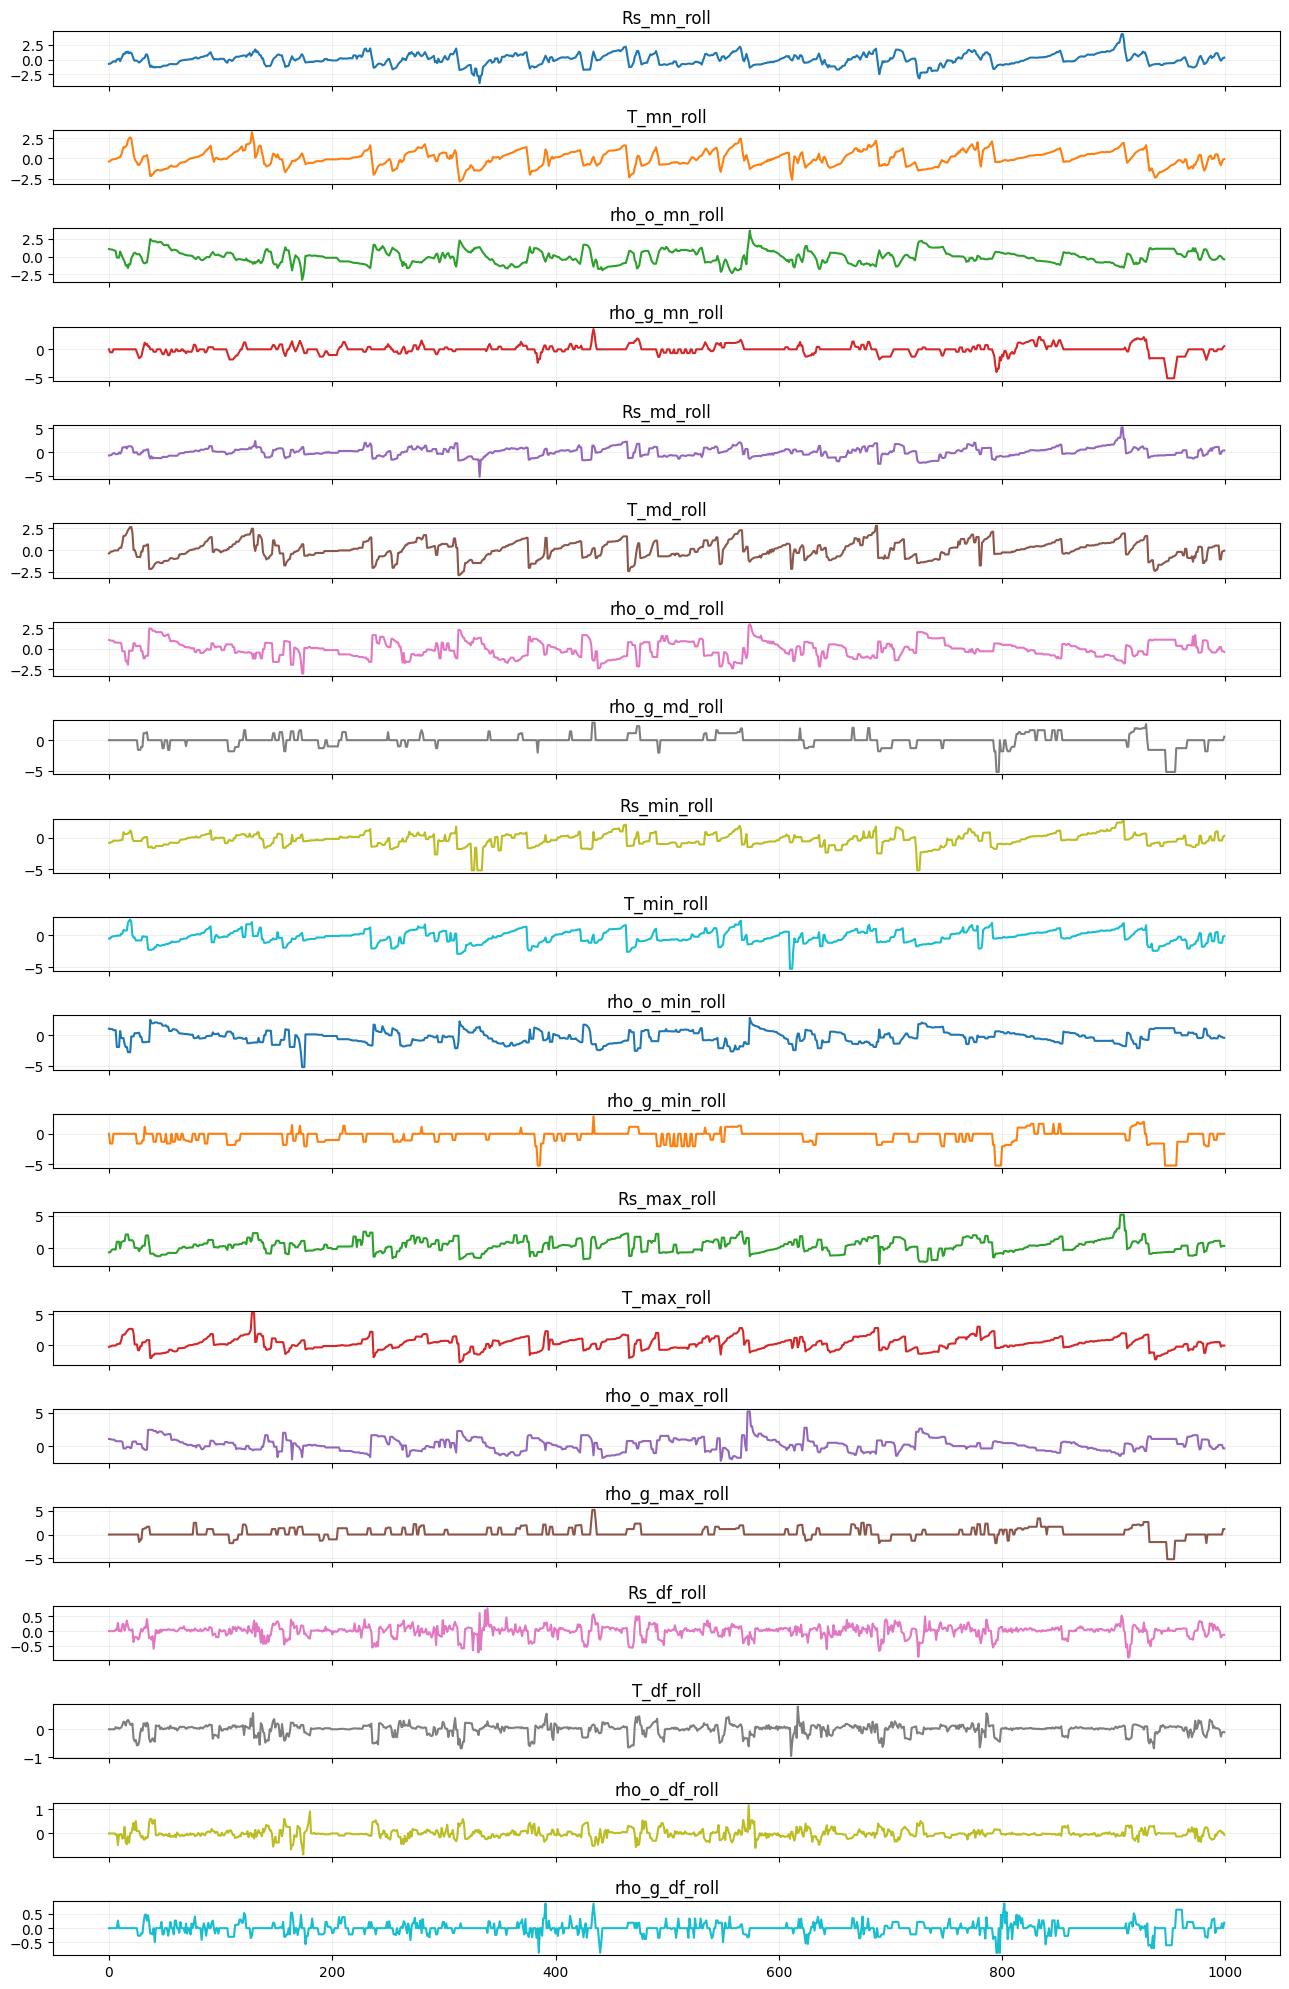

In [53]:
# plot the statistical features
fig, axs = plt.subplots(figsize=(13, feat_roll.shape[1]), nrows=feat_roll.shape[1], sharex=True)

#colors = [cm.get_cmap('gist_ncar_r', len(feat_roll.columns)+1)(n) for n in np.linspace(0,1,len(feat_roll.columns)+1)][1:]
colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
for i in range(feat_roll.shape[1]):
    axs[i].plot(feat_roll.iloc[:, i], color=colors[i])
    axs[i].set_title(feat_roll.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

#### 4.3.2 Expanding Statistics

In [54]:
# create a function for computing expanding statistics features on the train or test set
def exp_stats_func(data):
    # data: dataframe to compute expanding statistics features on
    
    mean = []
    median = []
    mini = []
    maxi = []
    diff = []
    lagf = []
    lagb = []
    
    for i, feat in enumerate(data.columns.unique()):

        mean.append(data[feat].expanding(min_periods=1).mean())
        median.append(data[feat].expanding(min_periods=1).median())
        mini.append(data[feat].expanding(min_periods=1).min())
        maxi.append(data[feat].expanding(min_periods=1).max())
        diff.append(data[feat].expanding().apply(lambda x: x.iloc[-1] - x.iloc[0]) / 
                    pd.DataFrame([data.index]).T[0].expanding().apply(lambda x: x.iloc[-1] - x.iloc[0]))
        lagf.append(data[feat].shift(periods=11))
        lagb.append(data[feat].shift(periods=-11))
            
    mean = pd.DataFrame(np.asarray(mean).T, index=data.index, columns=['{}_mn_exp'.format(i) for i in data.columns])
    median = pd.DataFrame(np.asarray(median).T, index=data.index, columns=['{}_md_exp'.format(i) for i in data.columns])
    mini = pd.DataFrame(np.asarray(mini).T, index=data.index, columns=['{}_min_exp'.format(i) for i in data.columns])
    maxi = pd.DataFrame(np.asarray(maxi).T, index=data.index, columns=['{}_max_exp'.format(i) for i in data.columns])
    diff = pd.DataFrame(np.asarray(diff).T, index=data.index, columns=['{}_df_exp'.format(i) for i in data.columns])
    diff = diff.fillna(0)
    lagf = pd.DataFrame(np.asarray(lagf).T, index=data.index, columns=['{}_lagf_exp'.format(i) for i in data.columns])
    lagf = lagf.fillna(0)
    lagb = pd.DataFrame(np.asarray(lagb).T, index=data.index, columns=['{}_lagb_exp'.format(i) for i in data.columns])
    lagb = lagb.fillna(0)
            
    stats_feat = pd.concat([mean, median, mini, maxi, diff, lagf, lagb], axis=1)
        
    return stats_feat

In [55]:
# perform statistical features computation on the train and test sets
feat_exp = exp_stats_func(data=feat_trans)

In [56]:
feat_exp.head()

Rs_mn_exp  T_mn_exp  rho_o_mn_exp  rho_g_mn_exp  Rs_md_exp  T_md_exp  \
0  -0.780244 -0.504155      1.119288      0.005020  -0.780244 -0.504155   
1  -0.723700 -0.386716      1.078864      0.005020  -0.723700 -0.386716   
2  -0.699308 -0.311589      1.043204     -0.526188  -0.667155 -0.269276   
3  -0.628198 -0.274026      1.034944     -0.393386  -0.658840 -0.215306   
4  -0.541968 -0.227255      1.026671     -0.313705  -0.650524 -0.161336   

   rho_o_md_exp  rho_g_md_exp  Rs_min_exp  T_min_exp  ...  rho_o_df_exp  \
0      1.119288       0.00502   -0.780244  -0.504155  ...      0.000000   
1      1.078864       0.00502   -0.780244  -0.504155  ...     -0.080848   
2      1.038440       0.00502   -0.780244  -0.504155  ...     -0.073702   
3      1.024302       0.00502   -0.780244  -0.504155  ...     -0.036375   
4      1.010164       0.00502   -0.780244  -0.504155  ...     -0.031427   

   rho_g_df_exp  Rs_lagf_exp  T_lagf_exp  rho_o_lagf_exp  rho_g_lagf_exp  \
0      0.000000          0.0         0.0             0.0             0.0   
1      0.000000          0.0         0.0             0.0             0.0   
2     -0.796813          0.0         0.0             0.0             0.0   
3      0.000000          0.0         0.0             0.0             0.0   
4      0.000000          0.0         0.0             0.0             0.0   

   Rs_lagb_exp  T_lagb_exp  rho_o_lagb_exp  rho_g_lagb_exp  
0    -0.319960    0.264075        0.656739         0.00502  
1     0.940172    0.847837       -0.492787         0.00502  
2     1.004606    1.625111       -0.291903         0.00502  
3     1.097637    1.719918       -0.291903         0.00502  
4     0.625908    0.748865       -1.495261         0.00502  

[5 rows x 28 columns]

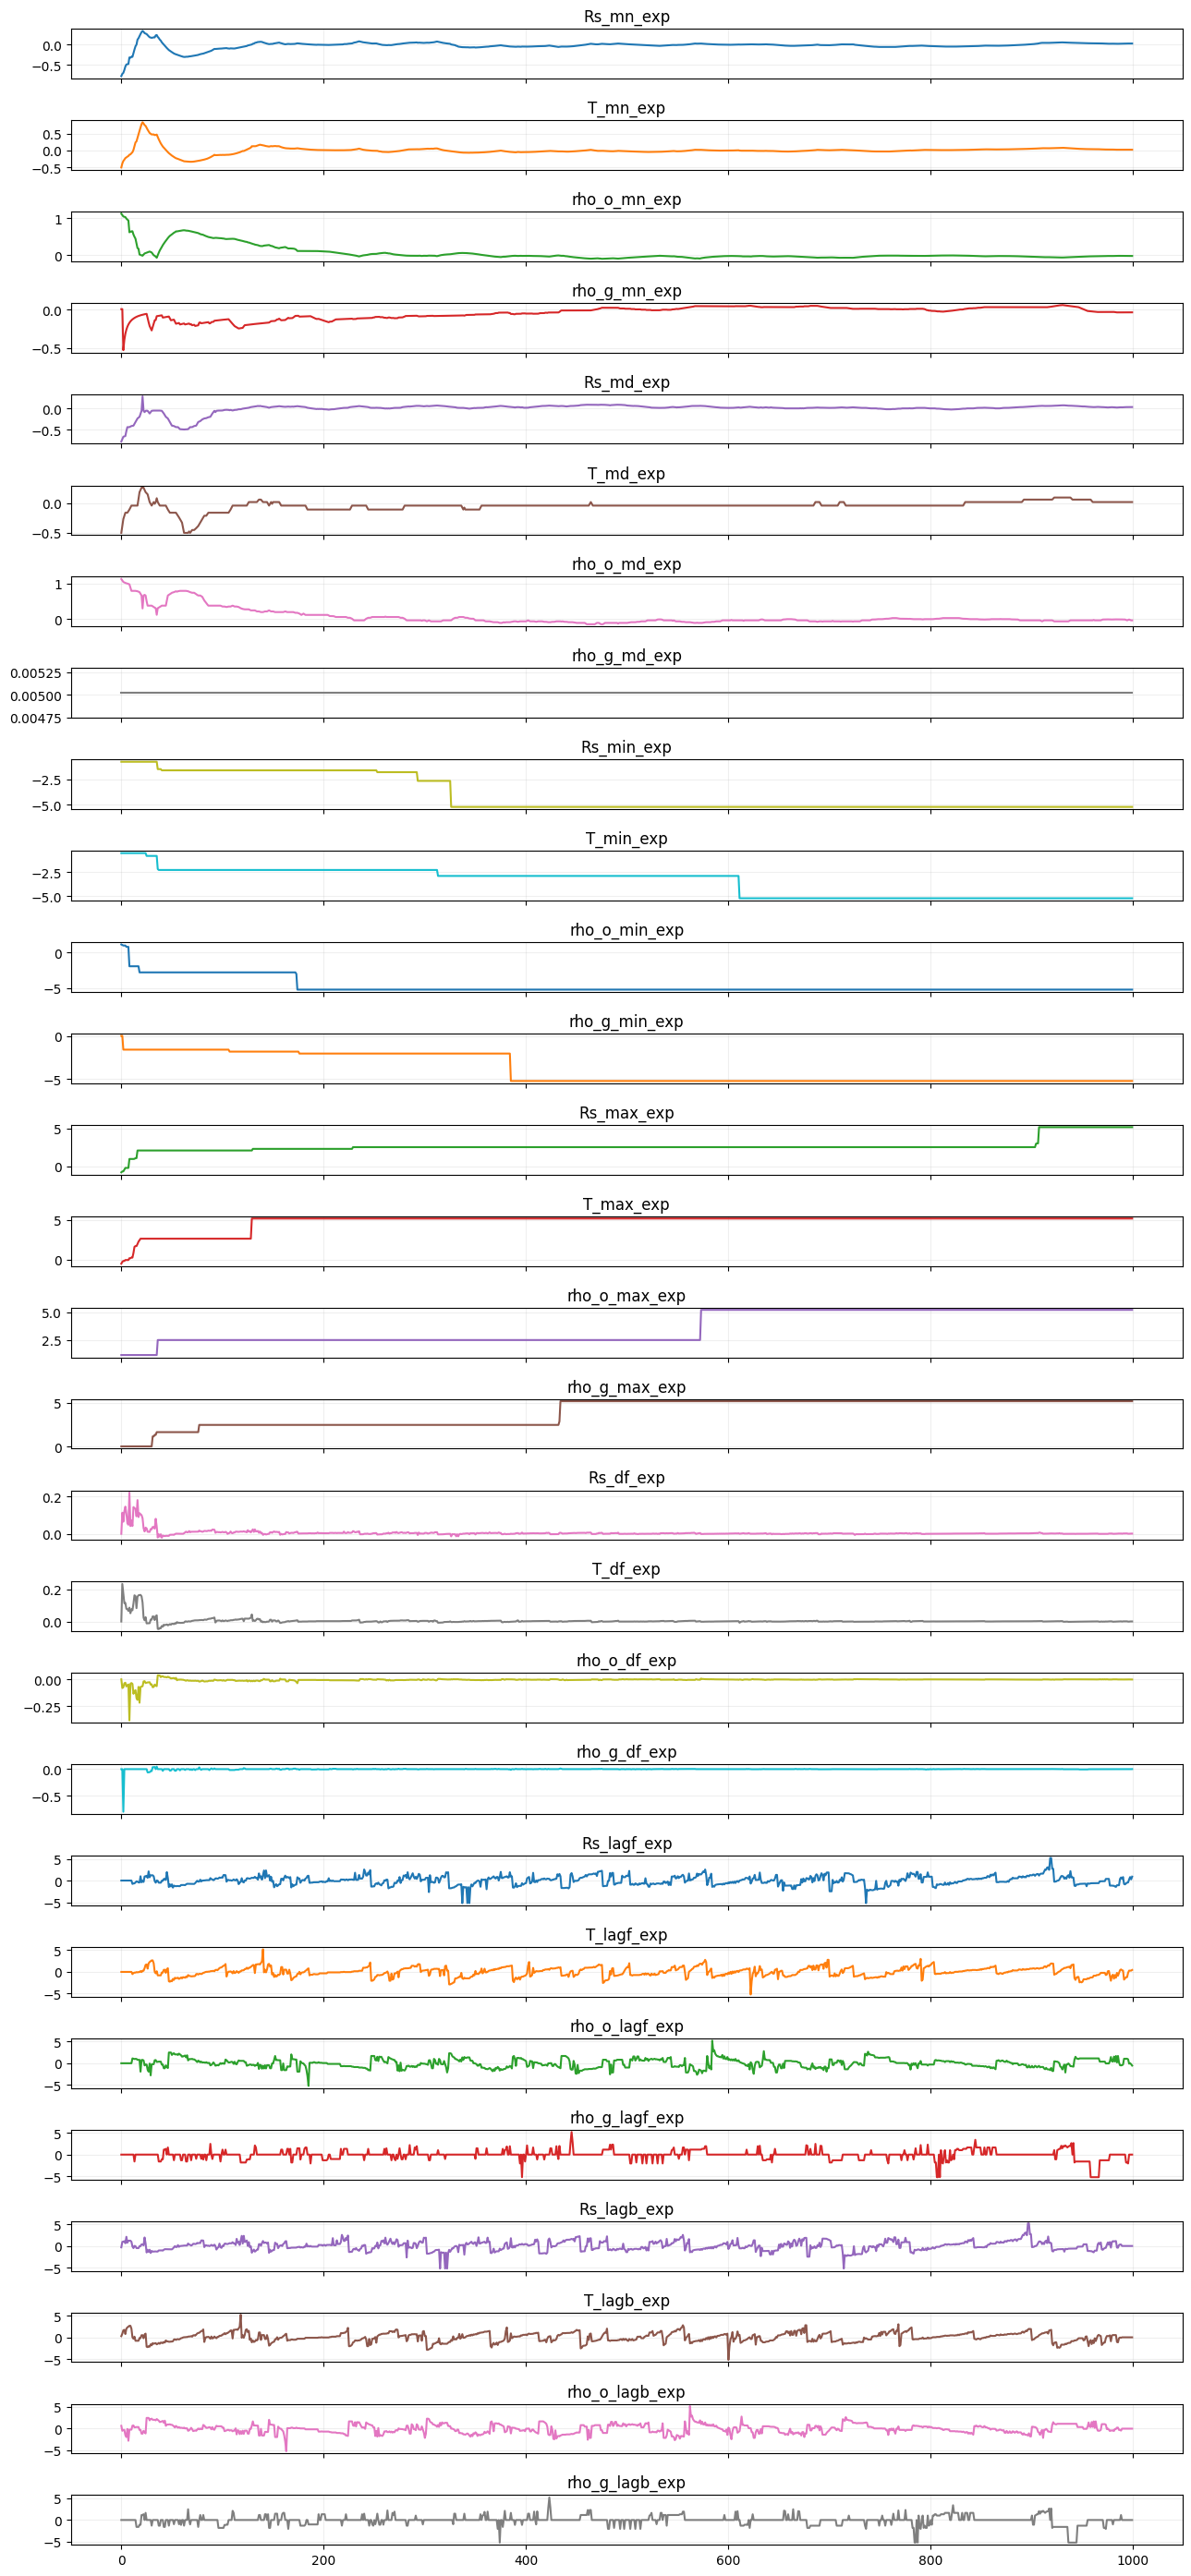

In [57]:
# plot the statistical features
fig, axs = plt.subplots(figsize=(13, feat_exp.shape[1]), nrows=feat_exp.shape[1], sharex=True)

#colors = [cm.get_cmap('gist_ncar_r', len(feat_exp.columns)+1)(n) for n in np.linspace(0,1,len(feat_exp.columns)+1)][1:]
colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
for i in range(feat_exp.shape[1]):
    axs[i].plot(feat_exp.iloc[:, i], color=colors[i])
    axs[i].set_title(feat_exp.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

### 4.4 Principal Component Analysis

In [58]:
from sklearn.decomposition import PCA

In [59]:
# split the data to train and test sets
feat_trans_train = feat_trans.iloc[X_train.index, :]
feat_trans_test = feat_trans.iloc[X_test.index, :]

In [60]:
feat_trans_train.head()

Rs         T     rho_o     rho_g
652 -1.931635 -0.718206  0.453484  0.005020
352  0.722544  0.222705 -1.250963  0.005020
618  0.152865 -0.330545  0.332313  1.931635
953 -0.589677 -0.718206  1.119288 -5.199338
126  0.700987  1.719918 -0.364318  0.005020

In [61]:
feat_trans_test.head()

Rs         T     rho_o     rho_g
681  1.686613  1.719918 -1.201288  1.988748
990  0.902651  0.413046 -0.449778  0.005020
155  0.550306  0.517501 -0.787069  0.005020
768  0.746652  0.731261 -0.364318  0.005020
438 -0.026218 -0.603672 -2.351625  0.005020

In [62]:
# check pca attributes
pca_all_fit = PCA(n_components=len(feat_trans_train.columns), whiten=False, random_state=1234).fit(feat_trans_train)
pca_attributes = pd.DataFrame(np.asarray([pca_all_fit.explained_variance_ratio_, 
                                          np.cumsum(pca_all_fit.explained_variance_ratio_), 
                                          pca_all_fit.singular_values_, 
                                          np.cumsum(pca_all_fit.singular_values_)]).T, 
                              columns=['explained_variance_ratio', 'evr_cumulative', 'singular_values', 'sv_cumulative'])
pca_attributes.index = ['PC{}'.format(i) for i in range(1, len(feat_trans_train.columns)+1)]
pca_attributes

explained_variance_ratio  evr_cumulative  singular_values  sv_cumulative
PC1                  0.639409        0.639409        45.834047      45.834047
PC2                  0.223753        0.863162        27.113336      72.947383
PC3                  0.082540        0.945702        16.467667      89.415050
PC4                  0.054298        1.000000        13.356404     102.771454

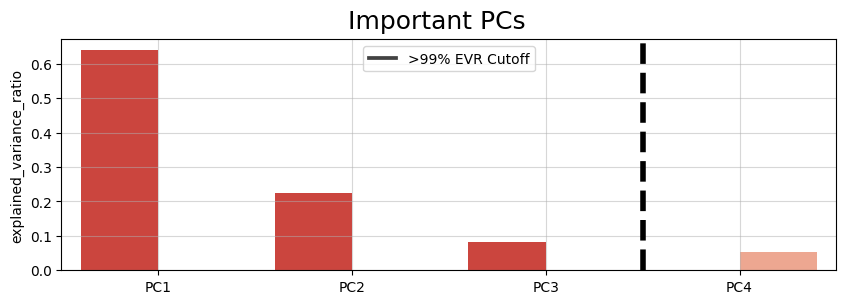

In [63]:
# select important principal components which explain >99% of the variance
fig, ax = plt.subplots(figsize=(10, 3))

pca_attributes['low_evr'] = pca_attributes.index.isin(pca_attributes[pca_attributes.evr_cumulative>0.99].index)
sns.barplot(x=pca_attributes.index, y='explained_variance_ratio', hue='low_evr', data=pca_attributes, palette='Reds_r')
ax.axvline(len(pca_attributes[pca_attributes.evr_cumulative<0.99])-0.5, 
           ymin=0, ymax=1, label='>99% EVR Cutoff', ls='--', lw=4, color='k')
ax.legend(['>99% EVR Cutoff'], loc='upper center')
ax.grid(alpha=0.5)
plt.suptitle('Important PCs', size=18)
plt.show()

In [64]:
# perform principal components extraction on the train set
pca_fit = PCA(n_components=len(pca_attributes[pca_attributes.evr_cumulative<0.99]), 
              whiten=False, random_state=1234).fit(feat_trans_train)
feat_pca_train = pca_fit.transform(feat_trans_train)
feat_pca_train = pd.DataFrame(feat_pca_train, index=feat_trans_train.index, 
                              columns=['PC{}'.format(i) for i in range(1, feat_pca_train.shape[1]+1)])

In [65]:
# create a function for performing principal components extraction on the test set
def pca_func(data, pca_fit):
    # data: dataframe to be transformed to principal components
    # pca_fit: model from the training set
    
    pcomps = pca_fit.transform(data)
    pcomps = pd.DataFrame(pcomps, index=data.index, columns=['PC{}'.format(i) for i in range(1, pcomps.shape[1]+1)])
    
    return pcomps

In [66]:
# perform principal components extraction on the test set
feat_pca_test = pca_func(data=feat_trans_test, pca_fit=pca_fit)

In [67]:
# merge the train and validation sets
feat_pca = pd.concat([feat_pca_train, feat_pca_test], axis=0)
feat_pca = feat_pca.sort_index()
feat_pca.head()

PC1       PC2       PC3
0  1.294107 -0.456482 -0.462094
1  1.061942 -0.370323 -0.566617
2  1.482880  1.159993 -0.475487
3  0.846831 -0.281208 -0.615962
4  0.650487 -0.199153 -0.683721

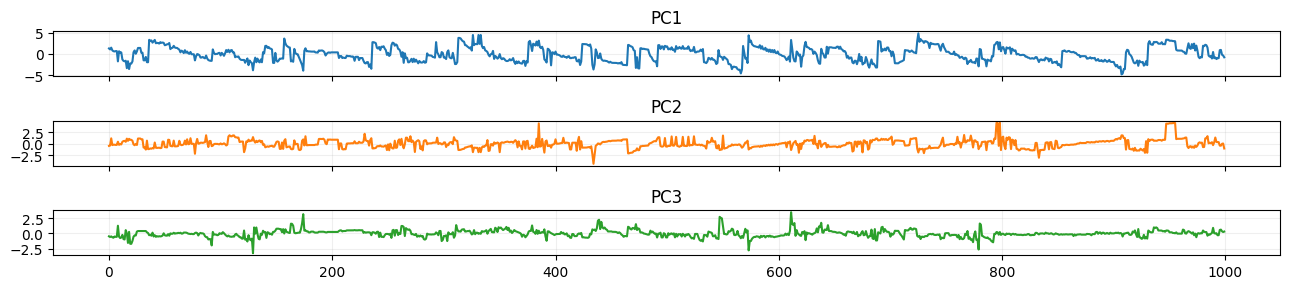

In [68]:
# plot the principal components
fig, axs = plt.subplots(figsize=(13, feat_pca.shape[1]), nrows=feat_pca.shape[1], sharex=True)

#colors = [cm.get_cmap('gist_ncar_r', len(feat_pca.columns)+1)(n) for n in np.linspace(0,1,len(feat_pca.columns)+1)][1:]
colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
for i in range(feat_pca.shape[1]):
    axs[i].plot(feat_pca.iloc[:, i], color=colors[i])
    axs[i].set_title(feat_pca.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

## 5. Dimensionality Reduction

### 5.1 Feature Selection

In [69]:
from sklearn.feature_selection import SelectFromModel

In [70]:
# merge all features
feat_all = pd.concat([feat_trans, feat_roll, feat_exp, feat_pca], axis=1)
feat_all_train = feat_all.iloc[X_train.index, :]
feat_all_test = feat_all.iloc[X_test.index, :]

In [71]:
# select from model (SFM)
sfm_est = RandomForestRegressor(random_state=1234).fit(X=feat_all_train, y=y_train)

sfm_fit = SelectFromModel(estimator=sfm_est, threshold='0.02*median', 
                          prefit=True, norm_order=2, max_features=None)
feat_sfm_train = sfm_fit.transform(X=feat_all_train)
feat_sfm_train = pd.DataFrame(feat_sfm_train, index=feat_all_train.index, 
                              columns=feat_all_train.columns[sfm_fit.get_support()==True])

In [72]:
# create a function for performing recursive feature elimination on the test set
def rfe_selection(data, sfm_fit):
    # data: dataframe to be evaluated
    # sfm_fit: model from the training set 
    feat_sfm = sfm_fit.transform(X=data)
    feat_sfm = pd.DataFrame(feat_sfm, index=data.index, 
                            columns=data.columns[sfm_fit.get_support()==True])
        
    return feat_sfm

In [73]:
# perform recursive feature elimination on the test set
feat_sfm_test = rfe_selection(data=feat_all_test, sfm_fit=sfm_fit)

In [74]:
# merge the train and test sets
feat_sfm = pd.concat([feat_sfm_train, feat_sfm_test], axis=0)
feat_sfm = feat_sfm.sort_index()
feat_sfm.head()

Rs         T     rho_o     rho_g  Rs_mn_roll  T_mn_roll  \
0 -0.780244 -0.504155  1.119288  0.005020   -0.723700  -0.386716   
1 -0.667155 -0.269276  1.038440  0.005020   -0.699308  -0.311589   
2 -0.650524 -0.161336  0.971884 -1.588605   -0.577516  -0.197316   
3 -0.414869 -0.161336  1.010164  0.005020   -0.420813  -0.120947   
4 -0.197046 -0.040170  0.993580  0.005020   -0.282788  -0.102935   

   rho_o_mn_roll  rho_g_mn_roll  Rs_md_roll  T_md_roll  ...  T_lagf_exp  \
0       1.078864       0.005020   -0.723700  -0.386716  ...         0.0   
1       1.043204      -0.526188   -0.667155  -0.269276  ...         0.0   
2       1.006829      -0.526188   -0.650524  -0.161336  ...         0.0   
3       0.991876      -0.526188   -0.414869  -0.161336  ...         0.0   
4       0.930271       0.005020   -0.236449  -0.107298  ...         0.0   

   rho_o_lagf_exp  rho_g_lagf_exp  Rs_lagb_exp  T_lagb_exp  rho_o_lagb_exp  \
0             0.0             0.0    -0.319960    0.264075        0.656739   
1             0.0             0.0     0.940172    0.847837       -0.492787   
2             0.0             0.0     1.004606    1.625111       -0.291903   
3             0.0             0.0     1.097637    1.719918       -0.291903   
4             0.0             0.0     0.625908    0.748865       -1.495261   

   rho_g_lagb_exp       PC1       PC2       PC3  
0         0.00502  1.294107 -0.456482 -0.462094  
1         0.00502  1.061942 -0.370323 -0.566617  
2         0.00502  1.482880  1.159993 -0.475487  
3         0.00502  0.846831 -0.281208 -0.615962  
4         0.00502  0.650487 -0.199153 -0.683721  

[5 rows x 52 columns]

In [75]:
# determine the rfe thresholds
sfm_thresh = SelectFromModel(estimator=RandomForestRegressor(random_state=1234), threshold='0.02*median', 
                             prefit=False, norm_order=2, max_features=None).fit(X=feat_all_train, y=y_train).threshold_

In [76]:
# obtain the rfe feature importances
sfm_imp = pd.DataFrame(sfm_fit.estimator.feature_importances_, 
                       index=feat_all_train.columns, columns=['Importance'])
sfm_imp = sfm_imp.sort_values(by='Importance', ascending=False)

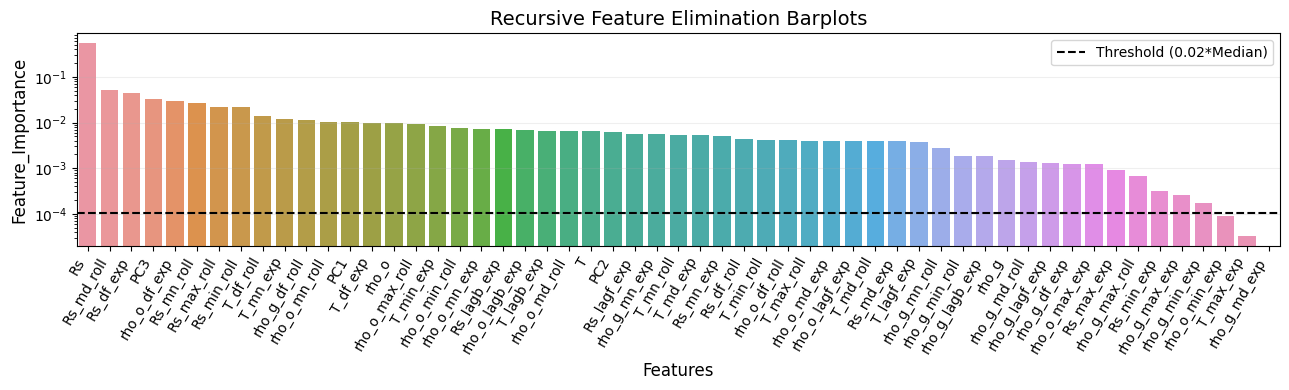

In [77]:
# plot the barplot to compare the values of the feature importances
fig, ax = plt.subplots(figsize=(13, 4))

sns.barplot(x=sfm_imp.index, y=sfm_imp['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation='60')
ax.set_xlabel('Features', size=12)
ax.set_ylabel('Feature_Importance', size=12)
ax.set_yscale('log')
ax.set_title('Recursive Feature Elimination Barplots', size=14)
ax.grid(axis='y', alpha=0.2)
ax.axhline(y=sfm_thresh, ls='--', c='k', label='Threshold (0.02*Median)')
ax.legend()
plt.tight_layout()

## 6. Supervised Regression

### 6.1 Model Selection and Evaluation

In [78]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.pipeline import make_pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import learning_curve

In [79]:
# specify the train and test sets
feat_final = feat_sfm
X_train, X_test, y_train, y_test = feat_final.iloc[X_train.index, :], feat_final.iloc[X_test.index, :], y_train, y_test

In [80]:
feat_final.shape

(1000, 52)

#### 6.1.1 Cross-Validation and Hyper-Parameterization

##### 6.1.1.1 Model Training

In [81]:
# specify the names of the estimators
estimator_names = ['Linear', 'SVM', 
                   'KNN', 'Decision_Tree', 
                   'Random_Forest', 'Extra_Trees', 
                   'Adaptive_Boosting', 'Gradient_Boosting', 
                   'Histogram_GBM', 'Extreme_GBM', 
                   'Light_GBM', 'MLP']

In [82]:
# wrap the mlpregressor to make it compatible with bayessearchcv
class MLPWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, layer1=200, activation='identity', solver='lbfgs', 
                 alpha=0.0001, max_iter=70, random_state=None):
        self.layer1 = layer1
        self.activation = activation
        self.solver = solver
        self.alpha = alpha
        self.max_iter = max_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        model = MLPRegressor(hidden_layer_sizes=[self.layer1], activation=self.activation, solver=self.solver, 
                             alpha=self.alpha, max_iter=self.max_iter, random_state=self.random_state)
        model.fit(X, y)
        self.model = model
        return model
    
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        return self.model.score(X, y)

In [83]:
# create a function for bayesian optimization for cross-validation and hyper-parameter tuning
def model_cv_hp(X_train, y_train, X_test, y_test):
    # X_train: training features
    # y_train: training target
    # X_test: testing features
    # y_test: testing target 
    
    estimator = [LinearRegression(), SVR(), 
                 KNeighborsRegressor(), DecisionTreeRegressor(random_state=1234), 
                 RandomForestRegressor(random_state=1234), ExtraTreesRegressor(random_state=1234), 
                 AdaBoostRegressor(random_state=1234), GradientBoostingRegressor(random_state=1234), 
                 HGBRegressor(random_state=1234), XGBRegressor(random_state=1234), 
                 LGBMRegressor(random_state=1234), MLPWrapper(random_state=1234)]
    
    estimator_names = ['Linear', 'SVM', 
                       'KNN', 'Decision_Tree', 
                       'Random_Forest', 'Extra_Trees', 
                       'Adaptive_Boosting', 'Gradient_Boosting', 
                       'Histogram_GBM', 'Extreme_GBM', 
                       'Light_GBM', 'MLP']

    val_keys = (['split{}_test_score'.format(i) for i in range(3)] + 
                ['mean_test_score', 'std_test_score'])

    search_spaces = [{'linearregression__fit_intercept': Categorical([True]), 
                      'linearregression__normalize': Categorical([True])}, 
                     
                     {'svr__C': Real(5000.0, 50000.0)}, 
                     
                     {'kneighborsregressor__n_neighbors': Integer(5, 500), 
                      'kneighborsregressor__weights': Categorical(['uniform', 'distance']), 
                      'kneighborsregressor__leaf_size': Integer(10, 50)}, 
                     
                     {'decisiontreeregressor__max_depth': Integer(5, 500), 
                      'decisiontreeregressor__min_samples_split': Integer(5, 50), 
                      'decisiontreeregressor__min_samples_leaf': Integer(5, 50), 
                      'decisiontreeregressor__min_weight_fraction_leaf': Real(0.0, 0.5)}, 
                     
                     {'randomforestregressor__n_estimators': Integer(50, 500), 
                      'randomforestregressor__max_depth': Integer(5, 500), 
                      'randomforestregressor__min_samples_split': Integer(5, 50), 
                      'randomforestregressor__min_samples_leaf': Integer(5, 50), 
                      'randomforestregressor__min_weight_fraction_leaf': Real(0.0, 0.5)}, 
                     
                     {'extratreesregressor__n_estimators': Integer(50, 500), 
                      'extratreesregressor__max_depth': Integer(5, 500), 
                      'extratreesregressor__min_samples_split': Integer(5, 50), 
                      'extratreesregressor__min_samples_leaf': Integer(5, 50), 
                      'extratreesregressor__min_weight_fraction_leaf': Real(0.0, 0.5)}, 
                     
                     {'adaboostregressor__n_estimators': Integer(50, 500), 
                      'adaboostregressor__learning_rate': Real(0.001, 1.0), 
                      'adaboostregressor__loss': Categorical(['linear', 'square', 'exponential'])}, 
                     
                     {'gradientboostingregressor__n_estimators': Integer(50, 500), 
                      'gradientboostingregressor__max_depth': Integer(5, 500), 
                      'gradientboostingregressor__min_samples_split': Integer(5, 50), 
                      'gradientboostingregressor__learning_rate': Real(0.001, 1.0), 
                      'gradientboostingregressor__min_samples_leaf': Integer(5, 50), 
                      'gradientboostingregressor__min_weight_fraction_leaf': Real(0.0, 0.5)}, 
                     
                     {'histgradientboostingregressor__max_iter': Integer(50, 500), 
                      'histgradientboostingregressor__max_depth': Integer(5, 500), 
                      'histgradientboostingregressor__learning_rate': Real(0.001, 1.0), 
                      'histgradientboostingregressor__min_samples_leaf': Integer(5, 50)}, 
                     
                     {'xgbregressor__n_estimators': Integer(50, 500), 
                      'xgbregressor__max_depth': Integer(5, 500), 
                      'xgbregressor__learning_rate': Real(0.001, 1.0), 
                      'xgbregressor__min_child_weight': Real(0.0, 1.0)}, 

                     {'lgbmregressor__n_estimators': Integer(50, 500), 
                      'lgbmregressor__max_depth': Integer(5, 500), 
                      'lgbmregressor__learning_rate': Real(0.001, 1.0), 
                      'lgbmregressor__min_child_samples': Integer(5, 50), 
                      'lgbmregressor__min_child_weight': Real(0.0, 1.0)}, 
                     
                     {'mlpwrapper__layer1': Integer(50, 200), 
                      'mlpwrapper__activation': Categorical(['identity']), 
                      'mlpwrapper__solver': Categorical(['lbfgs']), 
                      'mlpwrapper__alpha': Real(0.00005, 0.0005), 
                      'mlpwrapper__max_iter': Integer(50, 200)}]

    optimizer_kwargs = {'base_estimator': 'RF'}

    #def early_stop(best_result):
        #score = model_cv_hp.best_score_
        #if score >= 0.98:
            #print('Early Stop!')
            #return True

    scrs_fit = []
    scrs_val = [[] for est in estimator]
    scrs_test = [[] for est in estimator]
    ests = [est for est in estimator]
    best_fit = [est for est in estimator]

    for i in range(len(estimator)):
        print()
        print('*******{} estimator cross-validation/hyper-parameterization******* \n'.format(estimator_names[i]))
        start_time = time.time()
        ests[i] = make_pipeline(estimator[i])
        cv_hp = BayesSearchCV(estimator=ests[i], search_spaces=search_spaces[i], n_iter=50, 
                              optimizer_kwargs=optimizer_kwargs, scoring='neg_root_mean_squared_error', 
                              n_points=1, refit=True, cv=3, verbose=2, random_state=1234)
        scrs_fit.append(cv_hp.fit(X=X_train.values, y=y_train.values))
        scrs_test[i].append(scrs_fit[i].score(X=X_test.values, y=y_test.values))

        for key in val_keys:
            scrs_val[i].append(scrs_fit[i].cv_results_[key][scrs_fit[i].best_index_])
            
        best_fit[i] = scrs_fit[i].best_estimator_

        end_time = time.time()
        print(f'Training time: {end_time - start_time} seconds')
    
    scrs_val_df = pd.DataFrame(scrs_val, index=estimator_names, 
                               columns=val_keys[:3]+['mean_val_score', 'std_val_score'])
    scrs_val_df.iloc[:, :-1] = scrs_val_df.iloc[:, :-1]*-1
    scrs_test_df = pd.DataFrame(scrs_test, index=estimator_names, 
                                columns=['test_score'])
    scrs_test_df = scrs_test_df*-1
    scrs_df = pd.concat([scrs_val_df, scrs_test_df], axis=1)
    
    return scrs_fit, best_fit, scrs_df

In [84]:
# cross-validation and hyper-parameterization
scrs_fit, best_fit, cv_scrs_df = model_cv_hp(X_train=X_train, y_train=y_train, 
                                             X_test=X_test, y_test=y_test)


*******Linear estimator cross-validation/hyper-parameterization******* 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, li

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregressi

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregressi

[CV] END ...........................svr__C=16973.19406153025; total time=   0.1s
[CV] END ...........................svr__C=16973.19406153025; total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..........................svr__C=16955.288273826085; total time=   0.1s
[CV] END ..........................svr__C=16955.288273826085; total time=   0.1s
[CV] END ..........................svr__C=16955.288273826085; total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..........................svr__C=16961.943126973158; total time=   0.1s
[CV] END ..........................svr__C=16961.943126973158; total time=   0.1s
[CV] END ..........................svr__C=16961.943126973158; total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...........................svr__C=16948.27434326377; total time=   0.1s
[CV] END ...........................svr__C=16948.27434326377; total time=   0.1s
[CV] END ....

Training time: 93.58388662338257 seconds

*******KNN estimator cross-validation/hyper-parameterization******* 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=34, kneighborsregressor__n_neighbors=277, kneighborsregressor__weights=uniform; total time=   0.2s
[CV] END kneighborsregressor__leaf_size=34, kneighborsregressor__n_neighbors=277, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=34, kneighborsregressor__n_neighbors=277, kneighborsregressor__weights=uniform; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=34, kneighborsregressor__n_neighbors=486, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=34, kneighborsregressor__n_neighbors=486, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=34, kneighborsregressor__n_neighbor

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=21, kneighborsregressor__n_neighbors=20, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=21, kneighborsregressor__n_neighbors=20, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=21, kneighborsregressor__n_neighbors=20, kneighborsregressor__weights=distance; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=27, kneighborsregressor__n_neighbors=27, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=27, kneighborsregressor__n_neighbors=27, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=27, kneighborsregressor__n_neighbors=27, kneighborsregressor__weights=uniform; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=44, kneighborsregressor__n_neighbors=6, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=44, kneighborsregressor__n_neighbors=6, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=44, kneighborsregressor__n_neighbors=6, kneighborsregressor__weights=distance; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=44, kneighborsregressor__n_neighbors=6, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=44, kneighborsregressor__n_neighbors=6, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=44, kneighborsregressor__n_neighbors=6, kneighborsregressor__weights=distance; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=94, decisiontreeregressor__min_samples_leaf=13, decisiontreeregressor__min_samples_split=32, decisiontreeregressor__min_weight_fraction_leaf=0.27833545262691883; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=94, decisiontreeregressor__min_samples_leaf=13, decisiontreeregressor__min_samples_split=32, decisiontreeregressor__min_weight_fraction_leaf=0.27833545262691883; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=94, decisiontreeregressor__min_samples_leaf=13, decisiontreeregressor__min_samples_split=32, decisiontreeregressor__min_weight_fraction_leaf=0.27833545262691883; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=466, decisiontreeregressor__min_samples_leaf=29, decisiontreeregressor__min_samples_split=24, decisiontreeregressor__min_weight_fraction_leaf=0.1673231894790099; total tim

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=477, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=18, decisiontreeregressor__min_weight_fraction_leaf=0.00817199494577492; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=477, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=18, decisiontreeregressor__min_weight_fraction_leaf=0.00817199494577492; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=477, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=18, decisiontreeregressor__min_weight_fraction_leaf=0.00817199494577492; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=481, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=15, decisiontreeregressor__min_weight_fraction_leaf=0.01772825806432277; total tim

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=274, decisiontreeregressor__min_samples_leaf=9, decisiontreeregressor__min_samples_split=17, decisiontreeregressor__min_weight_fraction_leaf=0.026383838792046706; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=274, decisiontreeregressor__min_samples_leaf=9, decisiontreeregressor__min_samples_split=17, decisiontreeregressor__min_weight_fraction_leaf=0.026383838792046706; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=274, decisiontreeregressor__min_samples_leaf=9, decisiontreeregressor__min_samples_split=17, decisiontreeregressor__min_weight_fraction_leaf=0.026383838792046706; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=499, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=18, decisiontreeregressor__min_weight_fraction_leaf=0.026691748838989067; total

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=170, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=20, decisiontreeregressor__min_weight_fraction_leaf=0.0077518497062751286; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=170, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=20, decisiontreeregressor__min_weight_fraction_leaf=0.0077518497062751286; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=170, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=20, decisiontreeregressor__min_weight_fraction_leaf=0.0077518497062751286; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=9, decisiontreeregressor__min_samples_split=18, decisiontreeregressor__min_weight_fraction_leaf=0.030146876191339662; 

[CV] END randomforestregressor__max_depth=126, randomforestregressor__min_samples_leaf=13, randomforestregressor__min_samples_split=30, randomforestregressor__min_weight_fraction_leaf=0.1247743201110654, randomforestregressor__n_estimators=198; total time=   0.7s
[CV] END randomforestregressor__max_depth=126, randomforestregressor__min_samples_leaf=13, randomforestregressor__min_samples_split=30, randomforestregressor__min_weight_fraction_leaf=0.1247743201110654, randomforestregressor__n_estimators=198; total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=82, randomforestregressor__min_samples_leaf=36, randomforestregressor__min_samples_split=36, randomforestregressor__min_weight_fraction_leaf=0.2126486164797176, randomforestregressor__n_estimators=360; total time=   1.0s
[CV] END randomforestregressor__max_depth=82, randomforestregressor__min_samples_leaf=36, randomforestregressor__min_samples_split=36, randomforestreg

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=424, randomforestregressor__min_samples_leaf=21, randomforestregressor__min_samples_split=6, randomforestregressor__min_weight_fraction_leaf=0.018058392082265954, randomforestregressor__n_estimators=283; total time=   1.3s
[CV] END randomforestregressor__max_depth=424, randomforestregressor__min_samples_leaf=21, randomforestregressor__min_samples_split=6, randomforestregressor__min_weight_fraction_leaf=0.018058392082265954, randomforestregressor__n_estimators=283; total time=   1.3s
[CV] END randomforestregressor__max_depth=424, randomforestregressor__min_samples_leaf=21, randomforestregressor__min_samples_split=6, randomforestregressor__min_weight_fraction_leaf=0.018058392082265954, randomforestregressor__n_estimators=283; total time=   1.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=447, randomforestregressor__min_samples_leaf=

[CV] END randomforestregressor__max_depth=478, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=27, randomforestregressor__min_weight_fraction_leaf=0.0737290920105901, randomforestregressor__n_estimators=326; total time=   1.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=167, randomforestregressor__min_samples_leaf=6, randomforestregressor__min_samples_split=21, randomforestregressor__min_weight_fraction_leaf=0.024813487721516876, randomforestregressor__n_estimators=348; total time=   2.1s
[CV] END randomforestregressor__max_depth=167, randomforestregressor__min_samples_leaf=6, randomforestregressor__min_samples_split=21, randomforestregressor__min_weight_fraction_leaf=0.024813487721516876, randomforestregressor__n_estimators=348; total time=   2.3s
[CV] END randomforestregressor__max_depth=167, randomforestregressor__min_samples_leaf=6, randomforestregressor__min_samples_split=21, randomforestr

[CV] END randomforestregressor__max_depth=129, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=7, randomforestregressor__min_weight_fraction_leaf=0.008151841889197322, randomforestregressor__n_estimators=353; total time=   2.6s
[CV] END randomforestregressor__max_depth=129, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=7, randomforestregressor__min_weight_fraction_leaf=0.008151841889197322, randomforestregressor__n_estimators=353; total time=   2.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=120, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=6, randomforestregressor__min_weight_fraction_leaf=0.006230744154832936, randomforestregressor__n_estimators=187; total time=   1.3s
[CV] END randomforestregressor__max_depth=120, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=6, randomforestreg

[CV] END randomforestregressor__max_depth=454, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=7, randomforestregressor__min_weight_fraction_leaf=0.014008934678310606, randomforestregressor__n_estimators=257; total time=   1.7s
[CV] END randomforestregressor__max_depth=454, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=7, randomforestregressor__min_weight_fraction_leaf=0.014008934678310606, randomforestregressor__n_estimators=257; total time=   1.7s
[CV] END randomforestregressor__max_depth=454, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=7, randomforestregressor__min_weight_fraction_leaf=0.014008934678310606, randomforestregressor__n_estimators=257; total time=   1.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=470, randomforestregressor__min_samples_leaf=6, randomforestregressor__min_samples_split=6, randomforestreg

[CV] END extratreesregressor__max_depth=112, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=21, extratreesregressor__min_weight_fraction_leaf=0.37755409427708375, extratreesregressor__n_estimators=291; total time=   0.2s
[CV] END extratreesregressor__max_depth=112, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=21, extratreesregressor__min_weight_fraction_leaf=0.37755409427708375, extratreesregressor__n_estimators=291; total time=   0.2s
[CV] END extratreesregressor__max_depth=112, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=21, extratreesregressor__min_weight_fraction_leaf=0.37755409427708375, extratreesregressor__n_estimators=291; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=126, extratreesregressor__min_samples_leaf=13, extratreesregressor__min_samples_split=30, extratreesregressor__min_weight_fraction_leaf=

[CV] END extratreesregressor__max_depth=441, extratreesregressor__min_samples_leaf=44, extratreesregressor__min_samples_split=9, extratreesregressor__min_weight_fraction_leaf=0.028371534571520703, extratreesregressor__n_estimators=276; total time=   0.3s
[CV] END extratreesregressor__max_depth=441, extratreesregressor__min_samples_leaf=44, extratreesregressor__min_samples_split=9, extratreesregressor__min_weight_fraction_leaf=0.028371534571520703, extratreesregressor__n_estimators=276; total time=   0.3s
[CV] END extratreesregressor__max_depth=441, extratreesregressor__min_samples_leaf=44, extratreesregressor__min_samples_split=9, extratreesregressor__min_weight_fraction_leaf=0.028371534571520703, extratreesregressor__n_estimators=276; total time=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=302, extratreesregressor__min_samples_leaf=20, extratreesregressor__min_samples_split=8, extratreesregressor__min_weight_fraction_leaf=0

[CV] END extratreesregressor__max_depth=479, extratreesregressor__min_samples_leaf=7, extratreesregressor__min_samples_split=39, extratreesregressor__min_weight_fraction_leaf=0.0019358990384754642, extratreesregressor__n_estimators=396; total time=   0.7s
[CV] END extratreesregressor__max_depth=479, extratreesregressor__min_samples_leaf=7, extratreesregressor__min_samples_split=39, extratreesregressor__min_weight_fraction_leaf=0.0019358990384754642, extratreesregressor__n_estimators=396; total time=   0.7s
[CV] END extratreesregressor__max_depth=479, extratreesregressor__min_samples_leaf=7, extratreesregressor__min_samples_split=39, extratreesregressor__min_weight_fraction_leaf=0.0019358990384754642, extratreesregressor__n_estimators=396; total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=266, extratreesregressor__min_samples_leaf=5, extratreesregressor__min_samples_split=30, extratreesregressor__min_weight_fraction_lea

[CV] END extratreesregressor__max_depth=6, extratreesregressor__min_samples_leaf=5, extratreesregressor__min_samples_split=10, extratreesregressor__min_weight_fraction_leaf=0.0016029508907722816, extratreesregressor__n_estimators=292; total time=   0.6s
[CV] END extratreesregressor__max_depth=6, extratreesregressor__min_samples_leaf=5, extratreesregressor__min_samples_split=10, extratreesregressor__min_weight_fraction_leaf=0.0016029508907722816, extratreesregressor__n_estimators=292; total time=   0.6s
[CV] END extratreesregressor__max_depth=6, extratreesregressor__min_samples_leaf=5, extratreesregressor__min_samples_split=10, extratreesregressor__min_weight_fraction_leaf=0.0016029508907722816, extratreesregressor__n_estimators=292; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=11, extratreesregressor__min_samples_leaf=8, extratreesregressor__min_samples_split=13, extratreesregressor__min_weight_fraction_leaf=0.003

[CV] END extratreesregressor__max_depth=86, extratreesregressor__min_samples_leaf=5, extratreesregressor__min_samples_split=14, extratreesregressor__min_weight_fraction_leaf=0.023600305447476107, extratreesregressor__n_estimators=291; total time=   0.6s
[CV] END extratreesregressor__max_depth=86, extratreesregressor__min_samples_leaf=5, extratreesregressor__min_samples_split=14, extratreesregressor__min_weight_fraction_leaf=0.023600305447476107, extratreesregressor__n_estimators=291; total time=   0.6s
[CV] END extratreesregressor__max_depth=86, extratreesregressor__min_samples_leaf=5, extratreesregressor__min_samples_split=14, extratreesregressor__min_weight_fraction_leaf=0.023600305447476107, extratreesregressor__n_estimators=291; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=45, extratreesregressor__min_samples_leaf=10, extratreesregressor__min_samples_split=7, extratreesregressor__min_weight_fraction_leaf=0.023

[CV] END adaboostregressor__learning_rate=0.3916627596111954, adaboostregressor__loss=square, adaboostregressor__n_estimators=443; total time=   1.7s
[CV] END adaboostregressor__learning_rate=0.3916627596111954, adaboostregressor__loss=square, adaboostregressor__n_estimators=443; total time=   1.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.45374248653682625, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=252; total time=   1.0s
[CV] END adaboostregressor__learning_rate=0.45374248653682625, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=252; total time=   1.0s
[CV] END adaboostregressor__learning_rate=0.45374248653682625, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=252; total time=   1.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.21912424084109977, adaboostregressor__loss=linear, adaboostregressor__

[CV] END adaboostregressor__learning_rate=0.2779188598793514, adaboostregressor__loss=square, adaboostregressor__n_estimators=330; total time=   1.2s
[CV] END adaboostregressor__learning_rate=0.2779188598793514, adaboostregressor__loss=square, adaboostregressor__n_estimators=330; total time=   1.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.2780727033487225, adaboostregressor__loss=linear, adaboostregressor__n_estimators=333; total time=   1.3s
[CV] END adaboostregressor__learning_rate=0.2780727033487225, adaboostregressor__loss=linear, adaboostregressor__n_estimators=333; total time=   1.3s
[CV] END adaboostregressor__learning_rate=0.2780727033487225, adaboostregressor__loss=linear, adaboostregressor__n_estimators=333; total time=   1.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.27093798367637195, adaboostregressor__loss=linear, adaboostregressor__n_estimators=451; 

[CV] END adaboostregressor__learning_rate=0.24455473584139584, adaboostregressor__loss=linear, adaboostregressor__n_estimators=407; total time=   1.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.24536386305539842, adaboostregressor__loss=square, adaboostregressor__n_estimators=369; total time=   1.4s
[CV] END adaboostregressor__learning_rate=0.24536386305539842, adaboostregressor__loss=square, adaboostregressor__n_estimators=369; total time=   1.3s
[CV] END adaboostregressor__learning_rate=0.24536386305539842, adaboostregressor__loss=square, adaboostregressor__n_estimators=369; total time=   1.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.24413552622080373, adaboostregressor__loss=square, adaboostregressor__n_estimators=445; total time=   1.7s
[CV] END adaboostregressor__learning_rate=0.24413552622080373, adaboostregressor__loss=square, adaboostregressor__n_estimators=

[CV] END gradientboostingregressor__learning_rate=0.3049286634294897, gradientboostingregressor__max_depth=191, gradientboostingregressor__min_samples_leaf=47, gradientboostingregressor__min_samples_split=22, gradientboostingregressor__min_weight_fraction_leaf=0.11677809107050277, gradientboostingregressor__n_estimators=155; total time=   0.7s
[CV] END gradientboostingregressor__learning_rate=0.3049286634294897, gradientboostingregressor__max_depth=191, gradientboostingregressor__min_samples_leaf=47, gradientboostingregressor__min_samples_split=22, gradientboostingregressor__min_weight_fraction_leaf=0.11677809107050277, gradientboostingregressor__n_estimators=155; total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.8730162923662121, gradientboostingregressor__max_depth=432, gradientboostingregressor__min_samples_leaf=38, gradientboostingregressor__min_samples_split=7, gradientboostingregressor__min_weight_fra

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.050662499069942614, gradientboostingregressor__max_depth=58, gradientboostingregressor__min_samples_leaf=15, gradientboostingregressor__min_samples_split=49, gradientboostingregressor__min_weight_fraction_leaf=0.08913972370177849, gradientboostingregressor__n_estimators=182; total time=   1.1s
[CV] END gradientboostingregressor__learning_rate=0.050662499069942614, gradientboostingregressor__max_depth=58, gradientboostingregressor__min_samples_leaf=15, gradientboostingregressor__min_samples_split=49, gradientboostingregressor__min_weight_fraction_leaf=0.08913972370177849, gradientboostingregressor__n_estimators=182; total time=   1.2s
[CV] END gradientboostingregressor__learning_rate=0.050662499069942614, gradientboostingregressor__max_depth=58, gradientboostingregressor__min_samples_leaf=15, gradientboostingregressor__min_samples_split=49, gradientboostingregressor__min_weight

[CV] END gradientboostingregressor__learning_rate=0.0031435028263158056, gradientboostingregressor__max_depth=254, gradientboostingregressor__min_samples_leaf=31, gradientboostingregressor__min_samples_split=46, gradientboostingregressor__min_weight_fraction_leaf=0.008079080427128961, gradientboostingregressor__n_estimators=188; total time=   1.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.22451229340925563, gradientboostingregressor__max_depth=80, gradientboostingregressor__min_samples_leaf=29, gradientboostingregressor__min_samples_split=10, gradientboostingregressor__min_weight_fraction_leaf=0.011116181120979675, gradientboostingregressor__n_estimators=244; total time=   2.6s
[CV] END gradientboostingregressor__learning_rate=0.22451229340925563, gradientboostingregressor__max_depth=80, gradientboostingregressor__min_samples_leaf=29, gradientboostingregressor__min_samples_split=10, gradientboostingregressor__min_weig

[CV] END gradientboostingregressor__learning_rate=0.17664043140514124, gradientboostingregressor__max_depth=162, gradientboostingregressor__min_samples_leaf=25, gradientboostingregressor__min_samples_split=7, gradientboostingregressor__min_weight_fraction_leaf=0.0027801206283205597, gradientboostingregressor__n_estimators=476; total time=   5.0s
[CV] END gradientboostingregressor__learning_rate=0.17664043140514124, gradientboostingregressor__max_depth=162, gradientboostingregressor__min_samples_leaf=25, gradientboostingregressor__min_samples_split=7, gradientboostingregressor__min_weight_fraction_leaf=0.0027801206283205597, gradientboostingregressor__n_estimators=476; total time=   5.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.17562447353613822, gradientboostingregressor__max_depth=52, gradientboostingregressor__min_samples_leaf=10, gradientboostingregressor__min_samples_split=10, gradientboostingregressor__min_weigh

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.116202417922393, gradientboostingregressor__max_depth=295, gradientboostingregressor__min_samples_leaf=23, gradientboostingregressor__min_samples_split=7, gradientboostingregressor__min_weight_fraction_leaf=0.006195415351336777, gradientboostingregressor__n_estimators=270; total time=   3.0s
[CV] END gradientboostingregressor__learning_rate=0.116202417922393, gradientboostingregressor__max_depth=295, gradientboostingregressor__min_samples_leaf=23, gradientboostingregressor__min_samples_split=7, gradientboostingregressor__min_weight_fraction_leaf=0.006195415351336777, gradientboostingregressor__n_estimators=270; total time=   3.0s
[CV] END gradientboostingregressor__learning_rate=0.116202417922393, gradientboostingregressor__max_depth=295, gradientboostingregressor__min_samples_leaf=23, gradientboostingregressor__min_samples_split=7, gradientboostingregressor__min_weight_fracti

[CV] END gradientboostingregressor__learning_rate=0.09174062488413505, gradientboostingregressor__max_depth=36, gradientboostingregressor__min_samples_leaf=11, gradientboostingregressor__min_samples_split=8, gradientboostingregressor__min_weight_fraction_leaf=0.011234953728030796, gradientboostingregressor__n_estimators=391; total time=   8.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.09258880241022803, gradientboostingregressor__max_depth=276, gradientboostingregressor__min_samples_leaf=6, gradientboostingregressor__min_samples_split=5, gradientboostingregressor__min_weight_fraction_leaf=0.00846273784748808, gradientboostingregressor__n_estimators=74; total time=   1.4s
[CV] END gradientboostingregressor__learning_rate=0.09258880241022803, gradientboostingregressor__max_depth=276, gradientboostingregressor__min_samples_leaf=6, gradientboostingregressor__min_samples_split=5, gradientboostingregressor__min_weight_fract

[CV] END gradientboostingregressor__learning_rate=0.03403975462754318, gradientboostingregressor__max_depth=45, gradientboostingregressor__min_samples_leaf=15, gradientboostingregressor__min_samples_split=8, gradientboostingregressor__min_weight_fraction_leaf=0.020438571482319038, gradientboostingregressor__n_estimators=401; total time=   5.5s
[CV] END gradientboostingregressor__learning_rate=0.03403975462754318, gradientboostingregressor__max_depth=45, gradientboostingregressor__min_samples_leaf=15, gradientboostingregressor__min_samples_split=8, gradientboostingregressor__min_weight_fraction_leaf=0.020438571482319038, gradientboostingregressor__n_estimators=401; total time=   5.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.15902231904227443, gradientboostingregressor__max_depth=314, gradientboostingregressor__min_samples_leaf=6, gradientboostingregressor__min_samples_split=5, gradientboostingregressor__min_weight_fra

[CV] END histgradientboostingregressor__learning_rate=0.21912424084109977, histgradientboostingregressor__max_depth=353, histgradientboostingregressor__max_iter=492, histgradientboostingregressor__min_samples_leaf=14; total time=   7.9s
[CV] END histgradientboostingregressor__learning_rate=0.21912424084109977, histgradientboostingregressor__max_depth=353, histgradientboostingregressor__max_iter=492, histgradientboostingregressor__min_samples_leaf=14; total time=   7.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.1373880527176784, histgradientboostingregressor__max_depth=224, histgradientboostingregressor__max_iter=54, histgradientboostingregressor__min_samples_leaf=45; total time=   0.2s
[CV] END histgradientboostingregressor__learning_rate=0.1373880527176784, histgradientboostingregressor__max_depth=224, histgradientboostingregressor__max_iter=54, histgradientboostingregressor__min_samples_leaf=45; total time=   0.

[CV] END histgradientboostingregressor__learning_rate=0.19268148192504392, histgradientboostingregressor__max_depth=451, histgradientboostingregressor__max_iter=215, histgradientboostingregressor__min_samples_leaf=7; total time=   4.1s
[CV] END histgradientboostingregressor__learning_rate=0.19268148192504392, histgradientboostingregressor__max_depth=451, histgradientboostingregressor__max_iter=215, histgradientboostingregressor__min_samples_leaf=7; total time=   4.1s
[CV] END histgradientboostingregressor__learning_rate=0.19268148192504392, histgradientboostingregressor__max_depth=451, histgradientboostingregressor__max_iter=215, histgradientboostingregressor__min_samples_leaf=7; total time=   4.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.18799824997695674, histgradientboostingregressor__max_depth=373, histgradientboostingregressor__max_iter=214, histgradientboostingregressor__min_samples_leaf=9; total time=   4.

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.05155606891524759, histgradientboostingregressor__max_depth=147, histgradientboostingregressor__max_iter=220, histgradientboostingregressor__min_samples_leaf=5; total time=   3.9s
[CV] END histgradientboostingregressor__learning_rate=0.05155606891524759, histgradientboostingregressor__max_depth=147, histgradientboostingregressor__max_iter=220, histgradientboostingregressor__min_samples_leaf=5; total time=   4.0s
[CV] END histgradientboostingregressor__learning_rate=0.05155606891524759, histgradientboostingregressor__max_depth=147, histgradientboostingregressor__max_iter=220, histgradientboostingregressor__min_samples_leaf=5; total time=   3.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.038717203758454326, histgradientboostingregressor__max_depth=203, histgradientboostingregressor__max_iter=234, histgra

[CV] END histgradientboostingregressor__learning_rate=0.03063077423229759, histgradientboostingregressor__max_depth=12, histgradientboostingregressor__max_iter=316, histgradientboostingregressor__min_samples_leaf=6; total time=   5.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.002661845677273617, histgradientboostingregressor__max_depth=337, histgradientboostingregressor__max_iter=447, histgradientboostingregressor__min_samples_leaf=5; total time=   9.2s
[CV] END histgradientboostingregressor__learning_rate=0.002661845677273617, histgradientboostingregressor__max_depth=337, histgradientboostingregressor__max_iter=447, histgradientboostingregressor__min_samples_leaf=5; total time=   9.4s
[CV] END histgradientboostingregressor__learning_rate=0.002661845677273617, histgradientboostingregressor__max_depth=337, histgradientboostingregressor__max_iter=447, histgradientboostingregressor__min_samples_leaf=5; total time= 6.

[CV] END xgbregressor__learning_rate=0.40042229000707313, xgbregressor__max_depth=486, xgbregressor__min_child_weight=0.30318537178747423, xgbregressor__n_estimators=171; total time=   0.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.3049286634294897, xgbregressor__max_depth=191, xgbregressor__min_child_weight=0.6729756821350507, xgbregressor__n_estimators=97; total time=   1.0s
[CV] END xgbregressor__learning_rate=0.3049286634294897, xgbregressor__max_depth=191, xgbregressor__min_child_weight=0.6729756821350507, xgbregressor__n_estimators=97; total time=   1.0s
[CV] END xgbregressor__learning_rate=0.3049286634294897, xgbregressor__max_depth=191, xgbregressor__min_child_weight=0.6729756821350507, xgbregressor__n_estimators=97; total time=   1.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.8730162923662121, xgbregressor__max_depth=432, xgbregressor__min_child_weight=0.998970547287

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.13957159127170743, xgbregressor__max_depth=69, xgbregressor__min_child_weight=0.7506516776678426, xgbregressor__n_estimators=145; total time=   1.9s
[CV] END xgbregressor__learning_rate=0.13957159127170743, xgbregressor__max_depth=69, xgbregressor__min_child_weight=0.7506516776678426, xgbregressor__n_estimators=145; total time=   1.9s
[CV] END xgbregressor__learning_rate=0.13957159127170743, xgbregressor__max_depth=69, xgbregressor__min_child_weight=0.7506516776678426, xgbregressor__n_estimators=145; total time=   1.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.07872216384293675, xgbregressor__max_depth=9, xgbregressor__min_child_weight=0.7236394646158814, xgbregressor__n_estimators=79; total time=   0.4s
[CV] END xgbregressor__learning_rate=0.07872216384293675, xgbregressor__max_depth=9, xgbregressor__min_child_weight=0.72363946461588

[CV] END xgbregressor__learning_rate=0.14176031980936077, xgbregressor__max_depth=123, xgbregressor__min_child_weight=0.7040845360984038, xgbregressor__n_estimators=153; total time=   2.0s
[CV] END xgbregressor__learning_rate=0.14176031980936077, xgbregressor__max_depth=123, xgbregressor__min_child_weight=0.7040845360984038, xgbregressor__n_estimators=153; total time=   1.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.14238557447696423, xgbregressor__max_depth=108, xgbregressor__min_child_weight=0.716655965607844, xgbregressor__n_estimators=148; total time=   1.8s
[CV] END xgbregressor__learning_rate=0.14238557447696423, xgbregressor__max_depth=108, xgbregressor__min_child_weight=0.716655965607844, xgbregressor__n_estimators=148; total time=   2.0s
[CV] END xgbregressor__learning_rate=0.14238557447696423, xgbregressor__max_depth=108, xgbregressor__min_child_weight=0.716655965607844, xgbregressor__n_estimators=148; total time=   1.9s

[CV] END xgbregressor__learning_rate=0.13662279978444472, xgbregressor__max_depth=83, xgbregressor__min_child_weight=0.2678891693665058, xgbregressor__n_estimators=125; total time=   1.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.1310868656528109, xgbregressor__max_depth=101, xgbregressor__min_child_weight=0.25018095641725063, xgbregressor__n_estimators=179; total time=   2.2s
[CV] END xgbregressor__learning_rate=0.1310868656528109, xgbregressor__max_depth=101, xgbregressor__min_child_weight=0.25018095641725063, xgbregressor__n_estimators=179; total time=   2.3s
[CV] END xgbregressor__learning_rate=0.1310868656528109, xgbregressor__max_depth=101, xgbregressor__min_child_weight=0.25018095641725063, xgbregressor__n_estimators=179; total time=   2.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.12995906424719003, xgbregressor__max_depth=70, xgbregressor__min_child_weight=0.53106516

[CV] END lgbmregressor__learning_rate=0.3049252936490857, lgbmregressor__max_depth=469, lgbmregressor__min_child_samples=17, lgbmregressor__min_child_weight=0.6898679330879605, lgbmregressor__n_estimators=98; total time=   0.2s
[CV] END lgbmregressor__learning_rate=0.3049252936490857, lgbmregressor__max_depth=469, lgbmregressor__min_child_samples=17, lgbmregressor__min_child_weight=0.6898679330879605, lgbmregressor__n_estimators=98; total time=   0.1s
[CV] END lgbmregressor__learning_rate=0.3049252936490857, lgbmregressor__max_depth=469, lgbmregressor__min_child_samples=17, lgbmregressor__min_child_weight=0.6898679330879605, lgbmregressor__n_estimators=98; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.8414726714257917, lgbmregressor__max_depth=461, lgbmregressor__min_child_samples=30, lgbmregressor__min_child_weight=0.2495486402221308, lgbmregressor__n_estimators=198; total time=   0.2s
[CV] END lgbmregressor__lear

[CV] END lgbmregressor__learning_rate=0.3194267795615903, lgbmregressor__max_depth=141, lgbmregressor__min_child_samples=7, lgbmregressor__min_child_weight=0.21418709343249648, lgbmregressor__n_estimators=272; total time=   0.8s
[CV] END lgbmregressor__learning_rate=0.3194267795615903, lgbmregressor__max_depth=141, lgbmregressor__min_child_samples=7, lgbmregressor__min_child_weight=0.21418709343249648, lgbmregressor__n_estimators=272; total time=   0.8s
[CV] END lgbmregressor__learning_rate=0.3194267795615903, lgbmregressor__max_depth=141, lgbmregressor__min_child_samples=7, lgbmregressor__min_child_weight=0.21418709343249648, lgbmregressor__n_estimators=272; total time=   0.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.35355895001027454, lgbmregressor__max_depth=333, lgbmregressor__min_child_samples=6, lgbmregressor__min_child_weight=0.8803969170636837, lgbmregressor__n_estimators=456; total time=   1.6s
[CV] END lgbmregressor__l

[CV] END lgbmregressor__learning_rate=0.13652099290720962, lgbmregressor__max_depth=380, lgbmregressor__min_child_samples=20, lgbmregressor__min_child_weight=0.9451258515850017, lgbmregressor__n_estimators=238; total time=   0.4s
[CV] END lgbmregressor__learning_rate=0.13652099290720962, lgbmregressor__max_depth=380, lgbmregressor__min_child_samples=20, lgbmregressor__min_child_weight=0.9451258515850017, lgbmregressor__n_estimators=238; total time=   0.5s
[CV] END lgbmregressor__learning_rate=0.13652099290720962, lgbmregressor__max_depth=380, lgbmregressor__min_child_samples=20, lgbmregressor__min_child_weight=0.9451258515850017, lgbmregressor__n_estimators=238; total time=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.17622129703925618, lgbmregressor__max_depth=291, lgbmregressor__min_child_samples=20, lgbmregressor__min_child_weight=0.193891161876308, lgbmregressor__n_estimators=231; total time=   0.4s
[CV] END lgbmregressor

[CV] END lgbmregressor__learning_rate=0.013526740045764825, lgbmregressor__max_depth=308, lgbmregressor__min_child_samples=7, lgbmregressor__min_child_weight=0.08749116524046087, lgbmregressor__n_estimators=156; total time=   0.4s
[CV] END lgbmregressor__learning_rate=0.013526740045764825, lgbmregressor__max_depth=308, lgbmregressor__min_child_samples=7, lgbmregressor__min_child_weight=0.08749116524046087, lgbmregressor__n_estimators=156; total time=   0.4s
[CV] END lgbmregressor__learning_rate=0.013526740045764825, lgbmregressor__max_depth=308, lgbmregressor__min_child_samples=7, lgbmregressor__min_child_weight=0.08749116524046087, lgbmregressor__n_estimators=156; total time=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.17118996219443527, lgbmregressor__max_depth=372, lgbmregressor__min_child_samples=6, lgbmregressor__min_child_weight=0.1660426731289473, lgbmregressor__n_estimators=72; total time=   0.1s
[CV] END lgbmregress

[CV] END lgbmregressor__learning_rate=0.06140598749541398, lgbmregressor__max_depth=103, lgbmregressor__min_child_samples=5, lgbmregressor__min_child_weight=0.5208878759809022, lgbmregressor__n_estimators=455; total time=   1.5s
[CV] END lgbmregressor__learning_rate=0.06140598749541398, lgbmregressor__max_depth=103, lgbmregressor__min_child_samples=5, lgbmregressor__min_child_weight=0.5208878759809022, lgbmregressor__n_estimators=455; total time=   1.5s
[CV] END lgbmregressor__learning_rate=0.06140598749541398, lgbmregressor__max_depth=103, lgbmregressor__min_child_samples=5, lgbmregressor__min_child_weight=0.5208878759809022, lgbmregressor__n_estimators=455; total time=   1.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.054610579131961046, lgbmregressor__max_depth=248, lgbmregressor__min_child_samples=5, lgbmregressor__min_child_weight=0.38665688982134694, lgbmregressor__n_estimators=500; total time=   1.7s
[CV] END lgbmregressor_

[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004925194534662604, mlpwrapper__layer1=71, mlpwrapper__max_iter=174, mlpwrapper__solver=lbfgs; total time=   0.6s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004925194534662604, mlpwrapper__layer1=71, mlpwrapper__max_iter=174, mlpwrapper__solver=lbfgs; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004661471786361149, mlpwrapper__layer1=94, mlpwrapper__max_iter=175, mlpwrapper__solver=lbfgs; total time=   0.6s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004661471786361149, mlpwrapper__layer1=94, mlpwrapper__max_iter=175, mlpwrapper__solver=lbfgs; total time=   0.5s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004661471786361149, mlpwrapper__layer1=94, mlpwrapper__max_iter=175, mlpwrapper__solver=lbfgs; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fi

[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00047496648946985154, mlpwrapper__layer1=94, mlpwrapper__max_iter=77, mlpwrapper__solver=lbfgs; total time=   0.2s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00047496648946985154, mlpwrapper__layer1=94, mlpwrapper__max_iter=77, mlpwrapper__solver=lbfgs; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004766142806090907, mlpwrapper__layer1=109, mlpwrapper__max_iter=58, mlpwrapper__solver=lbfgs; total time=   0.2s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004766142806090907, mlpwrapper__layer1=109, mlpwrapper__max_iter=58, mlpwrapper__solver=lbfgs; total time=   0.2s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004766142806090907, mlpwrapper__layer1=109, mlpwrapper__max_iter=58, mlpwrapper__solver=lbfgs; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fi

[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00046651585054073217, mlpwrapper__layer1=91, mlpwrapper__max_iter=193, mlpwrapper__solver=lbfgs; total time=   0.6s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00046651585054073217, mlpwrapper__layer1=91, mlpwrapper__max_iter=193, mlpwrapper__solver=lbfgs; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004698614508423054, mlpwrapper__layer1=94, mlpwrapper__max_iter=176, mlpwrapper__solver=lbfgs; total time=   0.6s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004698614508423054, mlpwrapper__layer1=94, mlpwrapper__max_iter=176, mlpwrapper__solver=lbfgs; total time=   0.7s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0004698614508423054, mlpwrapper__layer1=94, mlpwrapper__max_iter=176, mlpwrapper__solver=lbfgs; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 

In [85]:
# best parameters
for i, est in enumerate(estimator_names):
    print()
    print(est, 'Estimator Best Parameters:')
    print(scrs_fit[i].cv_results_['params'][scrs_fit[i].best_index_])


Linear Estimator Best Parameters:
OrderedDict([('linearregression__fit_intercept', True), ('linearregression__normalize', True)])

SVM Estimator Best Parameters:
OrderedDict([('svr__C', 16973.19406153025)])

KNN Estimator Best Parameters:
OrderedDict([('kneighborsregressor__leaf_size', 30), ('kneighborsregressor__n_neighbors', 5), ('kneighborsregressor__weights', 'distance')])

Decision_Tree Estimator Best Parameters:
OrderedDict([('decisiontreeregressor__max_depth', 477), ('decisiontreeregressor__min_samples_leaf', 5), ('decisiontreeregressor__min_samples_split', 18), ('decisiontreeregressor__min_weight_fraction_leaf', 0.00817199494577492)])

Random_Forest Estimator Best Parameters:
OrderedDict([('randomforestregressor__max_depth', 193), ('randomforestregressor__min_samples_leaf', 5), ('randomforestregressor__min_samples_split', 5), ('randomforestregressor__min_weight_fraction_leaf', 0.004929979264233665), ('randomforestregressor__n_estimators', 478)])

Extra_Trees Estimator Best Par

##### 6.1.1.2 Model Prediction

In [86]:
# create a function for predicting on the test set
def test_prediction(X_test, est_fit, estimator_names):
    # X_test: test features
    # est_fit: fitted estimators to use for prediction
    
    y_pred = pd.DataFrame(index=X_test.index, columns=estimator_names)

    for i, est in enumerate(estimator_names):
        print()
        print('*******{} estimator prediction******* \n'.format(estimator_names[i]))
        start_time = time.time()

        y_pred[est] = est_fit[i].predict(X_test)

        end_time = time.time()
        print(f'Predicting time: {end_time - start_time} seconds')
        
    return y_pred

In [87]:
# model prediction
y_pred = test_prediction(X_test=X_test, est_fit=best_fit, estimator_names=estimator_names)


*******Linear estimator prediction******* 

Predicting time: 0.004001140594482422 seconds

*******SVM estimator prediction******* 

Predicting time: 0.07264399528503418 seconds

*******KNN estimator prediction******* 

Predicting time: 0.01999974250793457 seconds

*******Decision_Tree estimator prediction******* 

Predicting time: 0.004000186920166016 seconds

*******Random_Forest estimator prediction******* 

Predicting time: 0.13042044639587402 seconds

*******Extra_Trees estimator prediction******* 

Predicting time: 0.10853934288024902 seconds

*******Adaptive_Boosting estimator prediction******* 

Predicting time: 0.10342240333557129 seconds

*******Gradient_Boosting estimator prediction******* 

Predicting time: 0.03236579895019531 seconds

*******Histogram_GBM estimator prediction******* 

Predicting time: 0.02399754524230957 seconds

*******Extreme_GBM estimator prediction******* 

Predicting time: 0.012154579162597656 seconds

*******Light_GBM estimator prediction******* 

Pr

#### 6.1.2 Metrics and Scoring

##### 6.1.2.1 Machine Learning Models

In [88]:
# CV scores
cv_scrs_df.style.highlight_min(subset=['mean_val_score', 'std_val_score', 'test_score'], color='lightblue')

In [89]:
# obtain the mean validation scores and test scores
cv_hp_scrs = cv_scrs_df.reset_index().melt(id_vars='index', value_vars=['mean_val_score', 'test_score'])

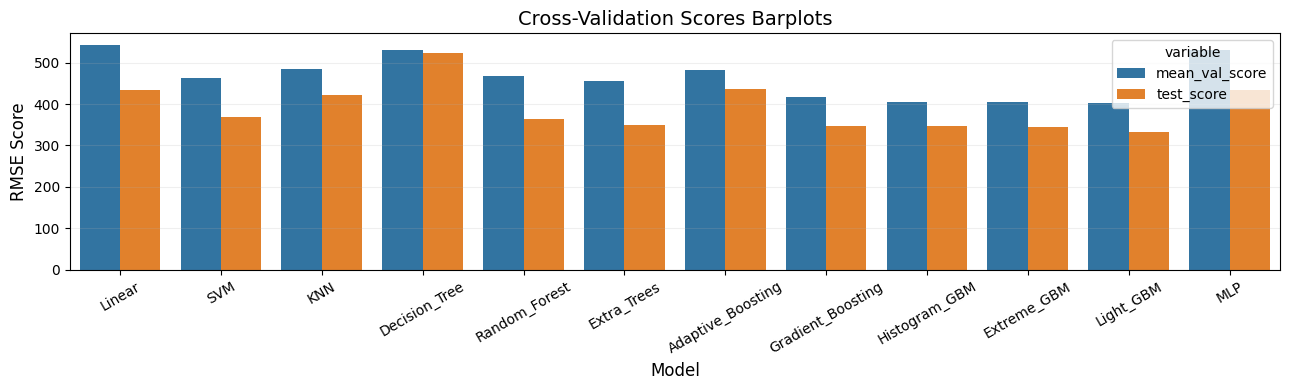

In [90]:
# plot the barplot to compare the values of the cv scores
fig, ax = plt.subplots(figsize=(13, 4))

sns.barplot(data=cv_hp_scrs, x='index', y='value', hue='variable')
ax.set_xlabel('Model', size=12)
ax.set_ylabel('RMSE Score', size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation='30')
ax.set_title('Cross-Validation Scores Barplots', size=14)
ax.grid(axis='y', alpha=0.2)
plt.tight_layout()

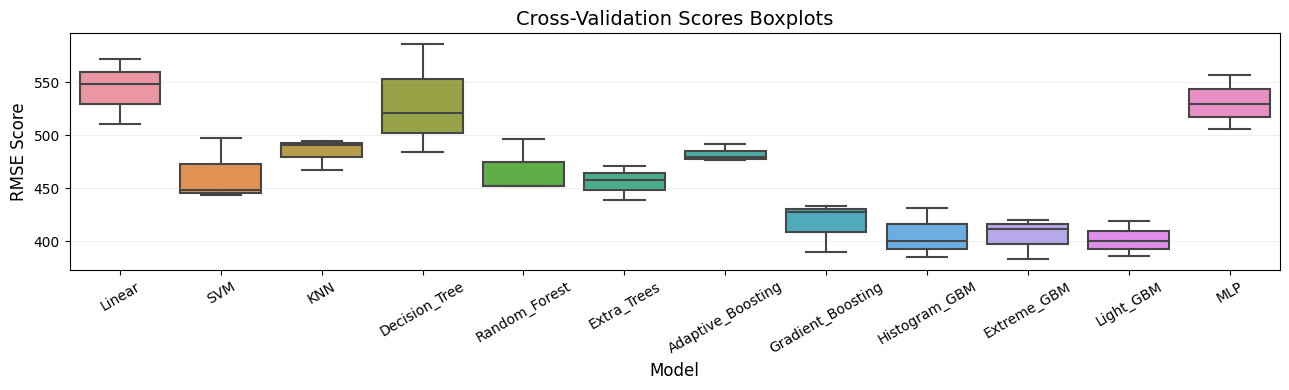

In [91]:
# plot the boxplot to compare the spread and centers of the cv scores
fig, ax = plt.subplots(figsize=(13, 4))

sns.boxplot(data=cv_scrs_df.iloc[:, :3].T)
ax.set_xlabel('Model', size=12)
ax.set_ylabel('RMSE Score', size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation='30')
ax.set_title('Cross-Validation Scores Boxplots', size=14)
ax.grid(axis='y', alpha=0.2)
plt.tight_layout()

In [92]:
# create a function for generating all scores for each method
def all_scores(y_test, y_pred, estimator_names):
    # y_test: test targets
    # y_pred: predicted targets
    # estimator_names: list of estimators
    
    scrs = [[] for i in range(4)]
    
    scrs_names = ['RMSE', 'MAPE', 'R-Squared', 'R']
    
    for est in estimator_names:
        scrs[0].append(mean_squared_error(y_test, y_pred[est], squared=False))
        scrs[1].append(mean_absolute_percentage_error(y_test, y_pred[est])*100)
        scrs[2].append(r2_score(y_test, y_pred[est]))
        scrs[3].append(pd.concat([y_test, y_pred[est]], axis=1).corr(method='spearman').values[0, 1])
        
    scrs_df = pd.DataFrame(np.asarray(scrs).T, index=estimator_names, columns=scrs_names)
    
    return scrs_df

In [93]:
# all scores
scrs_df = all_scores(y_test=y_test, y_pred=y_pred, estimator_names=estimator_names)
scrs_df.style.highlight_min(subset=['RMSE', 'MAPE'], color='lightblue').highlight_max(subset=['R-Squared', 'R'], color='pink')

##### 6.1.2.2 Empirical Correlation Models

In [94]:
# create a function for computing the empirical correlations
def bubble_point(data):
    # data: features dataframe
    
    # variables
    Rs = data['Rs']
    T = data['T']
    rho_o = data['rho_o']
    rho_oapi = (141.5/data['rho_o'])-131.5
    rho_g = data['rho_g']
    
    # failed correlations
    #((5.38088e-3)*(Rs**0.715082)*(rho_o**3.143700)*((T+459.67)**1.326570))/(rho_g**1.877840)
    #('Almehaideb', -620.592+(6.23087*Rs*(rho_oapi/(rho_g*((1.122018+((1.410e-6*Rs*T)/(rho_oapi**2)))**1.38559))))+(2.89868*T))
    #A = (((1.42828e-10*(T**2.844591797))-(6.74896e-4*(rho_oapi**1.225226436)))/
         #((0.033383304+(2*(rho_g**0.084226069)*(Rs**-0.272945957)))**2))
    #('Dindoruk_Christman', 1.86997927*((((Rs**31.221486524)*(10**A))/(rho_g**1.370508349))+0.011688308))
    #('Glaso_2', np.exp(1.7669+(1.7447*np.log(Gg))+(-0.30218*(np.log(Gg)**2))))
    #Gf = (rho_g**-1.378)*(Rs**1.053)*(10**((0.00069*T)-(0.0208*rho_oapi)))
    #('Farshad_3', np.exp(0.3058+(1.9013*np.log(Gf))+(-0.26*(np.log(Gf)**2)))) 
    
    # poor correlations
    #('Obomanu_Okpobori', ((Rs*(T**0.497)*(10**0.811))/(1.01136371*(rho_g**2.15)*(rho_oapi**1.27)))**1.0787)
    #('Al_Marhoun', 5.38088e-3*(Rs**0.715082)*(rho_g**-1.877840)*(rho_o**3.143700)*((T+460)**1.326570))
    #('Al_Marhoun_2', (5.38088e-3*(Rs**0.715082)*(rho_o**3.143700)*((T+459.67)**1.326570))/(rho_g**1.877840))
    #('Petrosky', (112.727*(((Rs**0.577421)/
                            #((rho_g**0.8439)*
                             #(10**((7.916e-4*(rho_oapi**1.5410))-(4.561e-5*(T**1.3911))))))-12.340)))
    #('Farshad_2', 33.22*((Rs/rho_g)**0.8283)*(10**((0.000037*T)-(0.0142*rho_oapi))))
    #('Levitan_Murtha', 14.7*((Rs/rho_g)**0.85)*((rho_o**5)*(((T+459.67)/519.67)**1.5)))
    #('Nikpoor_Khanamiri', 14.7*((Rs/rho_g)**0.85)*((rho_o**5)*(((T+459.67)/519.67)**1.5)))
    
    # constants
    Mo = 6084/(rho_oapi-5.9)
    yg = (Mo*Rs)/((Mo*Rs)+(132755*rho_o))
    Pf = 0.046+(2.273*yg)+(7.522*(yg**3))
    
    Gg = ((Rs/rho_g)**0.816)*(T**0.172)*(rho_oapi**-0.989)
    Ff = 10**((7.97e-3*rho_oapi)-(3.35e-4*T))
    
    # equations
    correlation = [('Standing', 18.2*((((Rs/rho_g)**0.83)*10**((0.00091*T)-(0.0125*rho_oapi)))-1.4)), 
                   ('Standing_2', 18*((Rs/rho_g)**0.83)*np.exp((2.09535e-3*T)+(-28.78231e-3*rho_oapi))), 
                   ('Elam', ((Rs**0.702)/(rho_g**0.514))*np.exp((0.00348*T)-(0.0282*rho_oapi)+3.58)), 
                   ('Lasater', Pf*((T+459.6)/rho_g)), 
                   ('Glaso', np.exp(4.06844+(1.7447*np.log(Gg))+(-0.13124*(np.log(Gg)**2)))), 
                   ('Owolabi', -987.56359+(179.58816*(((Rs/rho_g)**0.48088266)*((T**0.093538150)/(rho_oapi**0.16648326))))), 
                   ('Dokla_Osman', 0.836386e4*(Rs**0.724047)*(rho_g**-1.01049)*(rho_o**0.107991)*((T+460)**-0.952584)), 
                   ('Dokla_Osman_2', (8363.86*(Rs**0.724047)*(rho_o**0.107991))/((rho_g**1.01049)*((T+459.67)**0.952584))), 
                   ('Farshad', (64.14*(((Rs**0.6343)/((rho_g**1.15036)*(Ff)))-7.2818))), 
                   ('Macary', 204.257*np.exp((7.7e-4*T)-(9.7e-3*rho_oapi)-(0.4003*rho_g))*((Rs**0.51)-4.7927)), 
                   ('Khairy', 49.3647*(((Rs**0.5774)*(T**0.6641))/((rho_g**1.4676)*(rho_oapi**1.0305)))), 
                   ('Al_Shammasi', ((rho_o**5.527215)*((rho_g*Rs*(T+459.67))**0.783716))/np.exp(1.841408*rho_o*rho_g))]
    
    Pb = pd.DataFrame([], index=data.index)
    
    idx = np.where(rho_oapi>30)[0]
    
    for (corr, eqn) in correlation:
        if corr == 'Vasquez_Beggs':
            Pb[corr] = 20.7880*((Rs/rho_g)**0.9143)*np.exp((-23.5202*rho_oapi)/(460+T))
            Pb[corr][idx] = 29.7818*((Rs[idx]/rho_g[idx])**0.8425)*np.exp((-20.1609*rho_oapi[idx])/(460+T[idx]))
        else:
            Pb[corr] = eqn

    return Pb

In [95]:
# compute the empirical correlations
Pb = bubble_point(data=data.iloc[:, -4:])

In [96]:
Pb.head()

Standing   Standing_2         Elam      Lasater        Glaso  \
0  2701.769697  2697.279113  2750.212277  2469.329679  3576.888949   
1  2848.094941  2841.996313  2895.494246  2581.796993  3714.173398   
2  3095.747436  3086.927267  3053.770232  2818.733491  3962.342382   
3  3274.206258  3263.424943  3263.773154  2956.169722  4185.488425   
4  3649.228809  3634.326234  3584.824110  3263.825086  4574.836976   

       Owolabi  Dokla_Osman  Dokla_Osman_2      Farshad       Macary  \
0  2718.090581  2077.208184    2078.272221  3028.567478  2294.169760   
1  2831.113099  2154.916462    2156.011383  3160.276364  2391.365116   
2  3030.939940  2393.959239    2395.171700  3595.439742  2465.496897   
3  3150.378492  2424.575747    2425.803714  3560.282266  2666.103949   
4  3417.475669  2656.116546    2657.457460  3900.972595  2897.050043   

        Khairy  Al_Shammasi  
0  3574.868710  2510.834542  
1  3723.066573  2626.986436  
2  4261.201557  2696.609945  
3  4101.564449  2988.219571  
4  4423.074787  3302.226505

In [97]:
# obtain all scores for each correlation
y_corr = Pb.iloc[y_test.index, :]
correlation_names = Pb.columns
scrs_corr_df = all_scores(y_test=y_test, y_pred=y_corr, estimator_names=correlation_names)
scrs_corr_df.style.highlight_min(subset=['RMSE', 'MAPE'], color='lightblue').highlight_max(subset=['R-Squared', 'R'], color='pink')

#### 6.1.3 Validation Curves

##### 6.1.3.1 Learning Curve

In [98]:
# create a function for plotting learning curves
def validation_curve(est_fit, X_train, y_train):
    # est_fit: fitted estimators to be examined 
    # X_train: training features
    # y_train: training target
    
    train_sizes = [i for i in range(len(est_fit))] 
    train_scores = [i for i in range(len(est_fit))] 
    val_scores = [i for i in range(len(est_fit))] 
    fit_times = [i for i in range(len(est_fit))] 
    score_times = [i for i in range(len(est_fit))]
    
    for i in range(len(est_fit)):

        (train_sizes[i], train_scores[i], val_scores[i], 
         fit_times[i], score_times[i]) = learning_curve(estimator=est_fit[i], X=X_train, y=y_train, 
                                                        train_sizes=[0.25, 0.50, 0.75, 1.0], cv=3, scoring='r2', 
                                                        exploit_incremental_learning=False, verbose=0, shuffle=False, 
                                                        random_state=1234, error_score=np.nan, 
                                                        return_times=True, fit_params=None)

    train_scores_mean = [np.mean(est, axis=1) for est in train_scores]
    val_scores_mean = [np.mean(est, axis=1) for est in val_scores]
    fit_times_mean = [np.mean(est, axis=1) for est in fit_times]
    score_times_mean = [np.mean(est, axis=1) for est in score_times]

    train_scores_mean_df = pd.DataFrame(np.array(train_scores_mean).T, index=train_sizes[0], columns=estimator_names)
    val_scores_mean_df = pd.DataFrame(np.array(val_scores_mean).T, index=train_sizes[0], columns=estimator_names)
    fit_times_mean_df = pd.DataFrame(np.array(fit_times_mean).T, index=train_sizes[0], columns=estimator_names)
    score_times_mean_df = pd.DataFrame(np.array(score_times_mean).T, index=train_sizes[0], columns=estimator_names)

    train_scores_std = [np.std(est, axis=1) for est in train_scores]
    val_scores_std = [np.std(est, axis=1) for est in val_scores]
    fit_times_std = [np.std(est, axis=1) for est in fit_times]
    score_times_std = [np.std(est, axis=1) for est in score_times]

    train_scores_std_df = pd.DataFrame(np.array(train_scores_std).T, index=train_sizes[0], columns=estimator_names)
    val_scores_std_df = pd.DataFrame(np.array(val_scores_std).T, index=train_sizes[0], columns=estimator_names)
    fit_times_std_df = pd.DataFrame(np.array(fit_times_std).T, index=train_sizes[0], columns=estimator_names)
    score_times_std_df = pd.DataFrame(np.array(score_times_std).T, index=train_sizes[0], columns=estimator_names)
        
    fig, axs = plt.subplots(nrows=len(est_fit), ncols=3, figsize=(13, 2.5*len(est_fit)))
    titles = ['Learning Curve', 'Scalability', 'Performance']
    for i in range(len(train_sizes)):
        for j in range(3):
            # learning curve
            if j == 0:
                axs[i,j].plot(train_sizes[i], train_scores_mean_df.iloc[:,i], label='Training Score', c='r', marker='o')
                axs[i,j].plot(train_sizes[i], val_scores_mean_df.iloc[:,i], label='Validation Score', c='g', marker='o')
                axs[i,j].fill_between(train_sizes[i], train_scores_mean_df.iloc[:,i] - train_scores_std_df.iloc[:,i], 
                                      train_scores_mean_df.iloc[:,i] + train_scores_std_df.iloc[:,i], alpha=0.1, color='r')
                axs[i,j].fill_between(train_sizes[i], val_scores_mean_df.iloc[:,i] - val_scores_std_df.iloc[:,i], 
                                      val_scores_mean_df.iloc[:,i] + val_scores_std_df.iloc[:,i], alpha=0.1, color='g')
                axs[i,j].set_ylim([-0.05,1.05])
                axs[i,j].set_xlabel('Training Samples')
            # scalability
            elif j == 1:
                axs[i,j].plot(train_sizes[i], fit_times_mean_df.iloc[:,i], label='Scalability', marker='o')
                axs[i,j].fill_between(train_sizes[i], fit_times_mean_df.iloc[:,i] - fit_times_std_df.iloc[:,i], 
                                      fit_times_mean_df.iloc[:,i] + fit_times_std_df.iloc[:,i], alpha=0.1)
                axs[i,j].set_xlabel('Training Samples')
            # performance
            elif j == 2:
                axs[i,j].plot(fit_times_mean_df.iloc[:,i], val_scores_mean_df.iloc[:,i], label='Performance', marker='o')
                axs[i,j].fill_between(fit_times_mean_df.iloc[:,i], val_scores_mean_df.iloc[:,i] - val_scores_std_df.iloc[:,i], 
                                      val_scores_mean_df.iloc[:,i] + val_scores_std_df.iloc[:,i], alpha=0.1)
                axs[i,j].set_ylim([-0.05,1.05])
                axs[i,j].set_xlabel('Fit Time')

            if j in [0,2]:
                axs[i,j].set_ylabel('R2 Score')
            elif j == 1:
                axs[i,j].set_ylabel('Fit Time')
            if i == 0:
                axs[i,j].set_title(titles[j], size=12)
            axs[i,j].grid(which='both', alpha=0.2)
        axs[i,0].text(0.5, 0.5, estimator_names[i], va='center', rotation='90', size=12)
        axs[i,0].legend()

    plt.suptitle(y=1.001, t='Models Learning Curves', size=18)        
    plt.tight_layout()

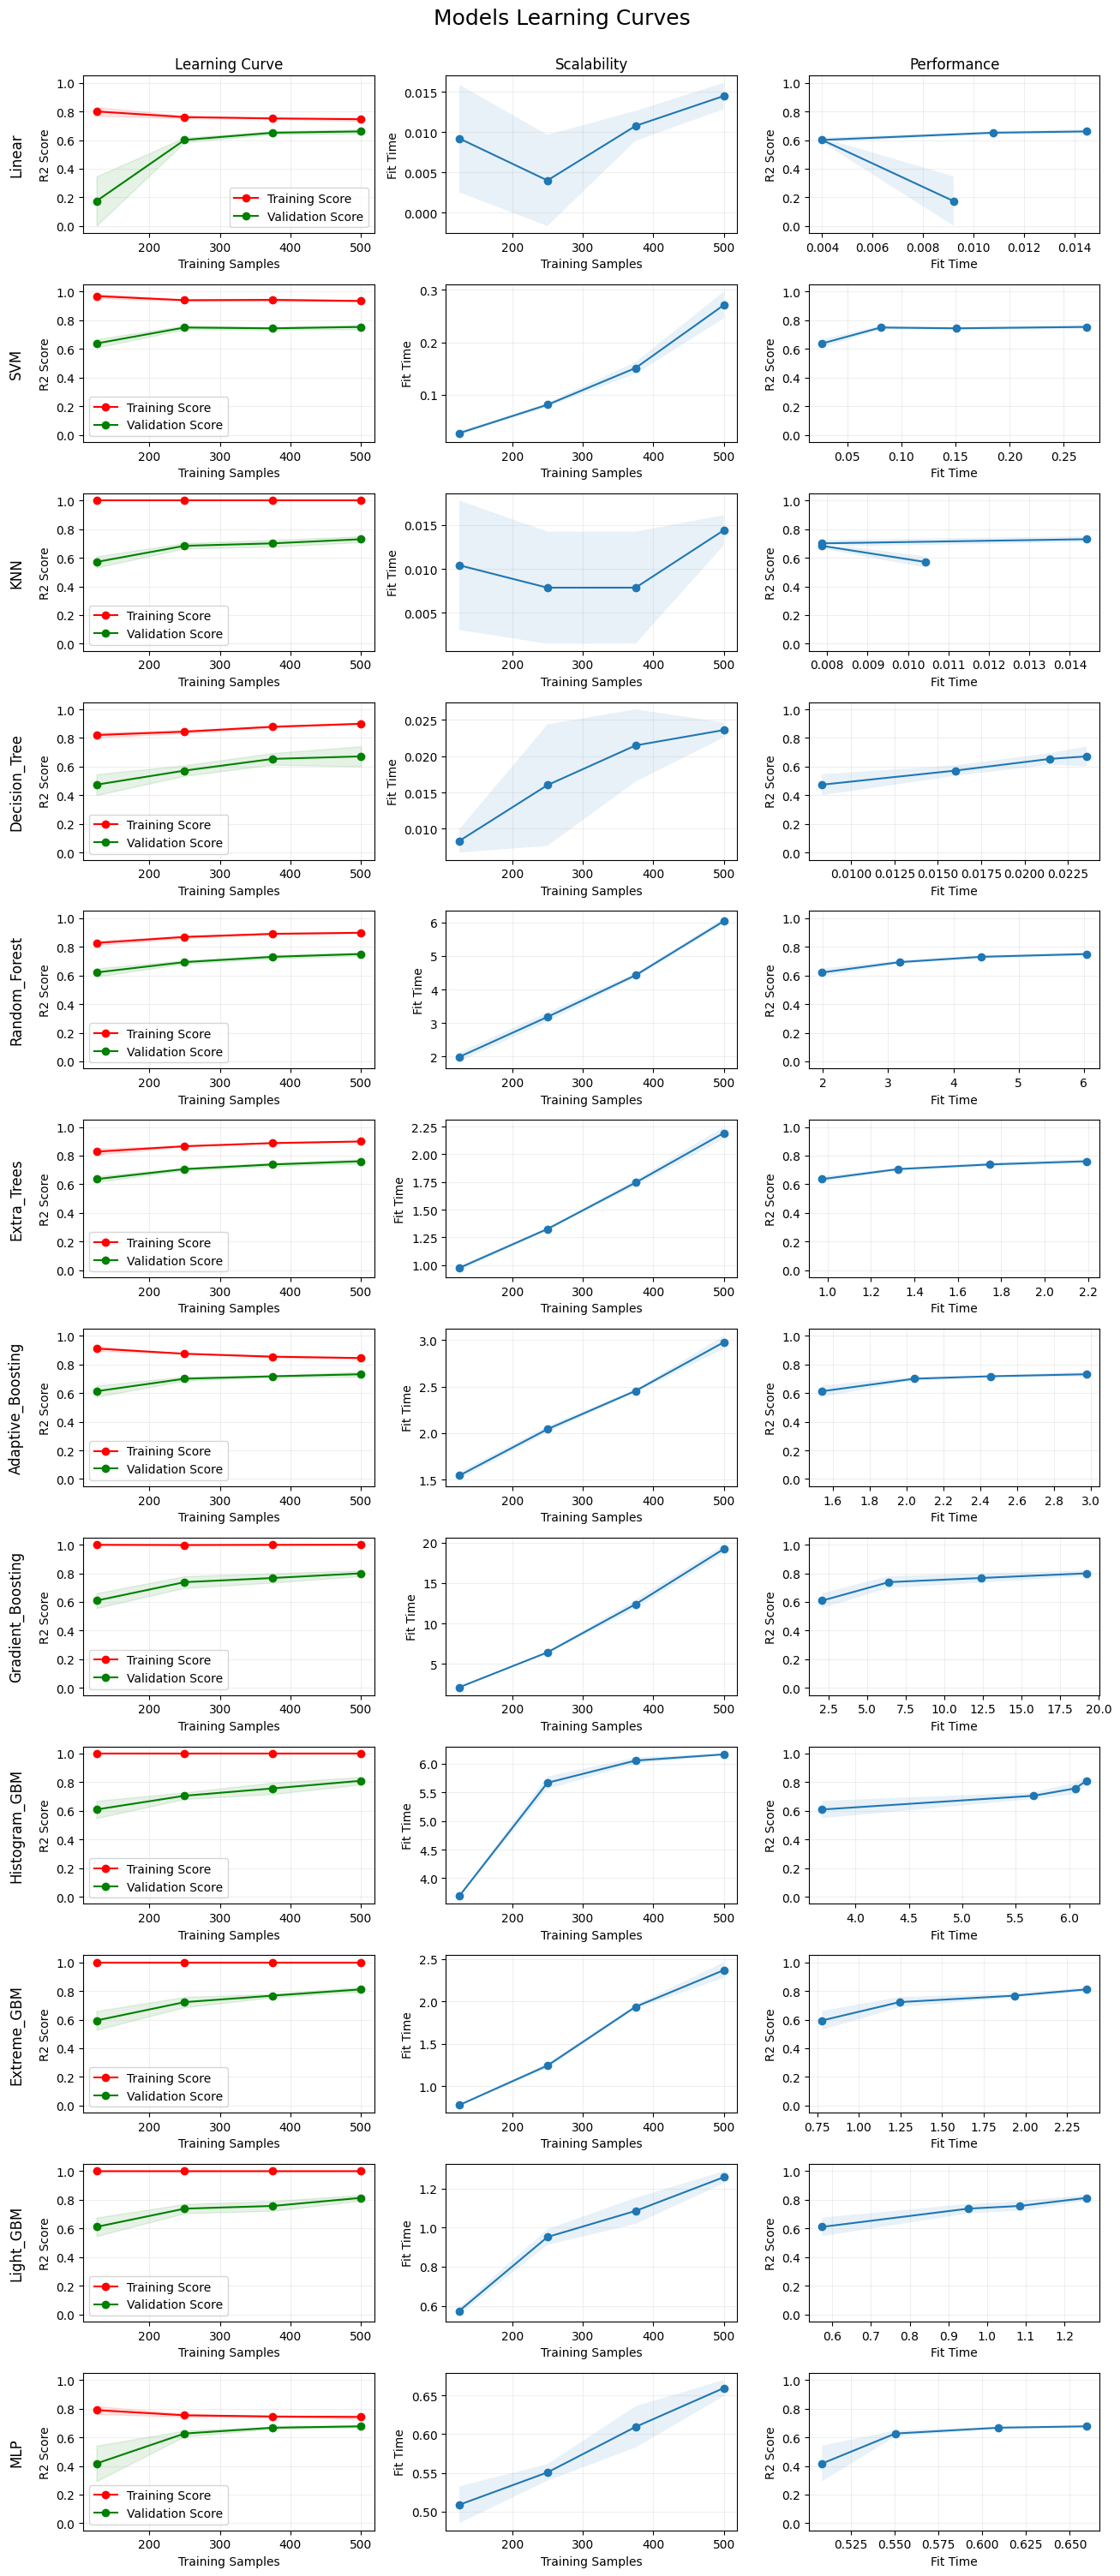

In [99]:
# learning curve
validation_curve(est_fit=best_fit, X_train=X_train, y_train=y_train)

#### 6.1.4 Voting Ensemble

In [100]:
from sklearn.ensemble import VotingRegressor

In [101]:
# obtain the estimators for voting
vote_est = [[] for est in range(len(estimator_names))]
for i in range(len(estimator_names)):
    for j in range(i+1):
        vote_est[i].append(best_fit[int(cv_scrs_df.iloc[:, [-1]].reset_index().nsmallest(len(cv_scrs_df.index), 
                                                                                         ['test_score']).index[j])].steps[0])
vote_est

[[('lgbmregressor',
   LGBMRegressor(learning_rate=0.06512333152681254, max_depth=311,
                 min_child_samples=5, min_child_weight=0.7470105597121632,
                 n_estimators=358, random_state=1234))],
 [('lgbmregressor',
   LGBMRegressor(learning_rate=0.06512333152681254, max_depth=311,
                 min_child_samples=5, min_child_weight=0.7470105597121632,
                 n_estimators=358, random_state=1234)),
  ('xgbregressor',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.1327108893428457,
                max_delta_step=0, max_depth=86,
                min_child_weight=0.25290641328305336, missing=nan,
                monotone_constraints='()', n_estimators=196, n_jobs=8,
                num_parallel_tree=1, predictor='auto', random_state=1

In [102]:
# voting model training
vote_fit = []
for i, est in enumerate(vote_est):
    print()
    print('*******{} estimator voting ensemble******* \n'.format(i+1))
    start_time = time.time()
    vote_fit.append(VotingRegressor(estimators=est, verbose=2).fit(X_train, y_train))
    
    end_time = time.time()
    print(f'Training time: {end_time - start_time} seconds')


*******1 estimator voting ensemble******* 

[Voting] ............ (1 of 1) Processing lgbmregressor, total=   2.2s
Training time: 2.212169885635376 seconds

*******2 estimator voting ensemble******* 

[Voting] ............ (1 of 2) Processing lgbmregressor, total=   1.5s
[Voting] ............. (2 of 2) Processing xgbregressor, total=   3.8s
Training time: 5.22089958190918 seconds

*******3 estimator voting ensemble******* 

[Voting] ............ (1 of 3) Processing lgbmregressor, total=   1.5s
[Voting] ............. (2 of 3) Processing xgbregressor, total=   3.8s
[Voting]  (3 of 3) Processing gradientboostingregressor, total=  32.2s
Training time: 37.493452310562134 seconds

*******4 estimator voting ensemble******* 

[Voting] ............ (1 of 4) Processing lgbmregressor, total=   1.4s
[Voting] ............. (2 of 4) Processing xgbregressor, total=   3.7s
[Voting]  (3 of 4) Processing gradientboostingregressor, total=  32.0s
[Voting]  (4 of 4) Processing histgradientboostingregresso

In [103]:
# voting model prediction
vote_names = ['{}_Vote'.format(i+1) for i in range(len(estimator_names))]
y_vote = test_prediction(X_test=X_test, est_fit=vote_fit, estimator_names=vote_names)


*******1_Vote estimator prediction******* 

Predicting time: 0.0 seconds

*******2_Vote estimator prediction******* 

Predicting time: 0.03124380111694336 seconds

*******3_Vote estimator prediction******* 

Predicting time: 0.06664562225341797 seconds

*******4_Vote estimator prediction******* 

Predicting time: 0.09400224685668945 seconds

*******5_Vote estimator prediction******* 

Predicting time: 0.2318129539489746 seconds

*******6_Vote estimator prediction******* 

Predicting time: 0.3432493209838867 seconds

*******7_Vote estimator prediction******* 

Predicting time: 0.388303279876709 seconds

*******8_Vote estimator prediction******* 

Predicting time: 0.4099090099334717 seconds

*******9_Vote estimator prediction******* 

Predicting time: 0.4260220527648926 seconds

*******10_Vote estimator prediction******* 

Predicting time: 0.39581823348999023 seconds

*******11_Vote estimator prediction******* 

Predicting time: 0.5335249900817871 seconds

*******12_Vote estimator predi

In [104]:
# voting scores
scrs_vote_df = all_scores(y_test=y_test, y_pred=y_vote, estimator_names=vote_names)
scrs_vote_df.style.highlight_min(subset=['RMSE', 'MAPE'], color='lightblue').highlight_max(subset=['R-Squared', 'R'], color='pink')

#### 6.1.5 Stacking Ensemble

In [105]:
from sklearn.ensemble import StackingRegressor

In [106]:
# obtain the estimators for stacking
stack_est = []
for i in range(6):
    stack_est.append(best_fit[int(cv_scrs_df.iloc[:, [-1]].reset_index().nsmallest(len(cv_scrs_df.index), 
                                                                                   ['test_score']).index[i])].steps[0])
stack_est

[('lgbmregressor',
  LGBMRegressor(learning_rate=0.06512333152681254, max_depth=311,
                min_child_samples=5, min_child_weight=0.7470105597121632,
                n_estimators=358, random_state=1234)),
 ('xgbregressor',
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.1327108893428457,
               max_delta_step=0, max_depth=86,
               min_child_weight=0.25290641328305336, missing=nan,
               monotone_constraints='()', n_estimators=196, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=1234,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 ('gradientboostingregressor',
  GradientBoostingRegressor(learning_rate=0.

In [107]:
# stacking model training
stack_final_est = [LinearRegression(), SVR(C=10000), 
                   KNeighborsRegressor(), DecisionTreeRegressor(random_state=1234), 
                   RandomForestRegressor(random_state=1234), ExtraTreesRegressor(random_state=1234), 
                   AdaBoostRegressor(random_state=1234), GradientBoostingRegressor(random_state=1234), 
                   HGBRegressor(random_state=1234), XGBRegressor(random_state=1234), 
                   LGBMRegressor(random_state=1234), MLPRegressor(hidden_layer_sizes=(200,), 
                                                                  activation='identity', 
                                                                  solver='lbfgs', 
                                                                  alpha=0.0001, 
                                                                  max_iter=70, 
                                                                  random_state=1234)]
stack_fit = []
for i, est in enumerate(stack_final_est):
    print()
    print('*******{} estimator stacking ensemble******* \n'.format(estimator_names[i]))
    start_time = time.time()
    stack_fit.append(StackingRegressor(estimators=stack_est, final_estimator=est, 
                                       cv=3, passthrough=True, verbose=2).fit(X_train, y_train))
    
    end_time = time.time()
    print(f'Training time: {end_time - start_time} seconds')


*******Linear estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 169.18094754219055 seconds

*******SVM estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 169.75139021873474 seconds

*******KNN estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 170.17867064476013 seconds

*******Decision_Tree estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 169.96719360351562 seconds

*******Random_Forest estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 172.84953236579895 seconds

*******Extra_Trees estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   56.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 169.54186463356018 seconds

*******Adaptive_Boosting estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 170.4682652950287 seconds

*******Gradient_Boosting estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 169.88362097740173 seconds

*******Histogram_GBM estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 170.9281256198883 seconds

*******Extreme_GBM estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 170.64628839492798 seconds

*******Light_GBM estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 169.46694469451904 seconds

*******MLP estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 170.16475653648376 seconds


In [108]:
# stacking model prediction
stack_names = ['{}_Stack'.format(i) for i in estimator_names]
y_stack = test_prediction(X_test=X_test, est_fit=stack_fit, estimator_names=stack_names)


*******Linear_Stack estimator prediction******* 

Predicting time: 0.3356807231903076 seconds

*******SVM_Stack estimator prediction******* 

Predicting time: 0.39012861251831055 seconds

*******KNN_Stack estimator prediction******* 

Predicting time: 0.35358142852783203 seconds

*******Decision_Tree_Stack estimator prediction******* 

Predicting time: 0.34818029403686523 seconds

*******Random_Forest_Stack estimator prediction******* 

Predicting time: 0.387554407119751 seconds

*******Extra_Trees_Stack estimator prediction******* 

Predicting time: 0.41404294967651367 seconds

*******Adaptive_Boosting_Stack estimator prediction******* 

Predicting time: 0.34638190269470215 seconds

*******Gradient_Boosting_Stack estimator prediction******* 

Predicting time: 0.3409295082092285 seconds

*******Histogram_GBM_Stack estimator prediction******* 

Predicting time: 0.3495810031890869 seconds

*******Extreme_GBM_Stack estimator prediction******* 

Predicting time: 0.3425431251525879 seconds

In [109]:
# stacking scores
scrs_stack_df = all_scores(y_test=y_test, y_pred=y_stack, estimator_names=stack_names)
scrs_stack_df.style.highlight_min(subset=['RMSE', 'MAPE'], color='lightblue').highlight_max(subset=['R-Squared', 'R'], color='pink')

### 6.2 Model Inspection and Visualization

In [110]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from matplotlib.ticker import MaxNLocator

#### 6.2.1 Inspection Plots

In [111]:
# plot the density plots to compare the distribution and trend of the predicted data to the true data
def density_plots(y_test, y_pred, estimator_names, method):
    fig, axs = plt.subplots(figsize=(13, 7), nrows=3, ncols=4, sharex=True, sharey=True)

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):    
        sns.kdeplot(data=y_test, x='Pb', label='True', lw=2, ax=ax)
        sns.kdeplot(data=y_pred.iloc[:, [i]], x=est, label='Predicted', lw=2, ax=ax)

        #if i not in range(len(estimator_names)):
            #ax.set_axis_off()

        ax.set(xlabel=None)
        ax.set(ylabel='Density')
        ax.set_title(est, size=12)
        ax.grid(alpha=0.2)
        ax.legend(fontsize='small')
        ax.set_ylim([0, 0.0013])

    #axs[2,3].set_axis_off()

    plt.suptitle(x=0.52, y=1.001, t=method + ' Density Plots', ha='center', size=18)
    plt.tight_layout()

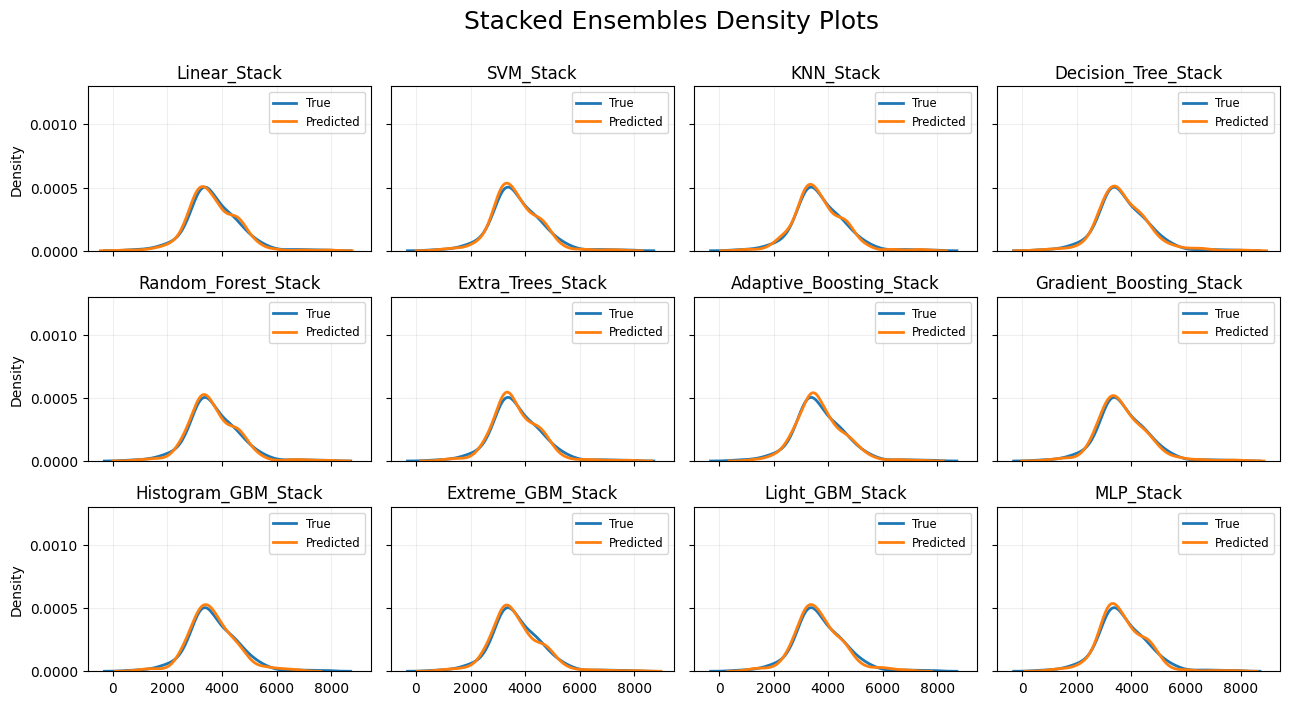

In [112]:
density_plots(y_test=y_test, y_pred=y_stack, estimator_names=stack_names, method='Stacked Ensembles')

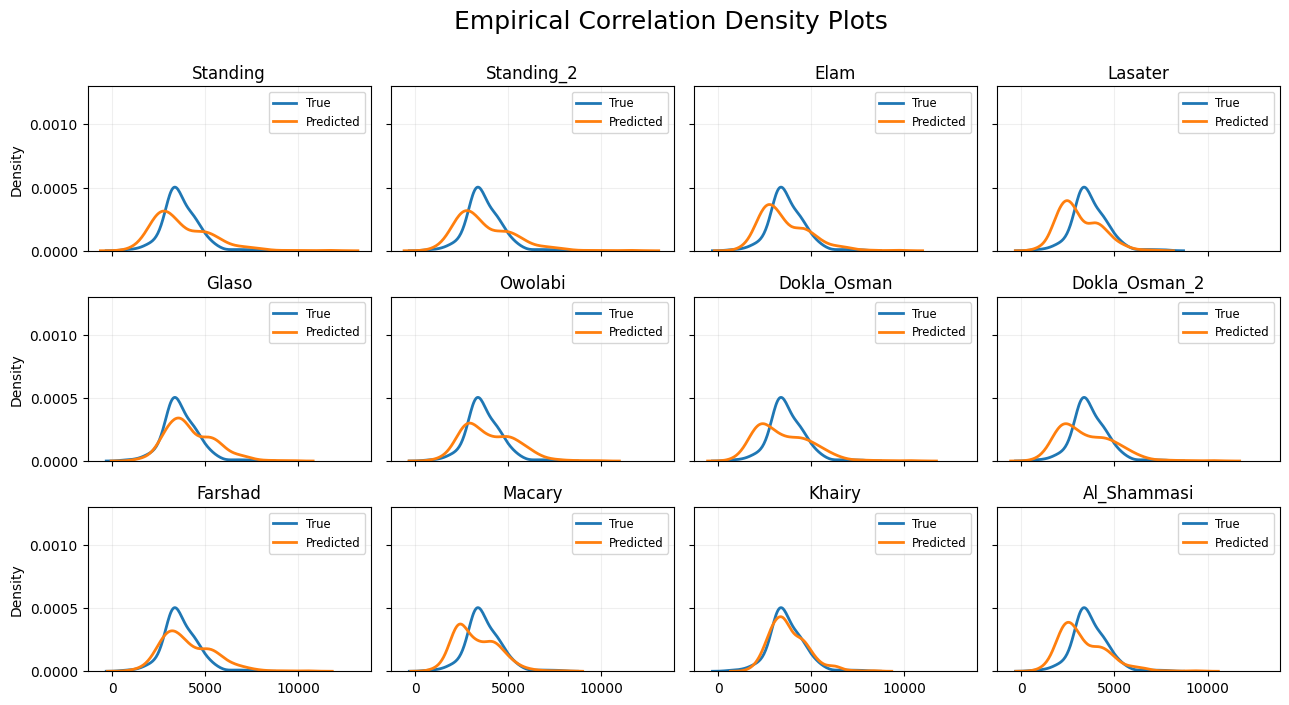

In [113]:
density_plots(y_test=y_test, y_pred=y_corr, estimator_names=correlation_names, method='Empirical Correlation')

In [114]:
# plot the correlation plots to inspect the relationship and correlation between the predicted data and the true data
def correlation_plots(y_test, y_pred, estimator_names, method):
    # method: machine learning or empirical correlation in string format
    
    fig, axs = plt.subplots(figsize=(13, 10), nrows=3, ncols=4, sharex=True, sharey=True)

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):    
        sns.scatterplot(x=y_test.Pb, y=y_pred.iloc[:, i], ax=ax)

        #if i not in range(len(estimator_names)):
            #ax.set_axis_off()

        ax.plot([0, 1], [0, 1], transform=ax.transAxes, c='k', lw=1.5)
        ax.set(xlabel='True')
        ax.set(ylabel='Pred')
        ax.set_title(est, size=12)
        ax.grid(alpha=0.2)
        ax.set_xlim([0, 8000])
        ax.set_ylim([0, 8000])
        ax.set_aspect(1.0 / ax.get_data_ratio(), adjustable='box')
        ax.xaxis.set_major_locator(MaxNLocator(4)) 
        ax.yaxis.set_major_locator(MaxNLocator(4)) 

    #axs[2,3].set_axis_off()

    plt.suptitle(x=0.52, y=1.001, t=method + ' Cross Plots', size=18)
    plt.tight_layout()

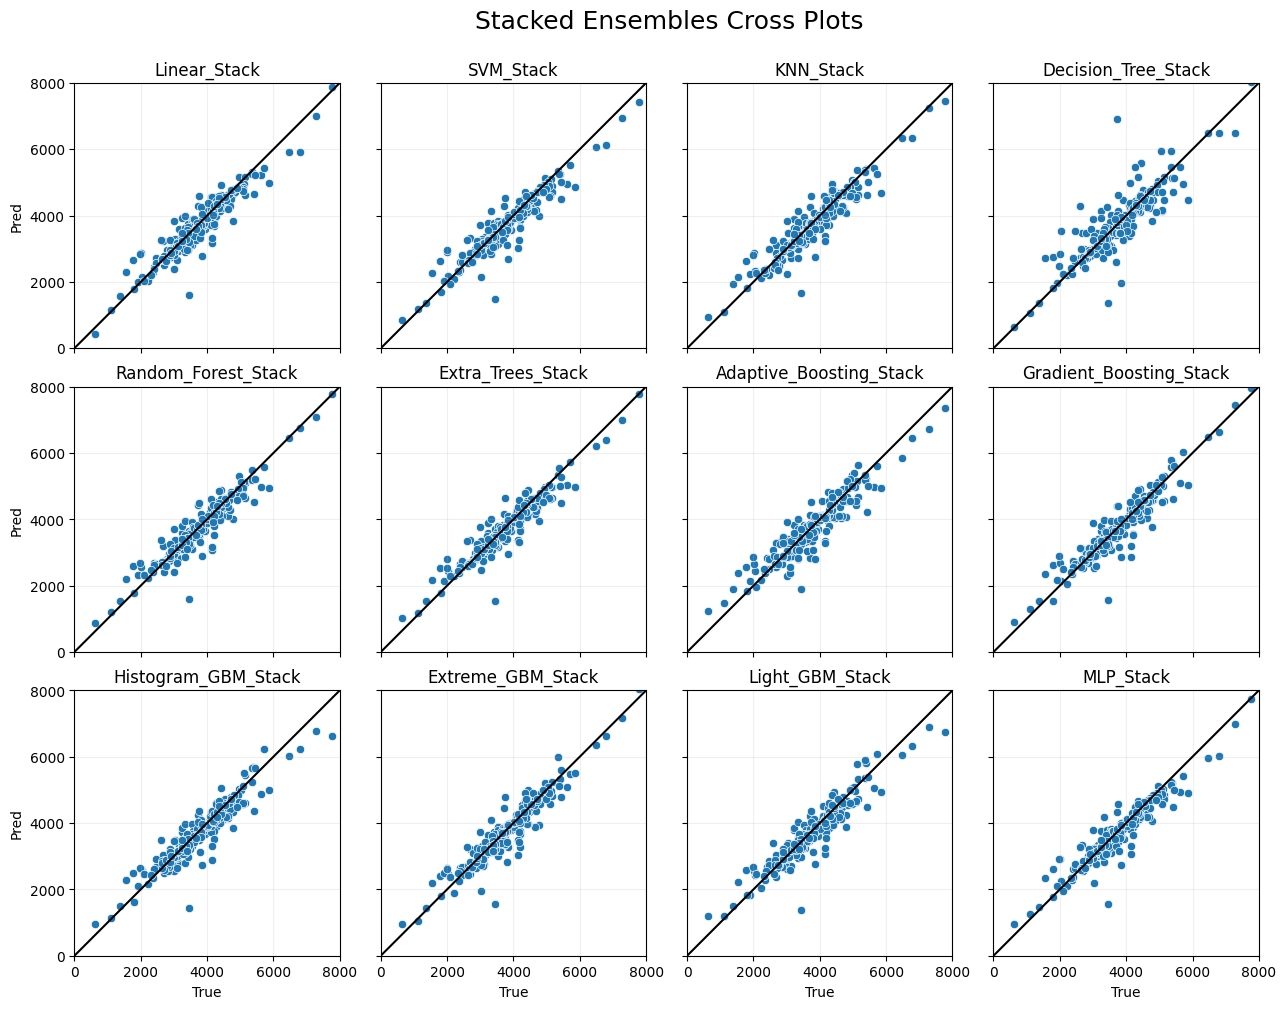

In [115]:
correlation_plots(y_test=y_test, y_pred=y_stack, estimator_names=stack_names, method='Stacked Ensembles')

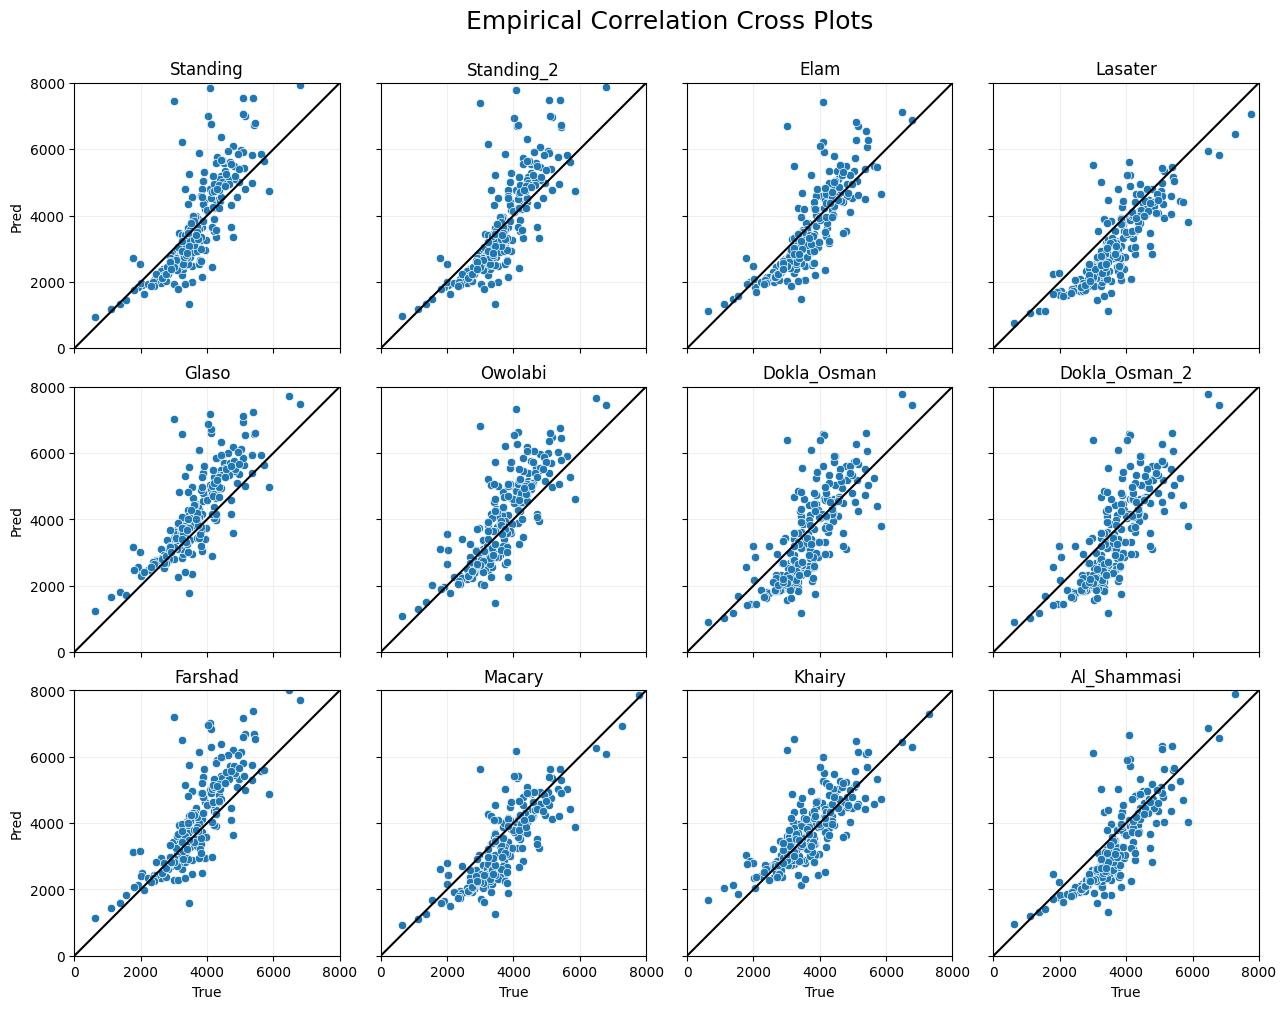

In [116]:
correlation_plots(y_test=y_test, y_pred=y_corr, estimator_names=correlation_names, method='Empirical Correlation')

In [117]:
# plot the residual plot to inspect the amount of deviation of the predicted data from the original data
def residual_plots(y_test, y_pred, estimator_names, method):
    # method: machine learning or empirical correlation in string format
    
    fig, axs = plt.subplots(figsize=(13, 7), ncols=y_pred.shape[1], sharex=True, sharey=True)

    y_res = y_pred.copy()
    y_res = y_res.sort_index()
    for est in y_res.columns.unique():
        y_res[est] = y_res[est] - y_test.sort_index()['Pb']

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):    
        sns.scatterplot(data=y_res[est], x=y_res[est].values, y=y_res[est].index, 
                        color='red', edgecolors=None, label='Residual', ax=ax)

        ax.set(xlabel=None)
        ax.set(ylabel='Index')
        ax.set_title(est, size=12, rotation='30')
        ax.grid(alpha=0.2)
        ax.legend(fontsize='small', loc='lower center')
        ax.set_xlim([-8000, 8000])
        ax.axvline(0, c='k', lw=1)
    
    plt.gca().invert_yaxis()
    plt.suptitle(x=0.52, y=1.001, t=method + ' Residual Plots', ha='center', size=18)
    plt.tight_layout()

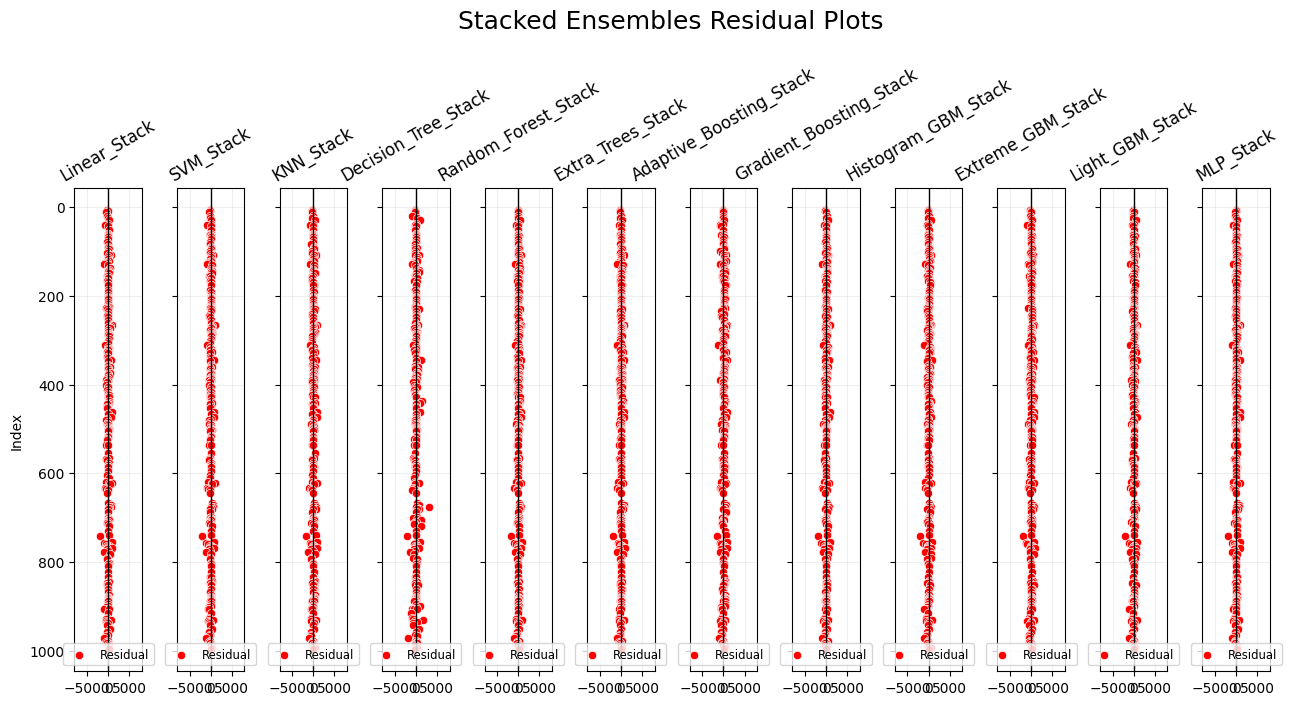

In [118]:
residual_plots(y_test=y_test, y_pred=y_stack, estimator_names=stack_names, method='Stacked Ensembles')

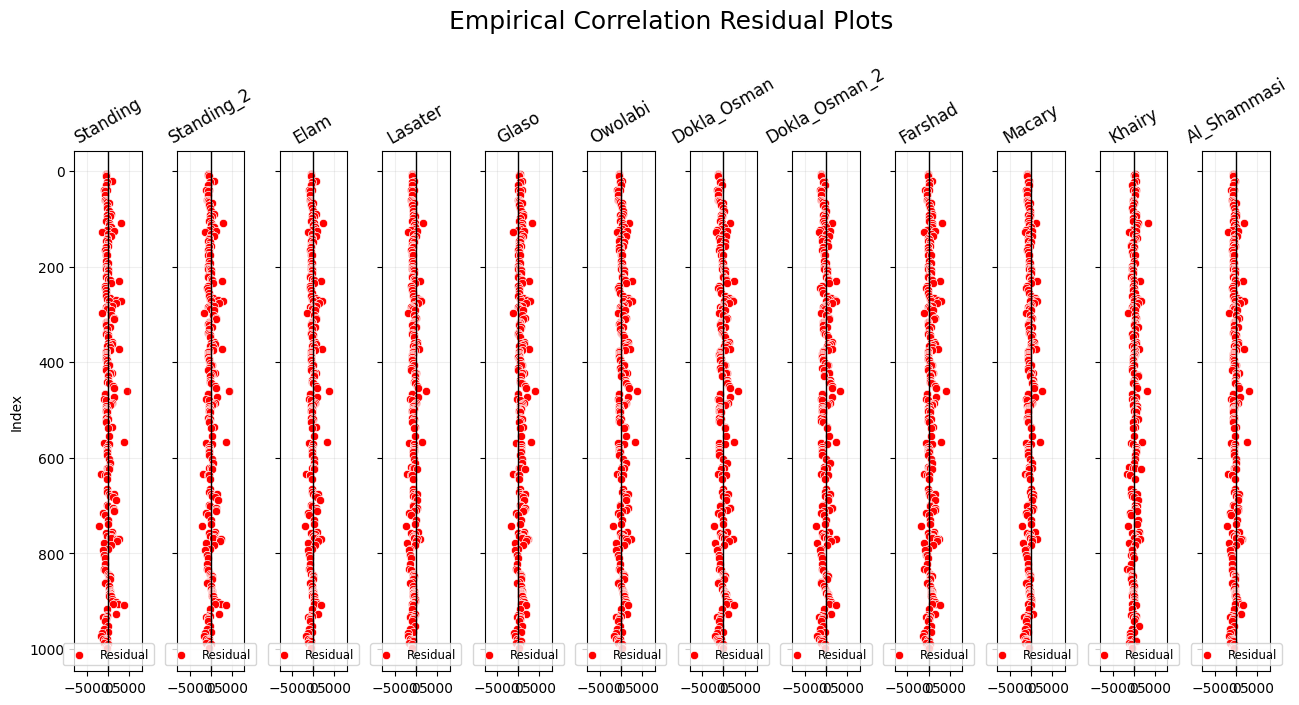

In [119]:
residual_plots(y_test=y_test, y_pred=y_corr, estimator_names=correlation_names, method='Empirical Correlation')

In [120]:
# plot the lineplot to inspect the amount of deviation of the predicted data from the original data
def line_plots(y_test, y_pred, estimator_names, method):
    fig, axs = plt.subplots(figsize=(13, 7), ncols=y_pred.shape[1], sharex=True, sharey=True)

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):              
        ax.plot(y_test.sort_index(), y_test.sort_index().index, label='True', lw=1.5)
        ax.plot(y_pred.sort_index()[est], y_pred.sort_index()[est].index, label='Predicted', lw=1.5)

        ax.set(xlabel=None)
        if i == 0:
            ax.set(ylabel='Index')
        else:
            ax.set(ylabel=None)
        ax.set_title(est, size=12, rotation='30')
        ax.grid(alpha=0.2)
        ax.legend(fontsize='small', loc='lower center')
        ax.set_xlim([0, 8000])
        ax.invert_yaxis()

    plt.gca().invert_yaxis()
    plt.suptitle(x=0.52, y=1.001, t=method + ' Prediction Plots', ha='center', size=18)
    plt.tight_layout()

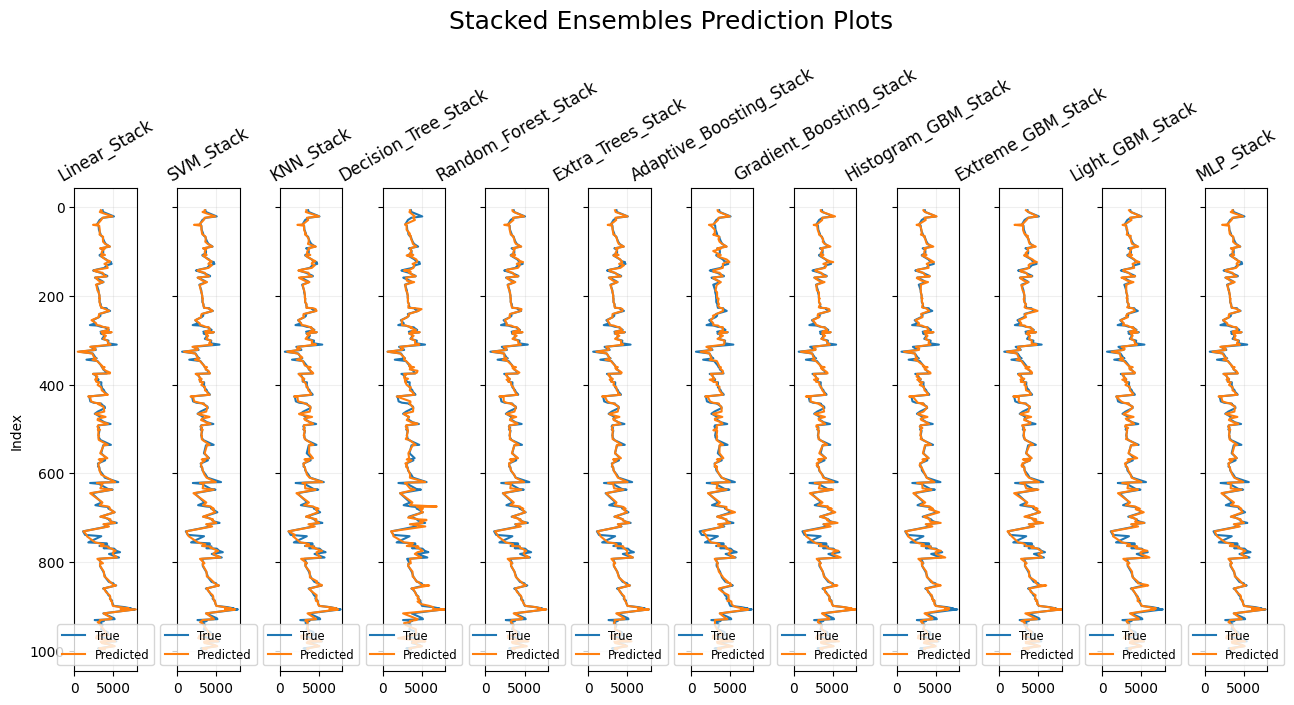

In [121]:
line_plots(y_test=y_test, y_pred=y_stack, estimator_names=stack_names, method='Stacked Ensembles')

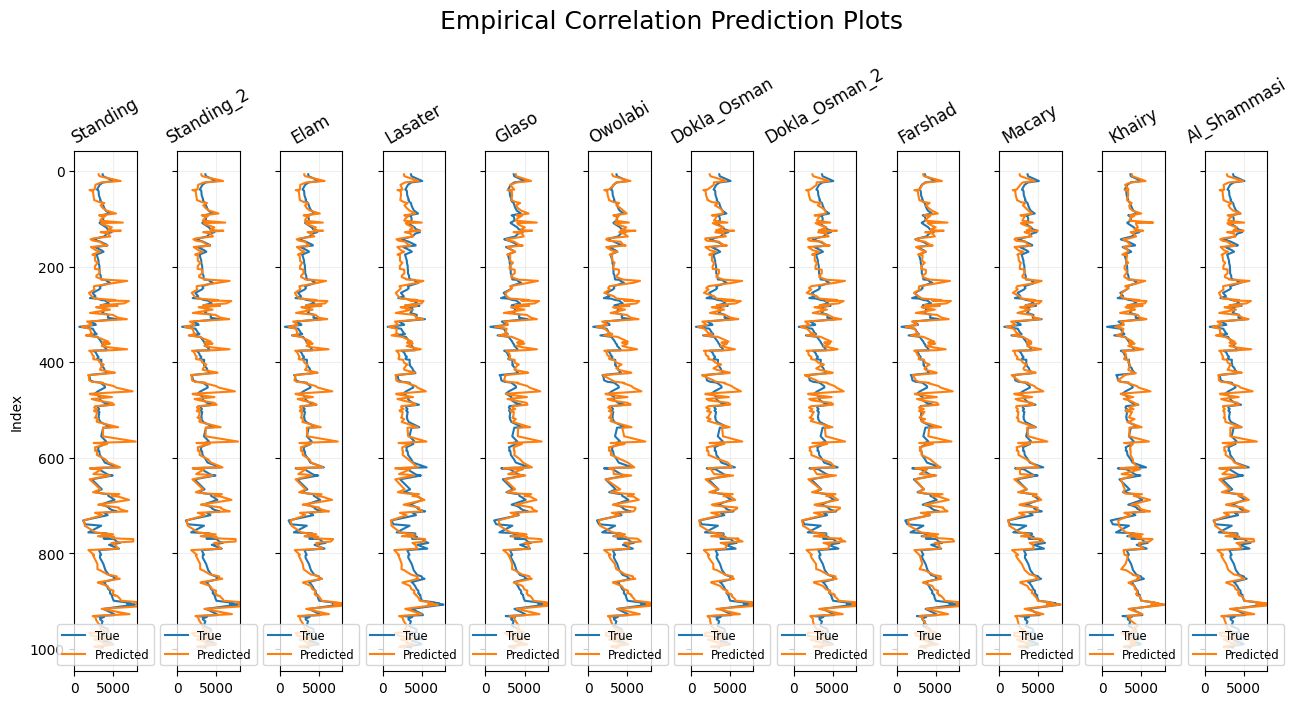

In [122]:
line_plots(y_test=y_test, y_pred=y_corr, estimator_names=correlation_names, method='Empirical Correlation')

#### 6.2.2 Feature Importance

##### 6.2.2.1 Permutation Feature Importance (PFI)

In [123]:
# create a function for obtaining the permutaion feature importance scores for each method
def pfi_scores(est_fit, X_test, y_test):
    # est_fit: fitted estimators to be examined
    # X_test: test features
    # y_test: test target
    
    model_pfi = [est for est in est_fit]

    for i, est in enumerate(estimator_names):
        print()
        print('*******{} estimator PFI******* \n'.format(estimator_names[i]))
        start_time = time.time()

        model_pfi[i] = permutation_importance(estimator=est_fit[i], X=X_test, y=y_test, scoring='neg_root_mean_squared_error', 
                                              n_repeats=5, random_state=1234, max_samples=1.0)

        end_time = time.time()
        print(f'Training time: {end_time - start_time} seconds')
        
    pfi_sorted_idx = [est for est in est_fit]
    pfi_scr_mean = [est for est in est_fit]
    pfi_scr_std = [est for est in est_fit]
    pfi_scr = [est for est in est_fit]

    pfi_scr_mean_df_lst = []
    pfi_scr_df_lst = []

    for i in range(len(model_pfi)):
        pfi_sorted_idx[i] = model_pfi[i].importances_mean.argsort()[::-1]
        pfi_scr_mean[i] = model_pfi[i].importances_mean[pfi_sorted_idx[i]]
        pfi_scr_std[i] = model_pfi[i].importances_std[pfi_sorted_idx[i]]
        pfi_scr[i] = model_pfi[i].importances[pfi_sorted_idx[i]].T

        pfi_scr_mean_df_lst.append(pd.DataFrame(pfi_scr_mean[i], 
                                                index=X_test.columns[pfi_sorted_idx[i]], 
                                                columns=[estimator_names[i]]).T)
        pfi_scr_df_lst.append(pd.DataFrame(pfi_scr[i], 
                                           columns=X_test.columns[pfi_sorted_idx[i]]))
        
    return pfi_scr_mean_df_lst, pfi_scr_std, pfi_scr_df_lst

In [124]:
# permutaion feature importance (PFI)
pfi_scr_mean_df_lst, pfi_scr_std, pfi_scr_df_lst = pfi_scores(est_fit=best_fit, X_test=X_test, y_test=y_test)


*******Linear estimator PFI******* 

Training time: 1.8441083431243896 seconds

*******SVM estimator PFI******* 

Training time: 15.8918936252594 seconds

*******KNN estimator PFI******* 

Training time: 5.69161057472229 seconds

*******Decision_Tree estimator PFI******* 

Training time: 1.7998461723327637 seconds

*******Random_Forest estimator PFI******* 

Training time: 28.966148614883423 seconds

*******Extra_Trees estimator PFI******* 

Training time: 27.940964221954346 seconds

*******Adaptive_Boosting estimator PFI******* 

Training time: 28.8151912689209 seconds

*******Gradient_Boosting estimator PFI******* 

Training time: 9.30278992652893 seconds

*******Histogram_GBM estimator PFI******* 

Training time: 8.211796522140503 seconds

*******Extreme_GBM estimator PFI******* 

Training time: 4.536175727844238 seconds

*******Light_GBM estimator PFI******* 

Training time: 3.9812874794006348 seconds

*******MLP estimator PFI******* 

Training time: 2.04658579826355 seconds


In [125]:
# create a function for plotting the barplots of the permutaion feature importance scores for each method
def pfi_barplot(pfi_scr_mean_df_lst, pfi_scr_std):
    # pfi_scr_mean_df_lst: mean scores
    # pfi_scr_std: standard deviations
    
    # plot the barplot to compare the mean importance of the features
    fig, axs = plt.subplots(figsize=(13, 3*len(pfi_scr_mean_df_lst)), nrows=len(pfi_scr_mean_df_lst), sharey=True)
    
    #colors = [cm.get_cmap('gist_ncar_r', len(estimator_names)+1)(n) for n in np.linspace(0,1,len(estimator_names)+1)][1:]
    colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
    
    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):
        sns.barplot(data=pfi_scr_mean_df_lst[i], yerr=pfi_scr_std[i], orient='v', color=colors[i], ax=ax)

        if i not in range(len(estimator_names)):
            ax.set_axis_off()
        ax.set(xlabel='Feature')
        ax.set(ylabel='Mean Importance')
        ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation='60')
        ax.set_yscale('log')
        ax.set_title(est, size=14)
        ax.grid(which='major', alpha=0.2)

    plt.suptitle(y=1.001, t='Permutation Feature Importance Barplots', size=18)
    plt.tight_layout()

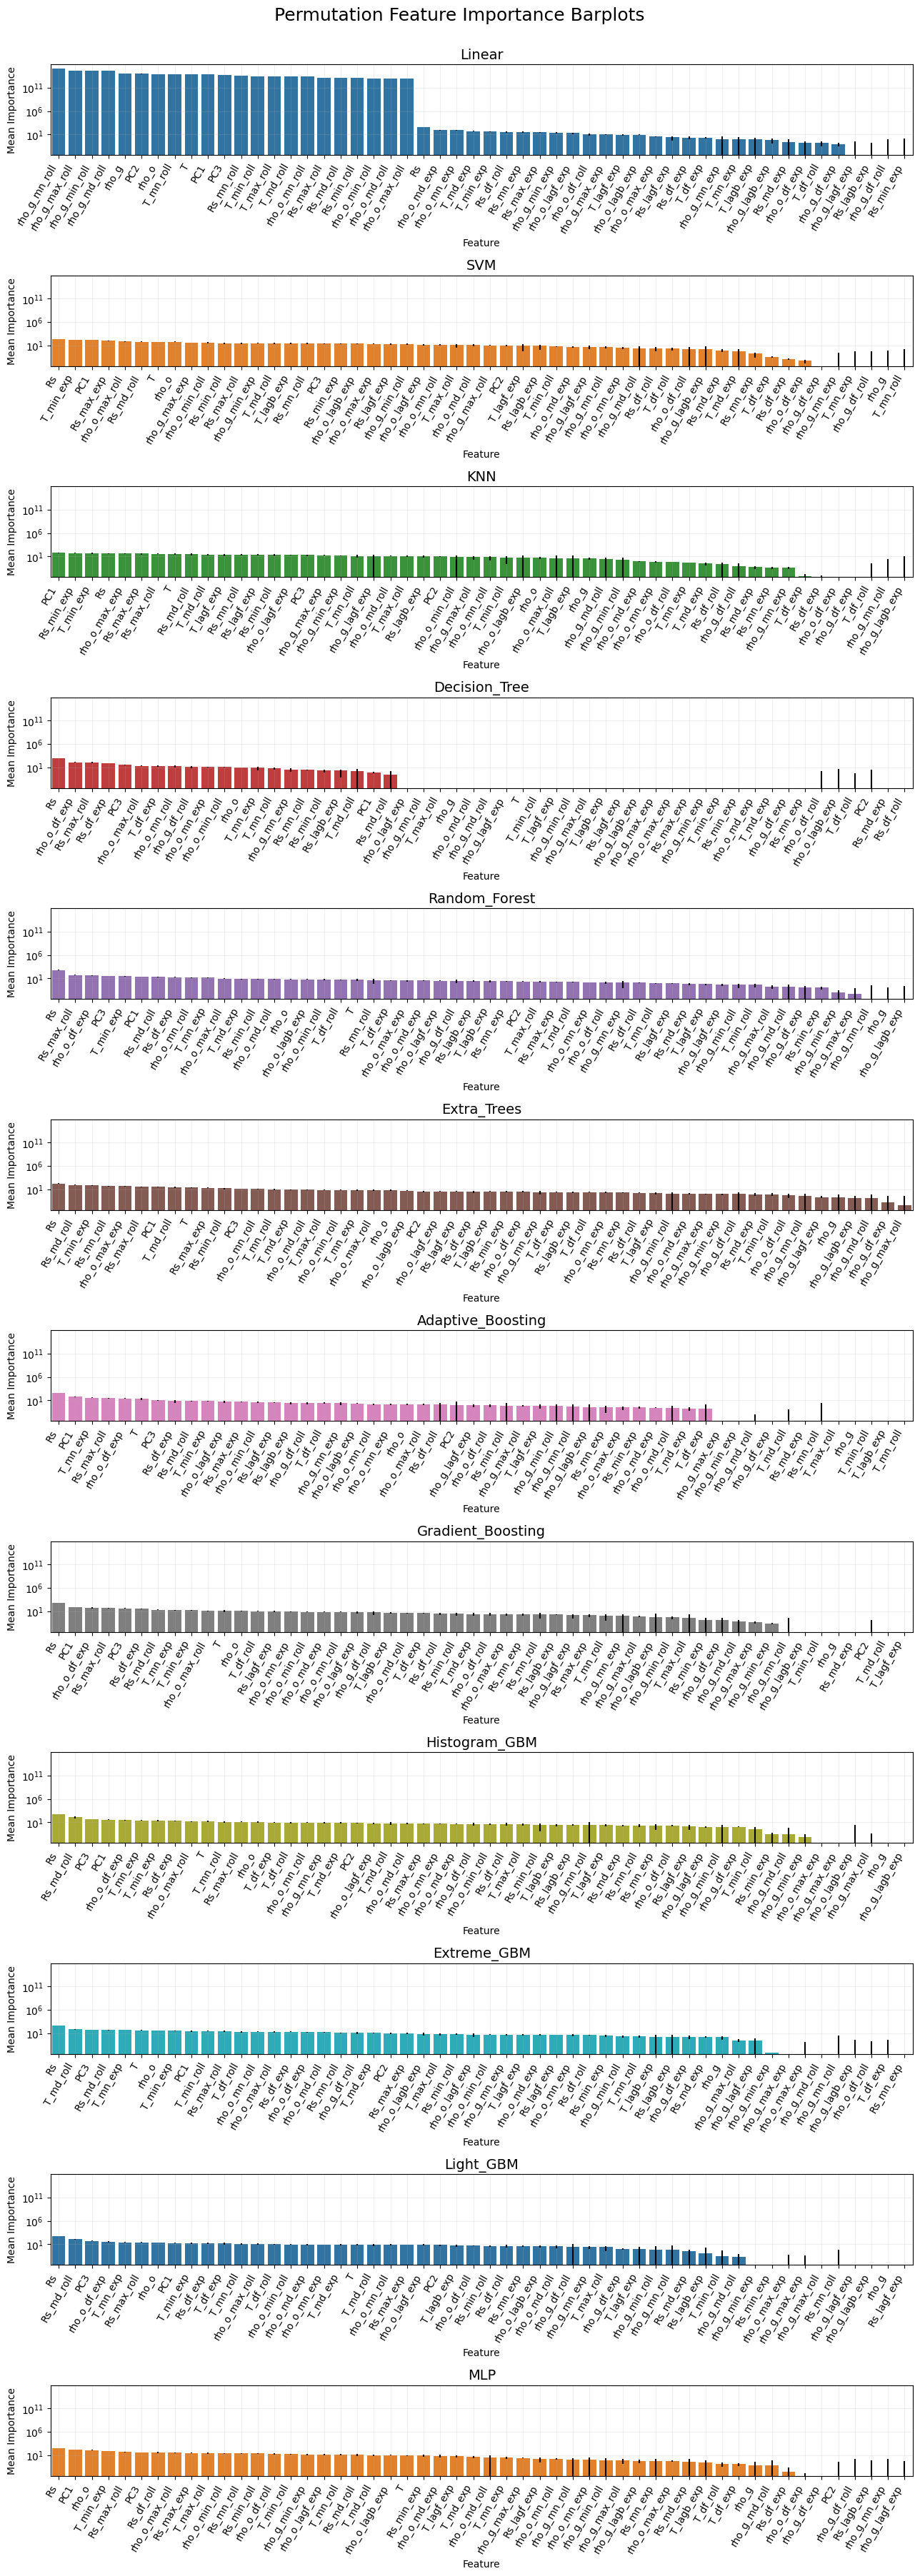

In [126]:
# pfi barplots
pfi_barplot(pfi_scr_mean_df_lst=pfi_scr_mean_df_lst, pfi_scr_std=pfi_scr_std)

In [127]:
# create a function for plotting the boxplots of the permutaion feature importance scores for each method
def pfi_boxplot(pfi_scr_df_lst):
    # pfi_scr_df_lst: all scores

    # plot the boxplot to compare the spread and centers of the importance of the features
    fig, axs = plt.subplots(figsize=(13, 3*len(pfi_scr_df_lst)), nrows=len(pfi_scr_df_lst), sharey=True)
    
    #colors = [cm.get_cmap('gist_ncar_r', len(estimator_names)+1)(n) for n in np.linspace(0,1,len(estimator_names)+1)][1:]
    colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
    
    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):
        sns.boxplot(data=pfi_scr_df_lst[i], orient='v', color=colors[i], ax=ax)

        ax.set(xlabel='Feature')
        ax.set(ylabel='Importance')
        ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation='60')
        ax.set_yscale('log')
        ax.set_title(est, size=14)
        ax.grid(which='major', alpha=0.2)

    plt.suptitle(y=1.001,  t='Permutation Feature Importance Boxplots', size=18)
    plt.tight_layout()

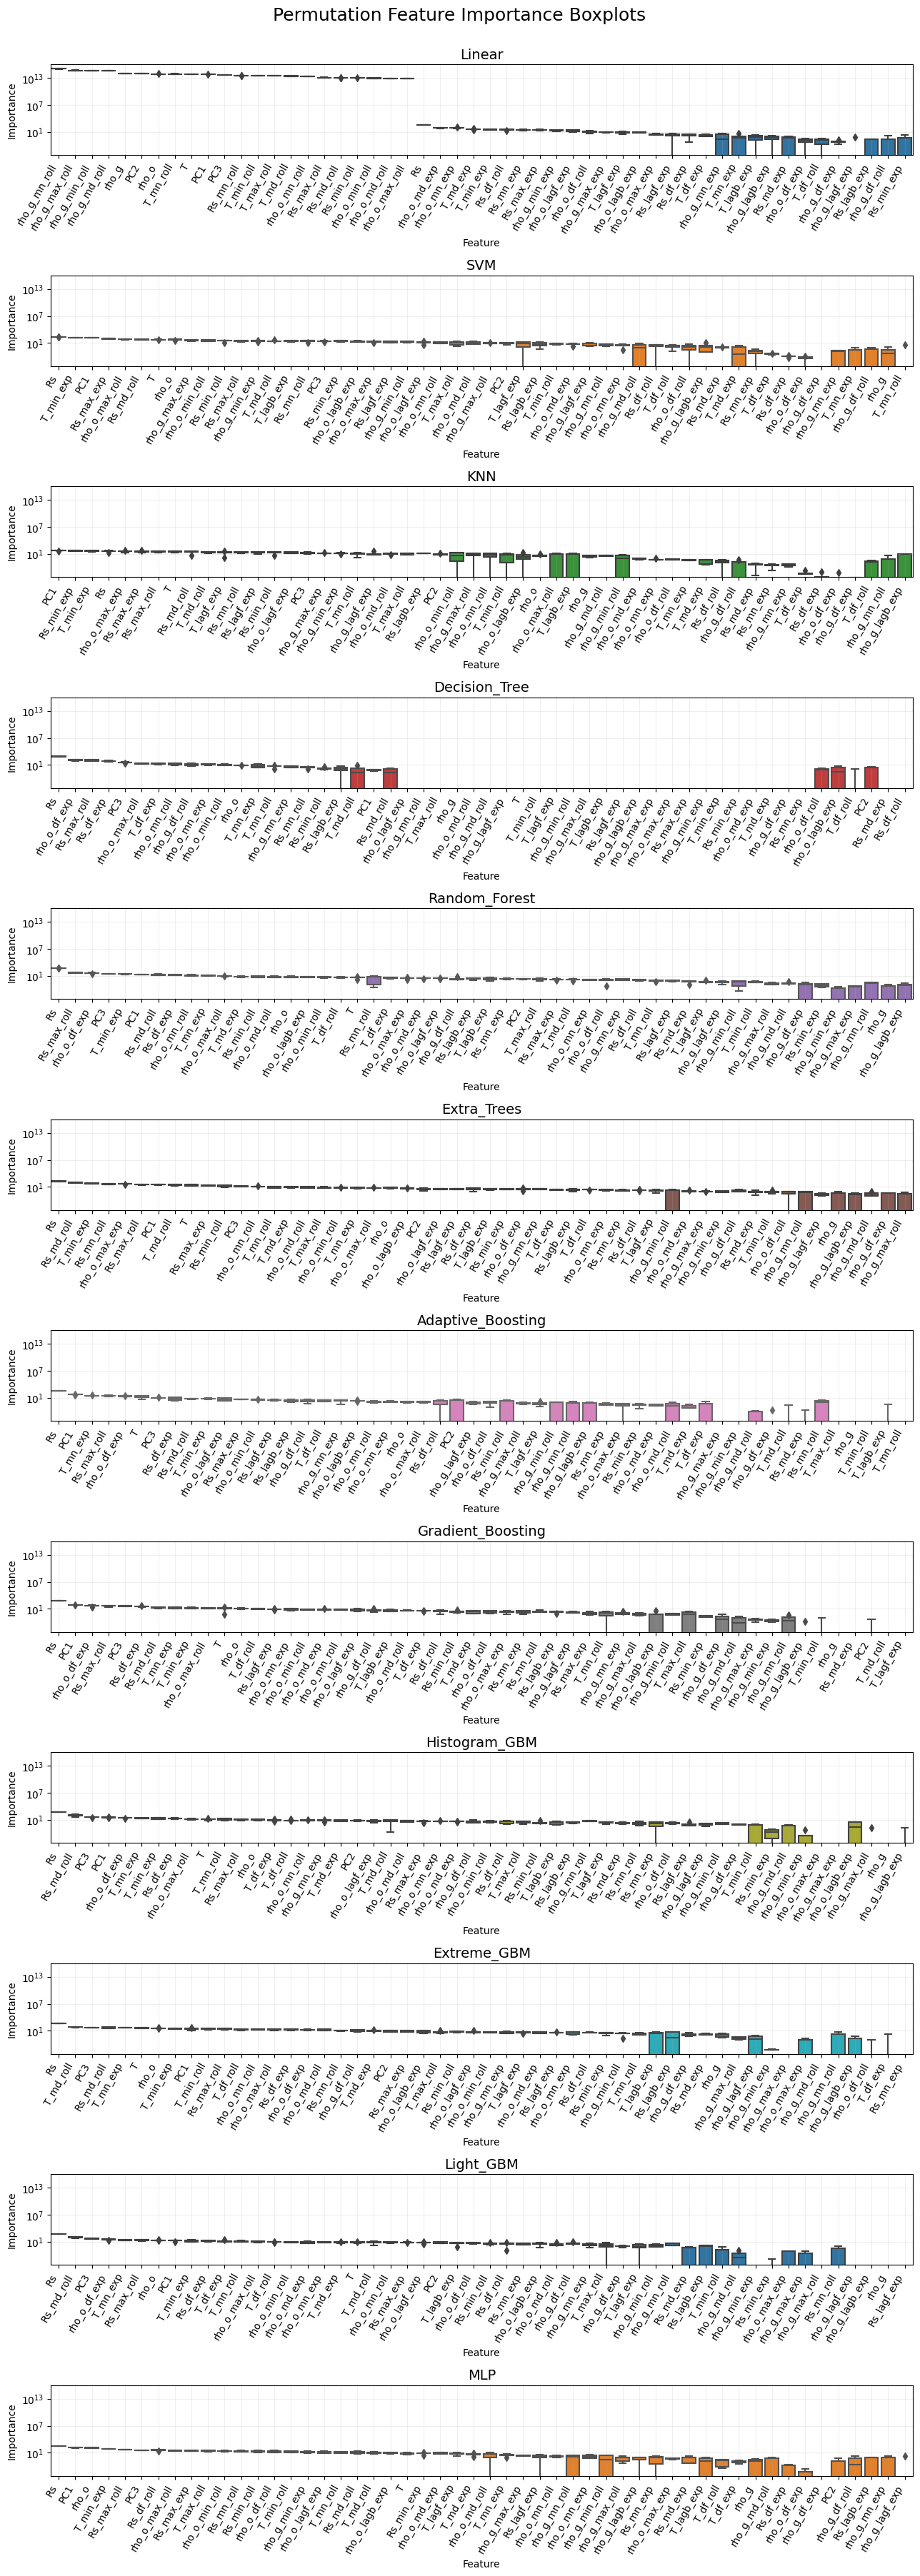

In [128]:
# pfi boxplots
pfi_boxplot(pfi_scr_df_lst=pfi_scr_df_lst)